## FLIP ROBO TECHNOLOGIES, BENGALURU
### <b> Evaluation Project 5 - Census Income</b>
<b><em> By: Satya Jyothi </em></b>

<b><em> Batch: Internship 34 </em></b>

## <b>Problem Statement:</b>

<b><em>This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year</em></b>

#### <b>Description of fnlwgt (final weight)</b>
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

- 1.	A single cell estimate of the population 16+ for each state.
- 2.	Controls for Hispanic Origin by age and sex.
- 3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

### Dataset Link-</b>

- https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [1]:
# importing required initial libraries
import numpy as np   # Basic computation library
import pandas as pd  # for data wrangling purpose
import seaborn as sns  # For Visualization 
import matplotlib.pyplot as plt  # For ploting 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")  # Filtering warnings

In [2]:
# Reading csv file
df=pd.read_csv("census_income.csv")
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [3]:
# Checking the dimensions of the dataset
print('No. of Rows :',df.shape[0])
print('No. of Columns :', df.shape[1])
pd.set_option('display.max_columns',None) # This will enable us to see truncated columns

No. of Rows : 32560
No. of Columns : 15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Getting count of different datatypes of the dataframe
df.dtypes.value_counts()

object    9
int64     6
dtype: int64

#### Observations: ####
- **There are int and object data types available in the dataset**

<b><em>Below are some features of the census income dataset</em><b>

- Fnlwgt:Weights in the CPS are used to adjust the data collected from the sample to represent the entire U.S. population.
    
- Capital_gain:refers to the amount of money an individual received during the previous year from 
the sale of a capital asset, such as stocks, bonds, or real estate, that resulted in a gain or profit.
  
- Capital_loss:refers to the amount of money an individual lost during the previous year from 
the sale of a capital asset, such as stocks, bonds, or real estate, that resulted in a loss.

- Hours_per_week:refers to the number of hours an individual worked per week during the previous year. 
This variable is used to measure an individual's or household's income and employment status.

In [6]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week'], object: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']}

#### Observations :
- **There are 32560 rows and 15 columns in the dataset.**
- **Out of 15 columns, there are 9 features with Object datatypes and rest are int64 datatypes**
- **There are some ordinal categorical variables with int datatype and will check in sub-sequent steps to identify them** 
- **Target Variable is 'Income' and it is classificaiton problem**

# Data Integrity Check

## Duplicate Values Check

In [7]:
df.duplicated().sum()

24

In [8]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


Age          Workclass  Fnlwgt      Education  Education_num  \
4880    25            Private  308144      Bachelors             13   
5103    90            Private   52386   Some-college             10   
9170    21            Private  250051   Some-college             10   
11630   20            Private  107658   Some-college             10   
13083   25            Private  195994        1st-4th              2   
15058   21            Private  243368      Preschool              1   
17039   46            Private  173243        HS-grad              9   
18554   30            Private  144593        HS-grad              9   
18697   19            Private   97261        HS-grad              9   
21317   19            Private  138153   Some-college             10   
21489   19            Private  146679   Some-college             10   
21874   49            Private   31267        7th-8th              4   
22299   25            Private  195994        1st-4th              2   
22366   44            Private  367749      Bachelors             13   
22493   49   Self-emp-not-inc   43479   Some-college             10   
25871   23            Private  240137        5th-6th              3   
26312   28            Private  274679        Masters             14   
28229   27            Private  255582        HS-grad              9   
28521   42            Private  204235   Some-college             10   
28845   39            Private   30916        HS-grad              9   
29156   38            Private  207202        HS-grad              9   
30844   46            Private  133616   Some-college             10   
31992   19            Private  251579   Some-college             10   
32403   35            Private  379959        HS-grad              9   

            Marital_status          Occupation    Relationship  \
4880         Never-married        Craft-repair   Not-in-family   
5103         Never-married       Other-service   Not-in-family   
9170         Never-married      Prof-specialty       Own-child   
11630        Never-married        Tech-support   Not-in-family   
13083        Never-married     Priv-house-serv   Not-in-family   
15058        Never-married     Farming-fishing   Not-in-family   
17039   Married-civ-spouse        Craft-repair         Husband   
18554        Never-married       Other-service   Not-in-family   
18697        Never-married     Farming-fishing   Not-in-family   
21317        Never-married        Adm-clerical       Own-child   
21489        Never-married     Exec-managerial       Own-child   
21874   Married-civ-spouse        Craft-repair         Husband   
22299        Never-married     Priv-house-serv   Not-in-family   
22366        Never-married      Prof-specialty   Not-in-family   
22493   Married-civ-spouse        Craft-repair         Husband   
25871        Never-married   Handlers-cleaners   Not-in-family   
26312        Never-married      Prof-specialty   Not-in-family   
28229        Never-married   Machine-op-inspct   Not-in-family   
28521   Married-civ-spouse      Prof-specialty         Husband   
28845   Married-civ-spouse        Craft-repair         Husband   
29156   Married-civ-spouse   Machine-op-inspct         Husband   
30844             Divorced        Adm-clerical       Unmarried   
31992        Never-married       Other-service       Own-child   
32403             Divorced       Other-service   Not-in-family   

                      Race      Sex  Capital_gain  Capital_loss  \
4880                 White     Male             0             0   
5103    Asian-Pac-Islander     Male             0             0   
9170                 White   Female             0             0   
11630                White   Female             0             0   
13083                White   Female             0             0   
15058                White     Male             0             0   
17039                White     Male             0             0   
18554                Black     Male         

- **I will drop duplicated entry from dataset before further processing**

In [9]:
#Rechecking the existence of duplicate values
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(32536, 15)

#### Observations: 
- **No duplicate values present in the dataframe**

## Checking for the presense of any non-interpretable values 
- **I am checking all unique values in the dataset for each column and trying to identify any non-interpretable values, so that I can impute them with appropriate technique or I will take a decision to impute or not**
- **This also helps me to identify the empty columns**

In [12]:
# List of columns to compute value counts for

# Initialize an empty DataFrame for the value counts
vc = pd.DataFrame()

# Loop over the columns and compute value counts
for col in df.columns:
    # I am excluding float and int data types because if any non-interpretable value is exists in any column, its datatype will be changed to "object"
    if df[col].dtype in ['float64', 'int64']: 
        continue
    vc_col = df[col].value_counts().to_frame().reset_index().rename(columns={'index': col, col: 'count'})
    # # Considering the values only if the count is > 2 as less than that probably indicates non-categorical feature but it is good to check once all the data by putting threshold of 0
    vc_col = vc_col[vc_col['count'] >= 2] 
    vc = pd.concat([vc, vc_col], axis=1).fillna('')

# Drop the 'count' column from the concatenated DataFrame
vc = vc.drop('count', axis=1)

# Store the final output in a DataFrame
vc_df = pd.DataFrame(vc)

# Display the value counts of the columns side by side
# pd.set_option('display.max_rows', None)
display(vc_df)

Workclass      Education          Marital_status  \
0             Private        HS-grad      Married-civ-spouse   
1    Self-emp-not-inc   Some-college           Never-married   
2           Local-gov      Bachelors                Divorced   
3                   ?        Masters               Separated   
4           State-gov      Assoc-voc                 Widowed   
5        Self-emp-inc           11th   Married-spouse-absent   
6         Federal-gov     Assoc-acdm       Married-AF-spouse   
7         Without-pay           10th                           
8        Never-worked        7th-8th                           
9                        Prof-school                           
10                               9th                           
11                              12th                           
12                         Doctorate                           
13                           5th-6th                           
14                           1st-4th                           
15                         Preschool                           
16                                                             
17                                                             
18                                                             
19                                                             
20                                                             
21                                                             
22                                                             
23                                                             
24                                                             
25                                                             
26                                                             
27                                                             
28                                                             
29                                                             
30                                                             
31                                                             
32                                                             
33                                                             
34                                                             
35                                                             
36                                                             
37                                                             
38                                                             
39                                                             
40                                                             

            Occupation     Relationship                 Race      Sex  \
0       Prof-specialty          Husband                White     Male   
1         Craft-repair    Not-in-family                Black   Female   
2      Exec-managerial        Own-child   Asian-Pac-Islander            
3         Adm-clerical        Unmarried   Amer-Indian-Eskimo            
4                Sales             Wife                Other            
5        Other-service   Other-relative                                 
6    Machine-op-inspct                                                  
7                    ?                                                  
8     Transport-moving                                                  
9    Handlers-cleaners                                                  
10     Farming-fishing                                                  
11        Tech-support                                                  
12     Protective-serv                                                  
13     Priv-house-serv                                                  
14        Armed-Forces                                                  
15                                                                      
16                                                                      
17       

### Observations:
- **Non-interpretable value "?" is noticed in the dataset**
- **I will address this in next steps**

In [13]:
li=['NA','N/A','-',' ','?',' ?']
for i in df:
    for j in li:
        if df[i].isin([j]).any():
            print(f"Invalid value '{j}' found in column '{i}'")

Invalid value ' ?' found in column 'Workclass'
Invalid value ' ?' found in column 'Occupation'
Invalid value ' ?' found in column 'Native_country'


#### Observations :
- **'?' present in three columns 'Workclass','Occupation','Native_country'.**
- **I will replace '?' with NaN value**

In [14]:
df.isin([' ?']).sum() # checking the count of "?" in the dataset columns

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [15]:
df=df.replace(' ?',np.NaN)#replacing '?' with NaN value

In [16]:
df.isin([' ?']).sum().any()

False

#### Observations:
- **I replaced '?',with NaN value**

## Check Columns with Null Values, Empty Columns, Columns with One Unique Value and No. of Unique Value in each Column

In [17]:
# create an empty dataframe to store the number of unique values for each column
unique_values_df = pd.DataFrame(columns=['Column', 'Data_Type', 'Num_Unique_Values'])

for col in df.columns:
    # count the number of unique values for the current column
    if df[col].notna().any():
        num_unique_values = df[col].nunique()
        data_type = df[col].dtype
    else:
        num_unique_values = 0
        data_type = df[col].dtype
    
    # add the column name, data type and number of unique values to the unique_values_df dataframe
    unique_values_df = unique_values_df.append({'Column': col, 'Data_Type': data_type, 'Num_Unique_Values': num_unique_values}, ignore_index=True)

# print the dataframe showing the number of unique values for each column in the dataset
print("\033[1mNumber of unique values for each column in the dataset:\033[0m")
pd.set_option('display.max_rows', None)
display(unique_values_df)
# ------------------------------------------------------------------------------------------------------------------
# check for columns with only one unique value
unique_vals = df.nunique()
single_val_cols = unique_vals[unique_vals == 1].index
if len(single_val_cols) > 0:
    print("="*125)
    print("The columns with only one unique value: \033[1m'" + "', '".join(single_val_cols) + "'\033[0m")
    print("="*125)
# ------------------------------------------------------------------------------------------------------------------
# check for empty columns
empty_cols = df.columns[df.isnull().all()]
if len(empty_cols) > 0:
    print("The empty columns are: \033[1m'" + "', '".join(empty_cols) + "'\033[0m")
    print("="*125)
# ------------------------------------------------------------------------------------------------------------------
# check for NaN values in columns and print in order of data types
nan_cols = df.columns[df.isna().any()]
# separate columns based on their data type
int_cols = [col for col in nan_cols if df[col].dtype == 'int64']
float_cols = [col for col in nan_cols if df[col].dtype == 'float64']
object_cols = [col for col in nan_cols if df[col].dtype == 'object']
other_cols = [col for col in nan_cols if col not in int_cols + float_cols + object_cols]
# ------------------------------------------------------------------------------------------------------------------
# print the columns with NaN values in the order of their data type
if len(nan_cols) > 0:
    print("="*125)
    if len(int_cols) > 0:
        print("\033[1mInt data type columns with NaN values: \033[0m'" + "', '".join(int_cols) + "'")
    if len(float_cols) > 0:
        print("\033[1mFloat data type columns with NaN values: \033[0m'" + "', '".join(float_cols) + "'")
    if len(object_cols) > 0:
        print("\033[1mObject data type columns with NaN values: \033[0m'" + "', '".join(object_cols) + "'")
    if len(other_cols) > 0:
        print("\033[1mOther data type columns with NaN values: \033[0m'" + "', '".join(other_cols) + "'")
    print("="*125)

Number of unique values for each column in the dataset:


Column Data_Type Num_Unique_Values
0              Age     int64                73
1        Workclass    object                 8
2           Fnlwgt     int64             21647
3        Education    object                16
4    Education_num     int64                16
5   Marital_status    object                 7
6       Occupation    object                14
7     Relationship    object                 6
8             Race    object                 5
9              Sex    object                 2
10    Capital_gain     int64               119
11    Capital_loss     int64                92
12  Hours_per_week     int64                94
13  Native_country    object                41
14          Income    object                 2

Object data type columns with NaN values: 'Workclass', 'Occupation', 'Native_country'


### Observations:
- **There are no empty columns and there are no columns with only one unique value in the dataset**
- **There are 3 columns with null values 'Workclass', 'Occupation', 'Native_country' which I will perform imputation in the next steps**

## Enlisting Value Counts - Object Datatype

- **From the below step, I can understand different categories available in categorical data or object data and corresponding %of data in the column. This helps me to understand if any unknown category presents in a particular column. This also helps me to understand whether we have right balanced data in case of categorical features or more data is there only for few classes. Finally, this helps me to take right steps for EDA**

In [18]:
for col in df.columns:
    # get the data type of the column
    col_type = df[col].dtype
    
    # get the value counts for each value in the column
    value_counts = df[col].value_counts(dropna=False)
    
    # calculate the percentage of each value in the column with respect to the value_counts().sum()
    value_counts_pct = value_counts / value_counts.sum() * 100
    
    # exclude values with count less than 10 
    value_counts_filtered = value_counts[value_counts >= 0]
    
    # exclude float and int datatype columns
    if df[col].dtype in ['float64', 'int64']: 
        continue
    
    # combine the value counts and percentages into a new dataframe
    value_counts_df = pd.concat([value_counts_filtered, value_counts_filtered / value_counts.sum() * 100], axis=1, keys=['count', '%count'])
    
    # reset the index and add it as a new column
    value_counts_df = value_counts_df.reset_index().rename(columns={'index': col})
    
    # print the dataframe for the current column
    print(f"\033[1m\"{col}\" unique values with data type \"{col_type}\":\033[0m")
    display(value_counts_df)
    print("="*100)

"Workclass" unique values with data type "object":


Workclass  count     %count
0            Private  22673  69.685886
1   Self-emp-not-inc   2540   7.806737
2          Local-gov   2093   6.432874
3                NaN   1836   5.642980
4          State-gov   1297   3.986354
5       Self-emp-inc   1116   3.430047
6        Federal-gov    960   2.950578
7        Without-pay     14   0.043029
8       Never-worked      7   0.021515

"Education" unique values with data type "object":


Education  count     %count
0         HS-grad  10494  32.253504
1    Some-college   7282  22.381362
2       Bachelors   5352  16.449471
3         Masters   1722   5.292599
4       Assoc-voc   1382   4.247603
5            11th   1175   3.611384
6      Assoc-acdm   1067   3.279444
7            10th    933   2.867593
8         7th-8th    645   1.982419
9     Prof-school    576   1.770347
10            9th    514   1.579789
11           12th    433   1.330834
12      Doctorate    413   1.269363
13        5th-6th    332   1.020408
14        1st-4th    166   0.510204
15      Preschool     50   0.153676

"Marital_status" unique values with data type "object":


Marital_status  count     %count
0      Married-civ-spouse  14970  46.010573
1           Never-married  10666  32.782149
2                Divorced   4441  13.649496
3               Separated   1025   3.150357
4                 Widowed    993   3.052004
5   Married-spouse-absent    418   1.284731
6       Married-AF-spouse     23   0.070691

"Occupation" unique values with data type "object":


Occupation  count     %count
0       Prof-specialty   4136  12.712073
1         Craft-repair   4094  12.582985
2      Exec-managerial   4065  12.493853
3         Adm-clerical   3767  11.577944
4                Sales   3650  11.218343
5        Other-service   3291  10.114950
6    Machine-op-inspct   2000   6.147037
7                  NaN   1843   5.664495
8     Transport-moving   1597   4.908409
9    Handlers-cleaners   1369   4.207647
10     Farming-fishing    992   3.048930
11        Tech-support    927   2.849152
12     Protective-serv    649   1.994714
13     Priv-house-serv    147   0.451807
14        Armed-Forces      9   0.027662

"Relationship" unique values with data type "object":


Relationship  count     %count
0          Husband  13187  40.530489
1    Not-in-family   8291  25.482542
2        Own-child   5064  15.564298
3        Unmarried   3445  10.588271
4             Wife   1568   4.819277
5   Other-relative    981   3.015122

"Race" unique values with data type "object":


Race  count     %count
0                White  27794  85.425375
1                Black   3122   9.595525
2   Asian-Pac-Islander   1038   3.190312
3   Amer-Indian-Eskimo    311   0.955864
4                Other    271   0.832924

"Sex" unique values with data type "object":


Sex  count     %count
0     Male  21774  66.922793
1   Female  10762  33.077207

"Native_country" unique values with data type "object":


Native_country  count     %count
0                 United-States  29152  89.599213
1                        Mexico    639   1.963978
2                           NaN    582   1.788788
3                   Philippines    198   0.608557
4                       Germany    137   0.421072
5                        Canada    121   0.371896
6                   Puerto-Rico    114   0.350381
7                   El-Salvador    106   0.325793
8                         India    100   0.307352
9                          Cuba     95   0.291984
10                      England     90   0.276617
11                      Jamaica     81   0.248955
12                        South     80   0.245881
13                        China     75   0.230514
14                        Italy     73   0.224367
15           Dominican-Republic     70   0.215146
16                      Vietnam     67   0.205926
17                        Japan     62   0.190558
18                    Guatemala     62   0.190558
19                       Poland     60   0.184411
20                     Columbia     59   0.181338
21                       Taiwan     51   0.156749
22                        Haiti     44   0.135235
23                         Iran     43   0.132161
24                     Portugal     37   0.113720
25                    Nicaragua     34   0.104500
26                         Peru     31   0.095279
27                       France     29   0.089132
28                       Greece     29   0.089132
29                      Ecuador     28   0.086059
30                      Ireland     24   0.073764
31                         Hong     20   0.061470
32                     Cambodia     19   0.058397
33              Trinadad&Tobago     19   0.058397
34                         Laos     18   0.055323
35                     Thailand     18   0.055323
36                   Yugoslavia     16   0.049176
37   Outlying-US(Guam-USVI-etc)     14   0.043029
38                     Honduras     13   0.039956
39                      Hungary     13   0.039956
40                     Scotland     12   0.036882
41           Holand-Netherlands      1   0.003074

"Income" unique values with data type "object":


Income  count     %count
0   <=50K  24697  75.906688
1    >50K   7839  24.093312

### Observations:
- **Classificaiton target variable "Income" has 2 categories. Noticed imbalance in the dataset for this column**

## Enlisting Value Counts - Int Datatype

- **From the below step, I can take a closer look at "int" datatype and figure out if there are any catergorical features out of 'int' datatype. This is required for doing right EDA based on data type**

In [19]:
for col in df.columns:
    # get the data type of the column
    col_type = df[col].dtype
    
    # get the value counts for each value in the column
    value_counts = df[col].value_counts(dropna=False)
    
    # calculate the percentage of each value in the column with respect to the value_counts().sum()
    value_counts_pct = value_counts / value_counts.sum() * 100
    
    # exclude values with count less than 10 
    value_counts_filtered = value_counts[value_counts >= 10]
    
    # exclude float and int datatype columns
    if df[col].dtype in ['float64', 'object']: 
        continue
    
    # combine the value counts and percentages into a new dataframe
    value_counts_df = pd.concat([value_counts_filtered, value_counts_filtered / value_counts.sum() * 100], axis=1, keys=['count', '%count'])
    
    # reset the index and add it as a new column
    value_counts_df = value_counts_df.reset_index().rename(columns={'index': col})
    
    # print the dataframe for the current column
    print(f"\033[1m\"{col}\" unique values with data type \"{col_type}\":\033[0m")
    display(value_counts_df)
    print("="*100)

"Age" unique values with data type "int64":


Age  count    %count
0    36    898  2.760020
1    31    888  2.729284
2    34    886  2.723137
3    23    876  2.692402
4    33    875  2.689329
5    35    875  2.689329
6    28    866  2.661667
7    30    860  2.643226
8    37    858  2.637079
9    25    838  2.575609
10   27    834  2.563314
11   32    828  2.544873
12   38    826  2.538726
13   39    814  2.501844
14   29    813  2.498771
15   41    808  2.483403
16   24    798  2.452668
17   40    794  2.440374
18   26    785  2.412712
19   42    779  2.394271
20   43    770  2.366609
21   22    765  2.351242
22   20    752  2.311286
23   46    735  2.259036
24   45    734  2.255963
25   44    723  2.222154
26   21    718  2.206786
27   19    708  2.176051
28   47    708  2.176051
29   50    602  1.850258
30   51    595  1.828744
31   49    575  1.767273
32   18    550  1.690435
33   48    543  1.668921
34   52    478  1.469142
35   53    464  1.426113
36   55    419  1.287804
37   54    415  1.275510
38   17    395  1.214040
39   56    366  1.124908
40   58    366  1.124908
41   57    358  1.100320
42   59    355  1.091099
43   60    312  0.958938
44   61    300  0.922056
45   62    258  0.792968
46   63    230  0.706909
47   64    208  0.639292
48   65    178  0.547086
49   67    151  0.464101
50   66    150  0.461028
51   68    120  0.368822
52   69    108  0.331940
53   70     89  0.273543
54   71     72  0.221293
55   72     67  0.205926
56   73     64  0.196705
57   74     51  0.156749
58   76     46  0.141382
59   75     45  0.138308
60   90     42  0.129088
61   77     29  0.089132
62   78     23  0.070691
63   79     22  0.067617
64   80     22  0.067617
65   81     20  0.061470
66   82     12  0.036882
67   84     10  0.030735

"Fnlwgt" unique values with data type "int64":


Fnlwgt  count    %count
0   123011     13  0.039956
1   164190     13  0.039956
2   203488     13  0.039956
3   121124     12  0.036882
4   126675     12  0.036882
5   113364     12  0.036882
6   148995     12  0.036882
7   188246     11  0.033809
8   123983     11  0.033809
9   126569     11  0.033809
10  190290     11  0.033809
11  111483     11  0.033809
12  102308     11  0.033809
13  241998     11  0.033809
14  155659     11  0.033809
15  120277     11  0.033809
16  120131     11  0.033809
17  125933     10  0.030735
18   99185     10  0.030735
19  177675     10  0.030735
20  125892     10  0.030735
21  216129     10  0.030735
22  186934     10  0.030735
23  194630     10  0.030735
24  125461     10  0.030735
25  155489     10  0.030735
26  193882     10  0.030735
27  112497     10  0.030735
28  174789     10  0.030735
29  117963     10  0.030735
30  119793     10  0.030735

"Education_num" unique values with data type "int64":


Education_num  count     %count
0               9  10494  32.253504
1              10   7282  22.381362
2              13   5352  16.449471
3              14   1722   5.292599
4              11   1382   4.247603
5               7   1175   3.611384
6              12   1067   3.279444
7               6    933   2.867593
8               4    645   1.982419
9              15    576   1.770347
10              5    514   1.579789
11              8    433   1.330834
12             16    413   1.269363
13              3    332   1.020408
14              2    166   0.510204
15              1     50   0.153676

"Capital_gain" unique values with data type "int64":


Capital_gain  count     %count
0              0  29825  91.667691
1          15024    347   1.066511
2           7688    284   0.872879
3           7298    246   0.756086
4          99999    159   0.488689
5           5178     97   0.298131
6           3103     97   0.298131
7           4386     70   0.215146
8           5013     69   0.212073
9           8614     55   0.169044
10          3325     53   0.162896
11          2174     47   0.144455
12         10520     43   0.132161
13          4064     42   0.129088
14         14084     41   0.126014
15          4650     41   0.126014
16          3137     37   0.113720
17         20051     37   0.113720
18         27828     34   0.104500
19           594     34   0.104500
20          3908     32   0.098353
21          2829     31   0.095279
22         13550     27   0.082985
23          6849     27   0.082985
24         14344     26   0.079911
25          1055     25   0.076838
26          2885     24   0.073764
27          3411     24   0.073764
28          2176     23   0.070691
29          4787     23   0.070691
30          3464     23   0.070691
31          9386     22   0.067617
32          2597     20   0.061470
33          4101     20   0.061470
34          2407     19   0.058397
35          4865     17   0.052250
36          2202     16   0.049176
37          1506     15   0.046103
38          3942     14   0.043029
39          3674     14   0.043029
40          4416     12   0.036882
41          2580     12   0.036882
42          4508     12   0.036882
43          3781     12   0.036882
44         10605     12   0.036882
45          2463     11   0.033809
46          2907     11   0.033809
47          5455     11   0.033809
48          2354     11   0.033809
49          2635     11   0.033809
50         25236     11   0.033809
51          6497     11   0.033809

"Capital_loss" unique values with data type "int64":


Capital_loss  count     %count
0              0  31017  95.331325
1           1902    202   0.620851
2           1977    168   0.516351
3           1887    159   0.488689
4           1848     51   0.156749
5           1485     51   0.156749
6           2415     49   0.150602
7           1602     47   0.144455
8           1740     42   0.129088
9           1590     40   0.122941
10          1876     39   0.119867
11          1672     34   0.104500
12          1564     25   0.076838
13          2258     25   0.076838
14          2001     24   0.073764
15          1669     24   0.073764
16          1741     24   0.073764
17          1980     23   0.070691
18          1719     22   0.067617
19          2051     21   0.064544
20          2002     21   0.064544
21          1408     21   0.064544
22          1579     20   0.061470
23          2377     20   0.061470
24          1504     18   0.055323
25          1721     18   0.055323
26          1974     18   0.055323
27          2339     17   0.052250
28          2179     15   0.046103
29          1628     15   0.046103
30          1762     14   0.043029
31          2559     12   0.036882
32           625     12   0.036882
33          2444     12   0.036882
34          2824     10   0.030735

"Hours_per_week" unique values with data type "int64":


Hours_per_week  count     %count
0               40  15203  46.726703
1               50   2817   8.658102
2               45   1823   5.603024
3               60   1475   4.533440
4               35   1296   3.983280
5               20   1224   3.761987
6               30   1148   3.528399
7               55    693   2.129948
8               25    674   2.071552
9               48    516   1.585936
10              38    476   1.462995
11              15    404   1.241701
12              70    291   0.894394
13              10    275   0.845218
14              32    266   0.817556
15              24    252   0.774527
16              65    244   0.749939
17              36    220   0.676174
18              42    219   0.673101
19              44    212   0.651586
20              16    205   0.630071
21              12    173   0.531719
22              43    151   0.464101
23              37    149   0.457954
24               8    145   0.445660
25              52    138   0.424146
26              80    133   0.408778
27              56     97   0.298131
28              28     86   0.264323
29              99     85   0.261249
30              46     82   0.252029
31              18     75   0.230514
32              72     71   0.218220
33              75     66   0.202852
34               6     64   0.196705
35               5     60   0.184411
36               4     54   0.165970
37              47     49   0.150602
38              84     45   0.138308
39              22     44   0.135235
40              54     41   0.126014
41               3     39   0.119867
42              33     39   0.119867
43              39     38   0.116794
44              41     36   0.110647
45              14     33   0.101426
46               2     32   0.098353
47              27     30   0.092206
48              26     30   0.092206
49              49     29   0.089132
50              17     29   0.089132
51              90     29   0.089132
52              34     28   0.086059
53              58     28   0.086059
54               7     26   0.079911
55              53     25   0.076838
56              21     24   0.073764
57              13     23   0.070691
58              23     21   0.064544
59               1     20   0.061470
60              62     18   0.055323
61               9     18   0.055323
62              57     17   0.052250
63              66     17   0.052250
64              19     14   0.043029
65              64     14   0.043029
66              85     13   0.039956
67              51     13   0.039956
68              68     12   0.036882
69              11     11   0.033809
70              98     11   0.033809
71              63     10   0.030735

### Observations:
- **Based on the above summary, there are no "int" columns with categorical data**

### Check for Null Values and Percentage

In [20]:
df.isnull().sum().sum() # Checking the sum of null values for all columns

4261

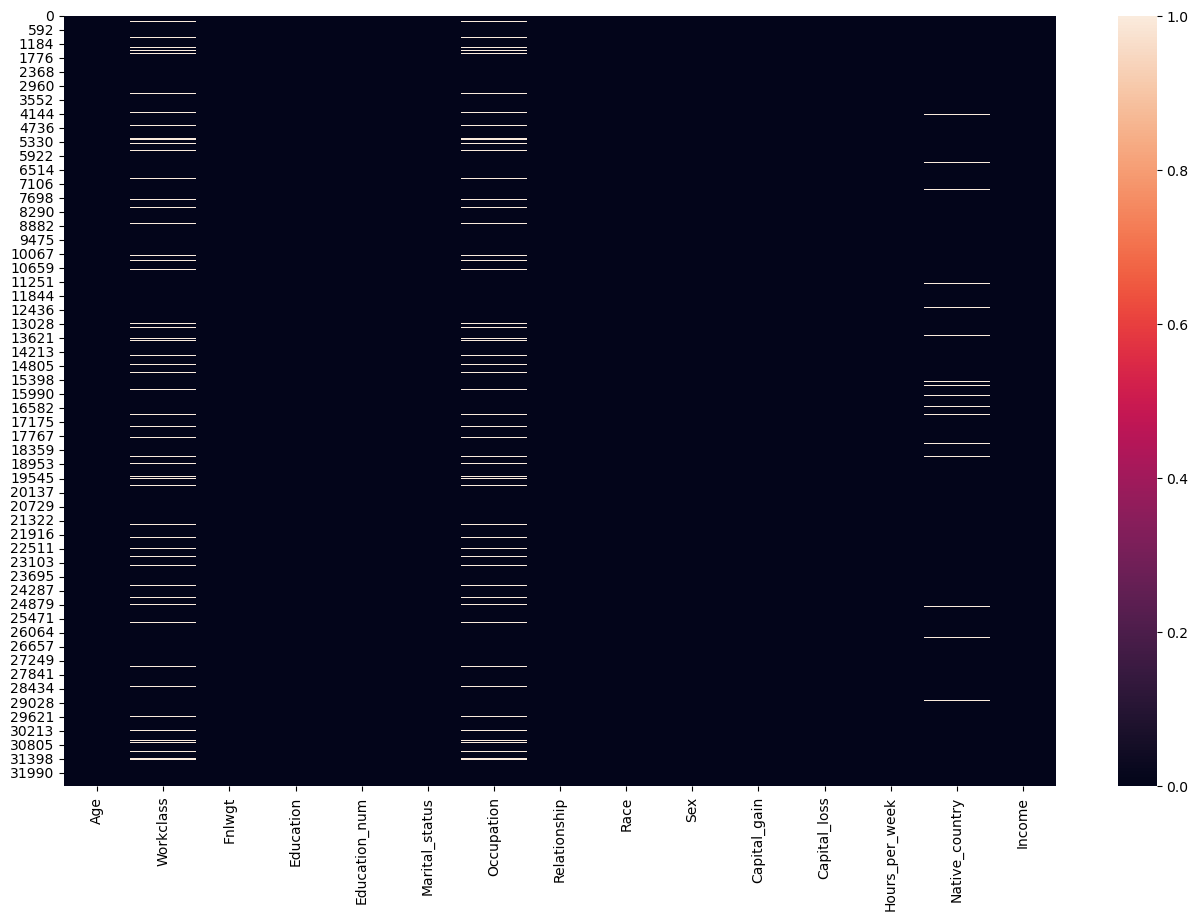

In [21]:
sns.set_palette('coolwarm_r')
plt.figure(figsize = (16,10))
sns.heatmap(df.isnull())
plt.show()

In [22]:
#Finding the percentage of data missing from the dataset
missing_values = df.isnull().sum()
percentage_missing_values =round((missing_values/len(df))*100,1)
dtyp=df.dtypes
df_null=pd.concat([dtyp,missing_values, percentage_missing_values], axis =1, keys =['Data Type','Missing Values', '% Missing data'])
print("Missing Values")
df_null.sort_values(by=["% Missing data"],ascending=False)

Missing Values


Data Type  Missing Values  % Missing data
Occupation        object            1843             5.7
Workclass         object            1836             5.6
Native_country    object             582             1.8
Age                int64               0             0.0
Fnlwgt             int64               0             0.0
Education         object               0             0.0
Education_num      int64               0             0.0
Marital_status    object               0             0.0
Relationship      object               0             0.0
Race              object               0             0.0
Sex               object               0             0.0
Capital_gain       int64               0             0.0
Capital_loss       int64               0             0.0
Hours_per_week     int64               0             0.0
Income            object               0             0.0

#### Observation:
- **Null values are present in "Occupation", "Workclass" and "Native_country" columns. As the data is categorical in nature, I will use 'mode' to replace null values.**

### Missing Values Imputation - Simple Imputer

In [23]:
# Filling null values of column with categorical data with first value of 'mode'
for i in df.columns:
    if (df[i].dtype=='O' and df[i].isnull().sum()!=0):
        df[i]=df[i].fillna(df[i].mode()[0])

print(df.isnull().sum().sum())

0


In [24]:
df.head(3)

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   

        Marital_status          Occupation    Relationship    Race    Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White   Male   
1             Divorced   Handlers-cleaners   Not-in-family   White   Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black   Male   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K

# Segregating columns based on data type for better EDA

In [25]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week'], object: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']}

In [26]:
df_numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
df_categorical=['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Income','Native_country']

In [27]:
df_numerical=df[df_numerical]
df_categorical=df[df_categorical]

In [28]:
y=df['Income']
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: Income, dtype: object

## Statistical Summary:

In [29]:
# Statistical summary for numerical data
df_numerical.describe().T

count           mean            std      min       25%  \
Age             32536.0      38.585536      13.638193     17.0      28.0   
Fnlwgt          32536.0  189784.298992  105556.258211  12285.0  117831.5   
Education_num   32536.0      10.081725       2.571622      1.0       9.0   
Capital_gain    32536.0    1078.410069    7388.068465      0.0       0.0   
Capital_loss    32536.0      87.370912     403.107737      0.0       0.0   
Hours_per_week  32536.0      40.440343      12.347079      1.0      40.0   

                     50%        75%        max  
Age                 37.0      48.00       90.0  
Fnlwgt          178356.0  236993.25  1484705.0  
Education_num       10.0      12.00       16.0  
Capital_gain         0.0       0.00    99999.0  
Capital_loss         0.0       0.00     4356.0  
Hours_per_week      40.0      45.00       99.0

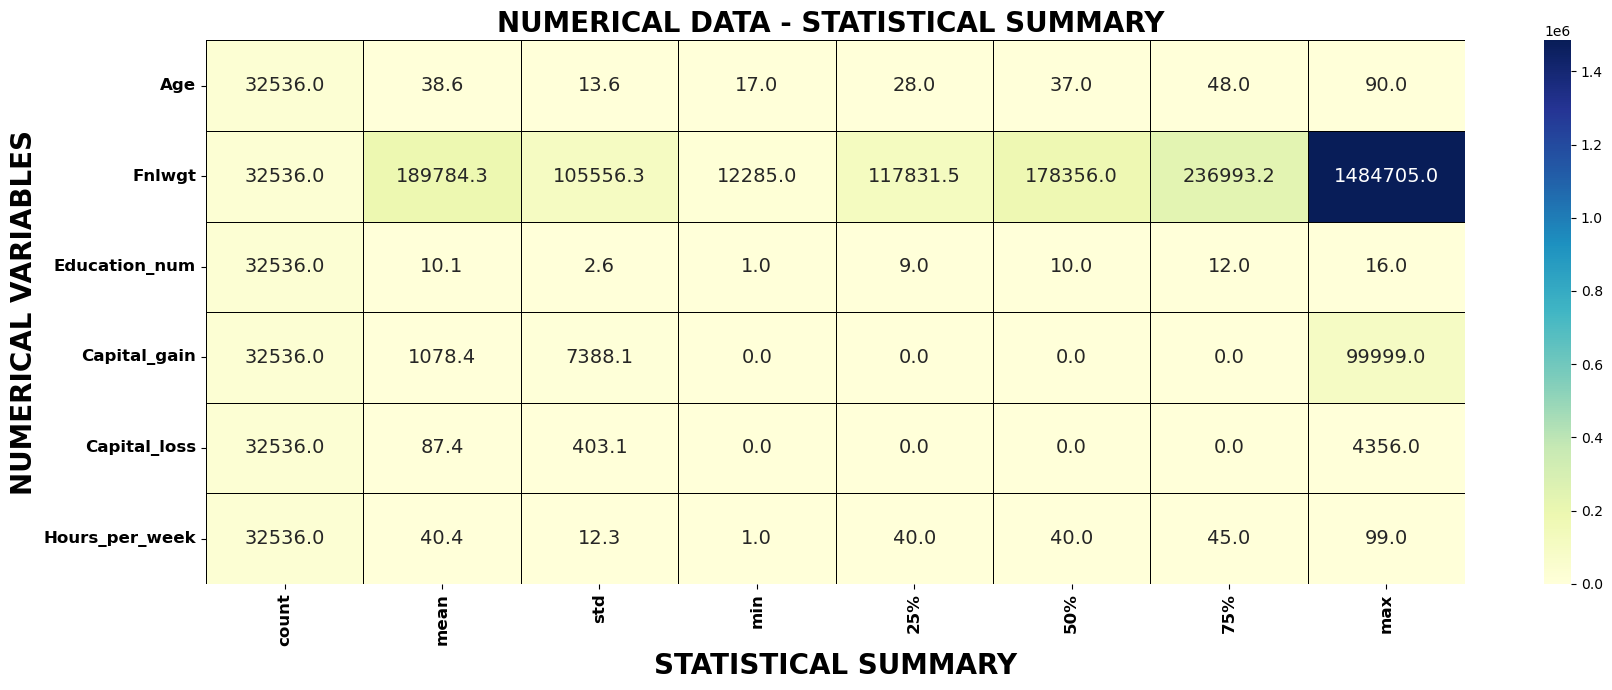

In [30]:
# Visualizing the Statistical summary for numerical data using heatmap.
plt.figure(figsize=(18,7))
sns.heatmap(df_numerical.describe().T,linewidths = 0.5,linecolor='black',fmt='0.1f',annot = True,cmap="YlGnBu",annot_kws={"size": 14})
plt.title("NUMERICAL DATA - STATISTICAL SUMMARY ",fontsize=20, fontweight='bold')
plt.xlabel("STATISTICAL SUMMARY", fontsize=20,fontweight='bold')
plt.ylabel("NUMERICAL VARIABLES", fontsize=20,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **count is same for all the features**
- **Minimum age is 17 and max age is 90**
- **The number of years of education an individual has completed is from 1 year to max 16 years**
- **The minimum and maximum capital_gain in the given data is 0 and 99999 respectively.very large difference between 75% and max shows presence of outliers**
- **The minimum and maximum capital_loss in the given data is 0 and 4356 respectively**
- **The max number of hours an individual worked per week is 99hours and min hours are 1**
- **Mean is greater than median shows the data is Right-skewed.**
- **std is very high for some of the features shows presence of outliers**

In [31]:
df_categorical.describe(include='O').T

count unique                  top   freq
Workclass       32536      8              Private  24509
Education       32536     16              HS-grad  10494
Marital_status  32536      7   Married-civ-spouse  14970
Occupation      32536     14       Prof-specialty   5979
Relationship    32536      6              Husband  13187
Race            32536      5                White  27794
Sex             32536      2                 Male  21774
Income          32536      2                <=50K  24697
Native_country  32536     41        United-States  29734

#### Observation:
- **count is same for all the features**
- **Most of the people workclass is private**
- **Education for most of the people is HS-grad**
- **Most of the people have income <=50k**

# Visualization of data:

### Univariate Graphical Analysis for Categorical data 

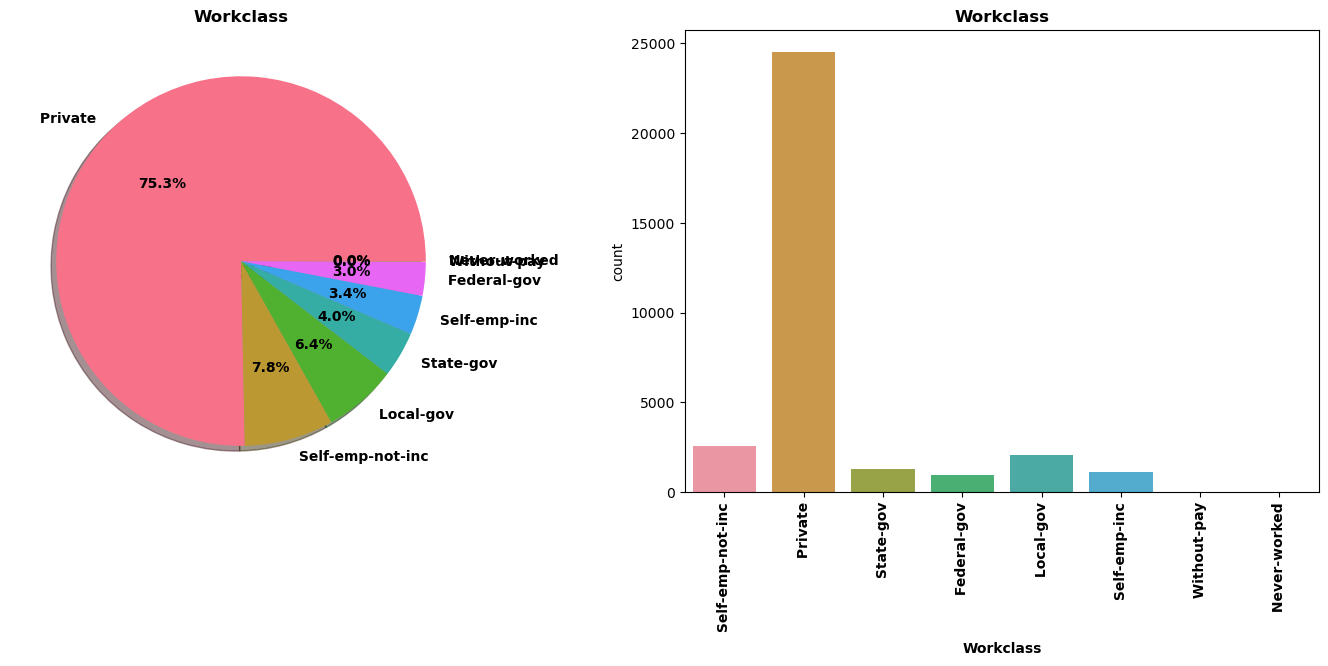

Observations for feature WORKCLASS:


Value  Count  % Count
0            Private  24509     75.3
1   Self-emp-not-inc   2540      7.8
2          Local-gov   2093      6.4
3          State-gov   1297      4.0
4       Self-emp-inc   1116      3.4
5        Federal-gov    960      3.0
6        Without-pay     14      0.0
7       Never-worked      7      0.0

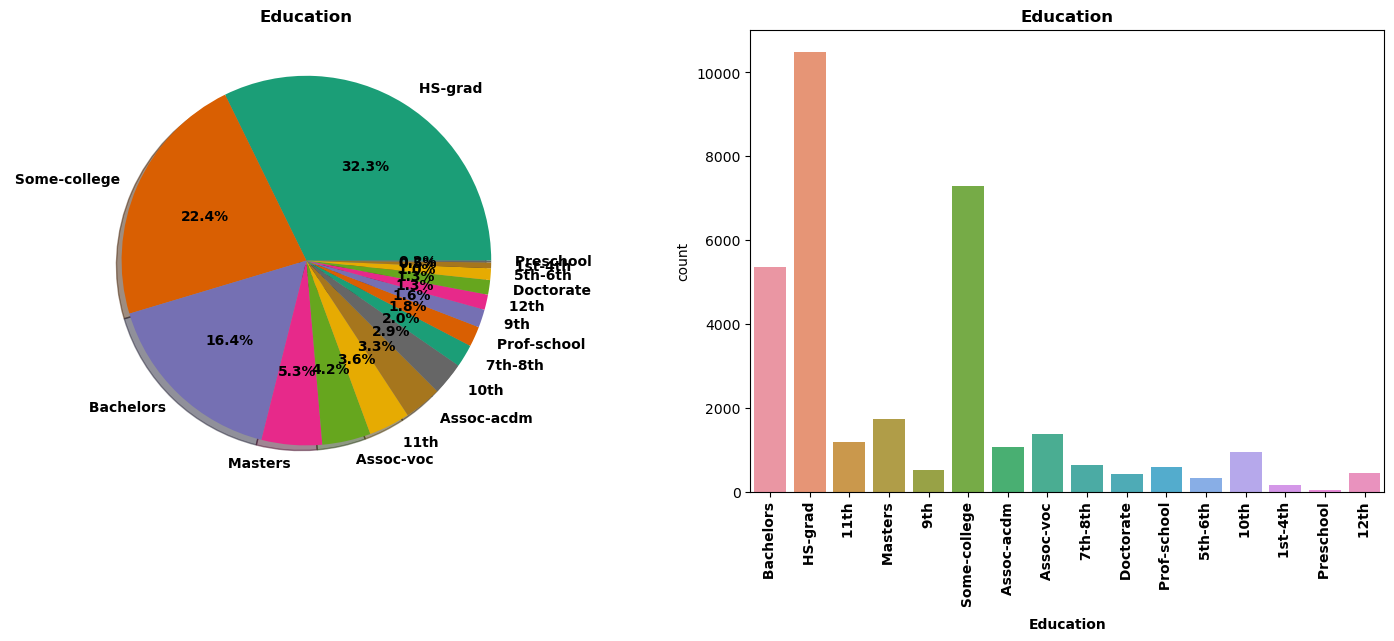

Observations for feature EDUCATION:


Value  Count  % Count
0         HS-grad  10494     32.3
1    Some-college   7282     22.4
2       Bachelors   5352     16.4
3         Masters   1722      5.3
4       Assoc-voc   1382      4.2
5            11th   1175      3.6
6      Assoc-acdm   1067      3.3
7            10th    933      2.9
8         7th-8th    645      2.0
9     Prof-school    576      1.8
10            9th    514      1.6
11           12th    433      1.3
12      Doctorate    413      1.3
13        5th-6th    332      1.0
14        1st-4th    166      0.5
15      Preschool     50      0.2

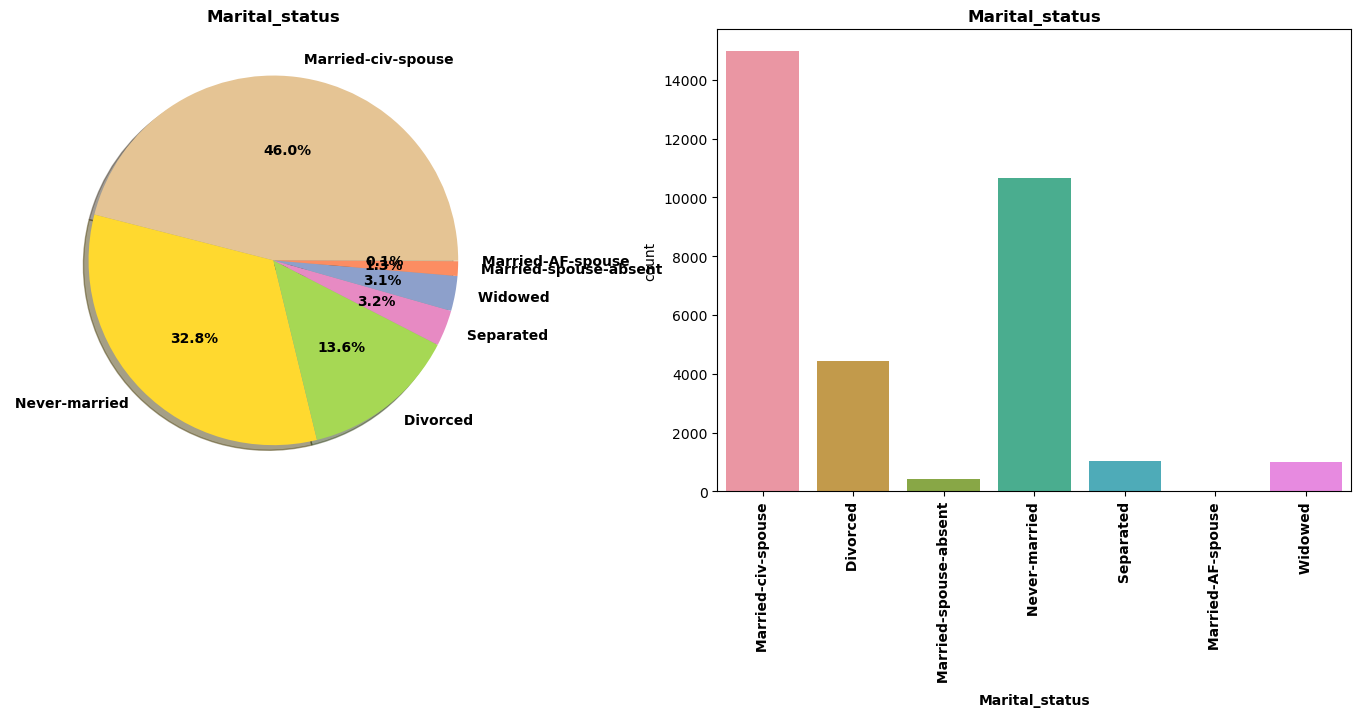

Observations for feature MARITAL_STATUS:


Value  Count  % Count
0      Married-civ-spouse  14970     46.0
1           Never-married  10666     32.8
2                Divorced   4441     13.6
3               Separated   1025      3.2
4                 Widowed    993      3.1
5   Married-spouse-absent    418      1.3
6       Married-AF-spouse     23      0.1

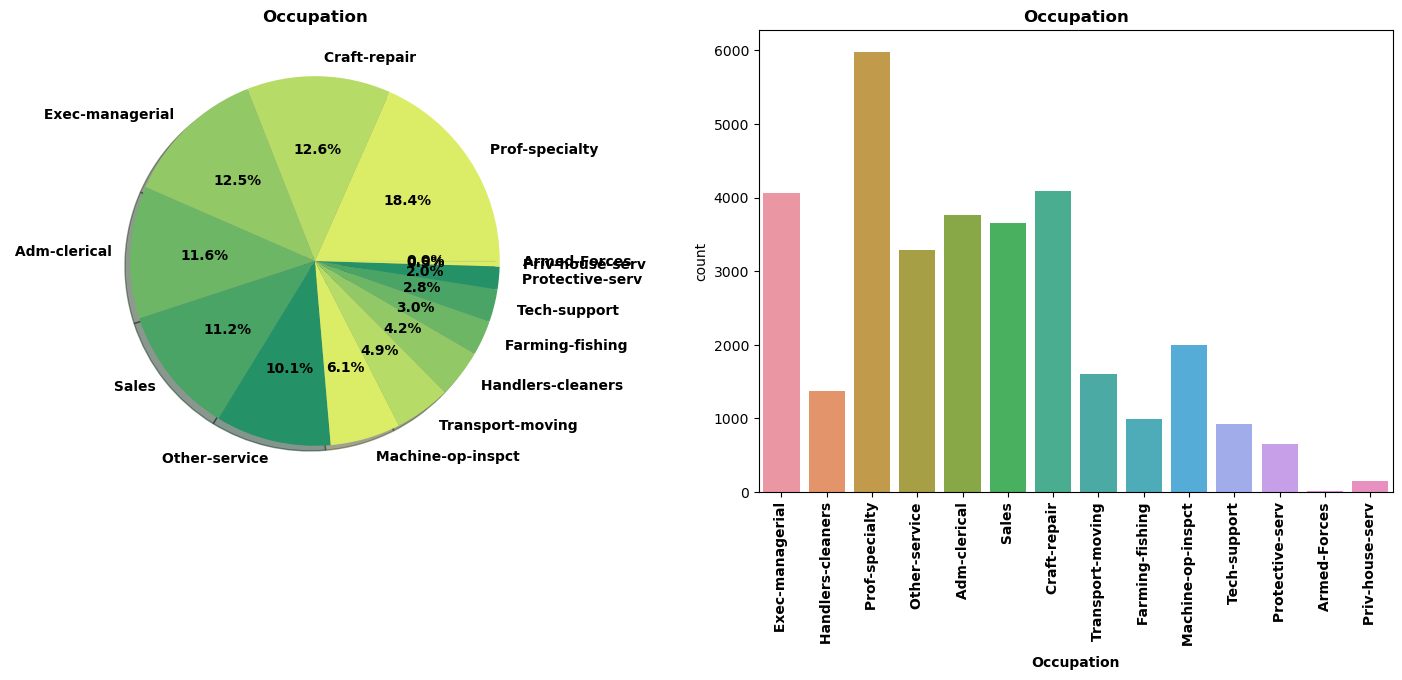

Observations for feature OCCUPATION:


Value  Count  % Count
0       Prof-specialty   5979     18.4
1         Craft-repair   4094     12.6
2      Exec-managerial   4065     12.5
3         Adm-clerical   3767     11.6
4                Sales   3650     11.2
5        Other-service   3291     10.1
6    Machine-op-inspct   2000      6.1
7     Transport-moving   1597      4.9
8    Handlers-cleaners   1369      4.2
9      Farming-fishing    992      3.0
10        Tech-support    927      2.8
11     Protective-serv    649      2.0
12     Priv-house-serv    147      0.5
13        Armed-Forces      9      0.0

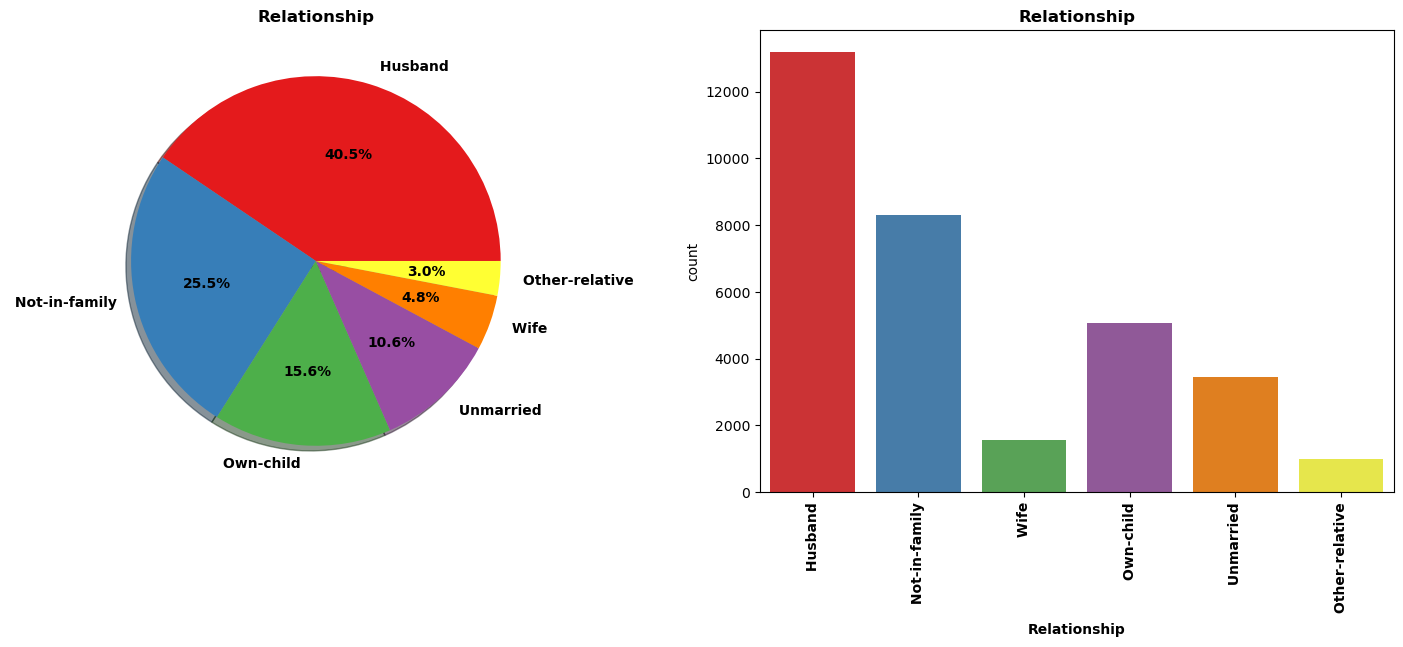

Observations for feature RELATIONSHIP:


Value  Count  % Count
0          Husband  13187     40.5
1    Not-in-family   8291     25.5
2        Own-child   5064     15.6
3        Unmarried   3445     10.6
4             Wife   1568      4.8
5   Other-relative    981      3.0

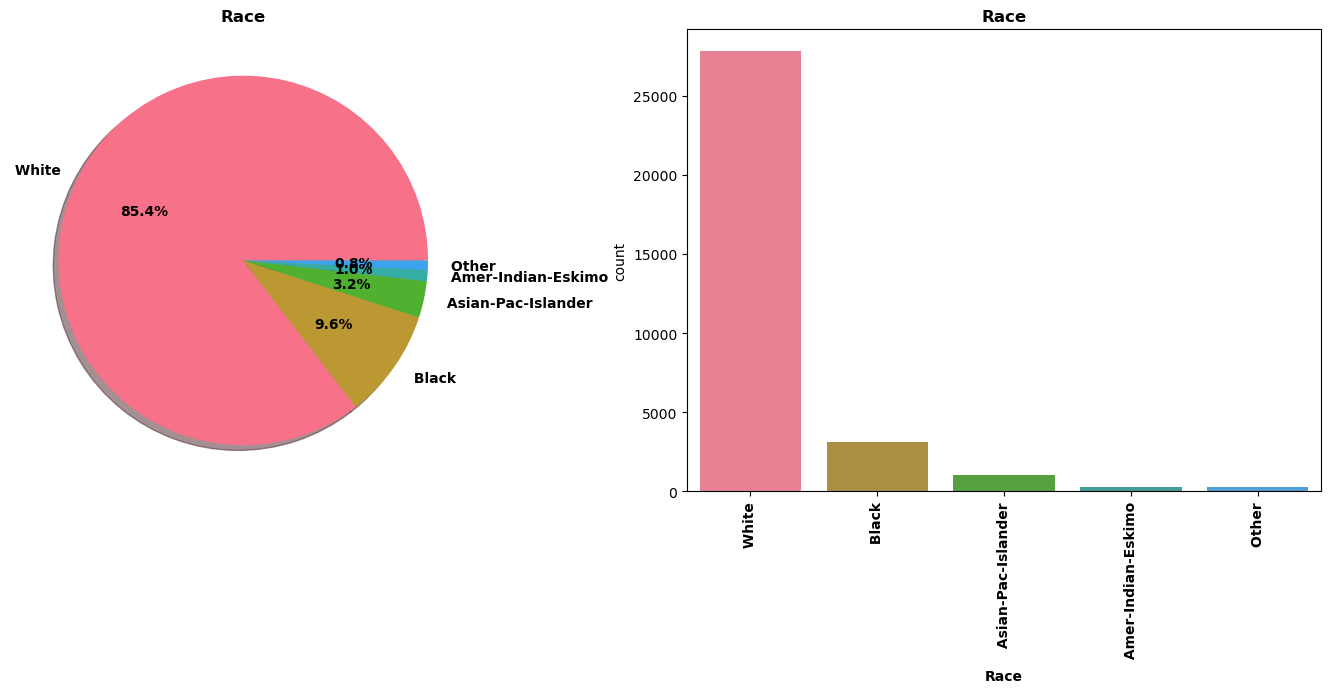

Observations for feature RACE:


Value  Count  % Count
0                White  27794     85.4
1                Black   3122      9.6
2   Asian-Pac-Islander   1038      3.2
3   Amer-Indian-Eskimo    311      1.0
4                Other    271      0.8

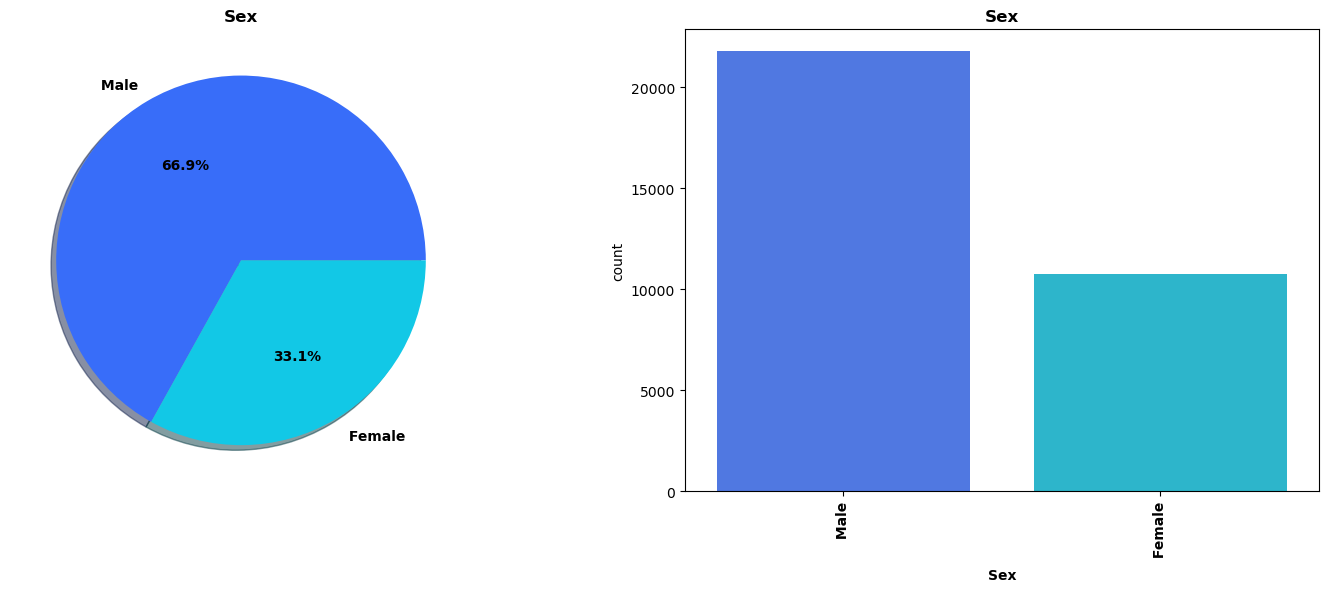

Observations for feature SEX:


Value  Count  % Count
0     Male  21774     66.9
1   Female  10762     33.1

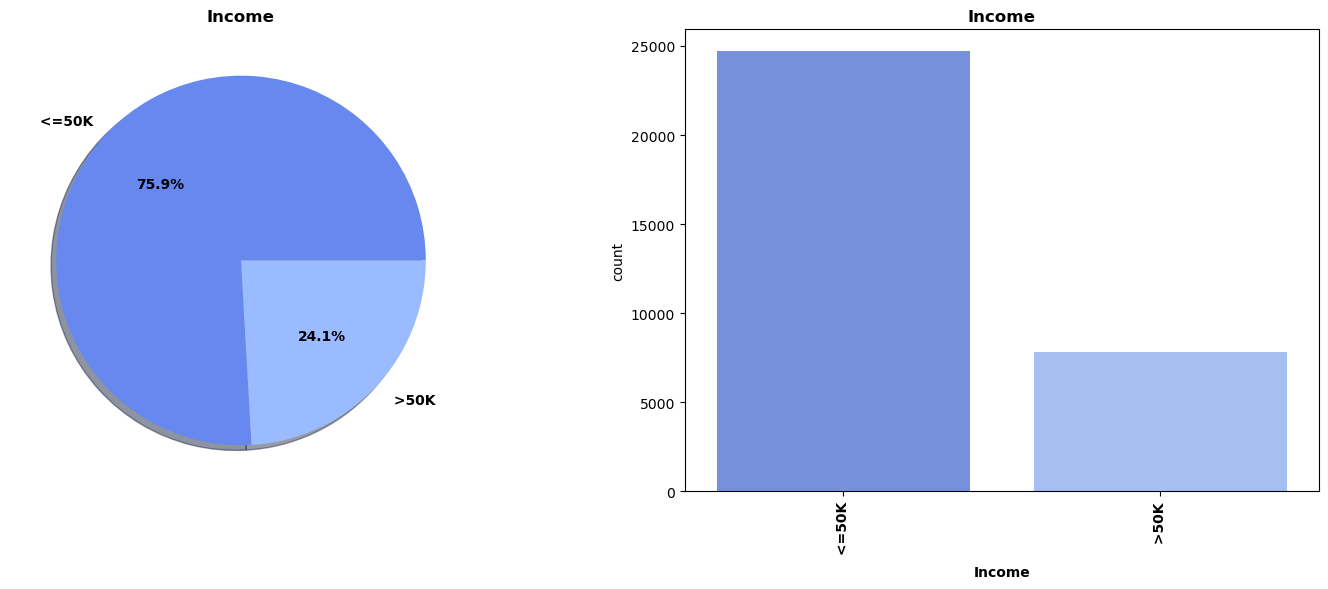

Observations for feature INCOME:


Value  Count  % Count
0   <=50K  24697     75.9
1    >50K   7839     24.1

In [32]:
colors=['husl','Dark2','Set2_r','summer_r','Set1','husl','rainbow','coolwarm','tab10','rainbow_r','gist_earth','Set2','prism',
        'hls','Paired','rocket','mako','flare','Blues_r']

plotnumber =1
for i in df_categorical.columns[:-1]:
    sns.set_palette(colors[plotnumber-1])
    if plotnumber <=20:
        f,ax=plt.subplots(1,2,figsize=(18,6))
        df[i].value_counts().plot.pie(autopct='%3.1f%%',
                                      textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0],shadow=True)
        ax[0].set_title(i, fontsize=12,fontweight ='bold')
        ax[0].set_ylabel('')
        sns.countplot(df[i],data=df,ax=ax[1])
        ax[1].set_title(i,fontsize=12,fontweight ='bold')
        ax[1].set_xlabel(i,fontsize=10,fontweight ='bold')
        plt.xticks(fontsize=10,fontweight ='bold',rotation=90)
    plotnumber+=1
    plt.show()
    length=df[i].nunique()
    print('\033[1m'+ "Observations for feature " + i.upper() + ":" +'\033[0m')
    length=df[i].nunique()
    name=[]
    value_count=[]
    percent_value_count=[]
    for j in range(length):
        name.append(df[i].value_counts().index.values[j])
        value_count.append((df[i].value_counts())[j])
        percent_value_count.append(round(((df[i].value_counts())[j])*100/(df[i].value_counts().sum()),1))
    df_value_count=pd.DataFrame({'Value':name,'Count':value_count,'% Count': percent_value_count})
    display(df_value_count)
    print("="*120)

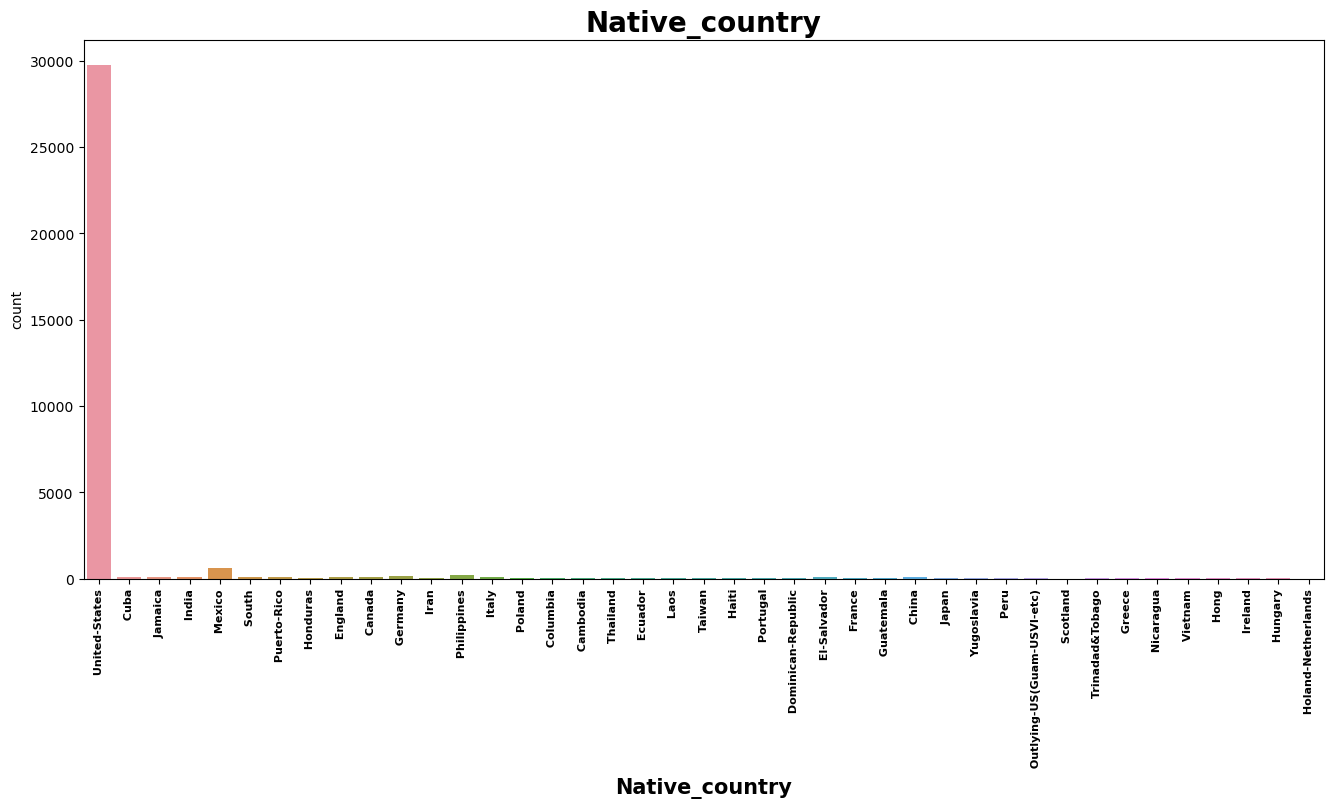

Observations for Native_country :


Value  Count  % Count
0                 United-States  29734     91.4
1                        Mexico    639      2.0
2                   Philippines    198      0.6
3                       Germany    137      0.4
4                        Canada    121      0.4
5                   Puerto-Rico    114      0.4
6                   El-Salvador    106      0.3
7                         India    100      0.3
8                          Cuba     95      0.3
9                       England     90      0.3
10                      Jamaica     81      0.2
11                        South     80      0.2
12                        China     75      0.2
13                        Italy     73      0.2
14           Dominican-Republic     70      0.2
15                      Vietnam     67      0.2
16                        Japan     62      0.2
17                    Guatemala     62      0.2
18                       Poland     60      0.2
19                     Columbia     59      0.2
20                       Taiwan     51      0.2
21                        Haiti     44      0.1
22                         Iran     43      0.1
23                     Portugal     37      0.1
24                    Nicaragua     34      0.1
25                         Peru     31      0.1
26                       France     29      0.1
27                       Greece     29      0.1
28                      Ecuador     28      0.1
29                      Ireland     24      0.1
30                         Hong     20      0.1
31                     Cambodia     19      0.1
32              Trinadad&Tobago     19      0.1
33                         Laos     18      0.1
34                     Thailand     18      0.1
35                   Yugoslavia     16      0.0
36   Outlying-US(Guam-USVI-etc)     14      0.0
37                     Honduras     13      0.0
38                      Hungary     13      0.0
39                     Scotland     12      0.0
40           Holand-Netherlands      1      0.0

In [33]:
colors=['Dark2','Set2_r','summer_r','Set1','husl']

sns.set_palette(colors[0])
  
f,ax=plt.subplots(1,1,figsize=(16,7))    
sns.countplot(df["Native_country"],data=df)    
ax.set_title("Native_country",fontsize=20,fontweight ='bold')    
ax.set_xlabel("Native_country",fontsize=15,fontweight ='bold')    
plt.xticks(fontsize=8,fontweight ='bold',rotation=90)    
plt.show()    
length=df["Native_country"].nunique()    
print('\033[1m'+ "Observations for Native_country :" +'\033[0m')       
length=df["Native_country"].nunique()    
name=[]    
value_count=[]    
percent_value_count=[]    
for j in range(length):    
    name.append(df["Native_country"].value_counts().index.values[j])    
    value_count.append((df["Native_country"].value_counts()).iloc[j])    
    percent_value_count.append(round(((df["Native_country"].value_counts()).iloc[j])*100/(df["Native_country"].value_counts().sum()),1))    
df_value_count=pd.DataFrame({'Value':name,'Count':value_count,'% Count': percent_value_count})    
display(df_value_count)    
print("="*120)    

### Observations:
- **Most of the data is from country "US"**

### Univariate Graphical Analysis for Numerical data

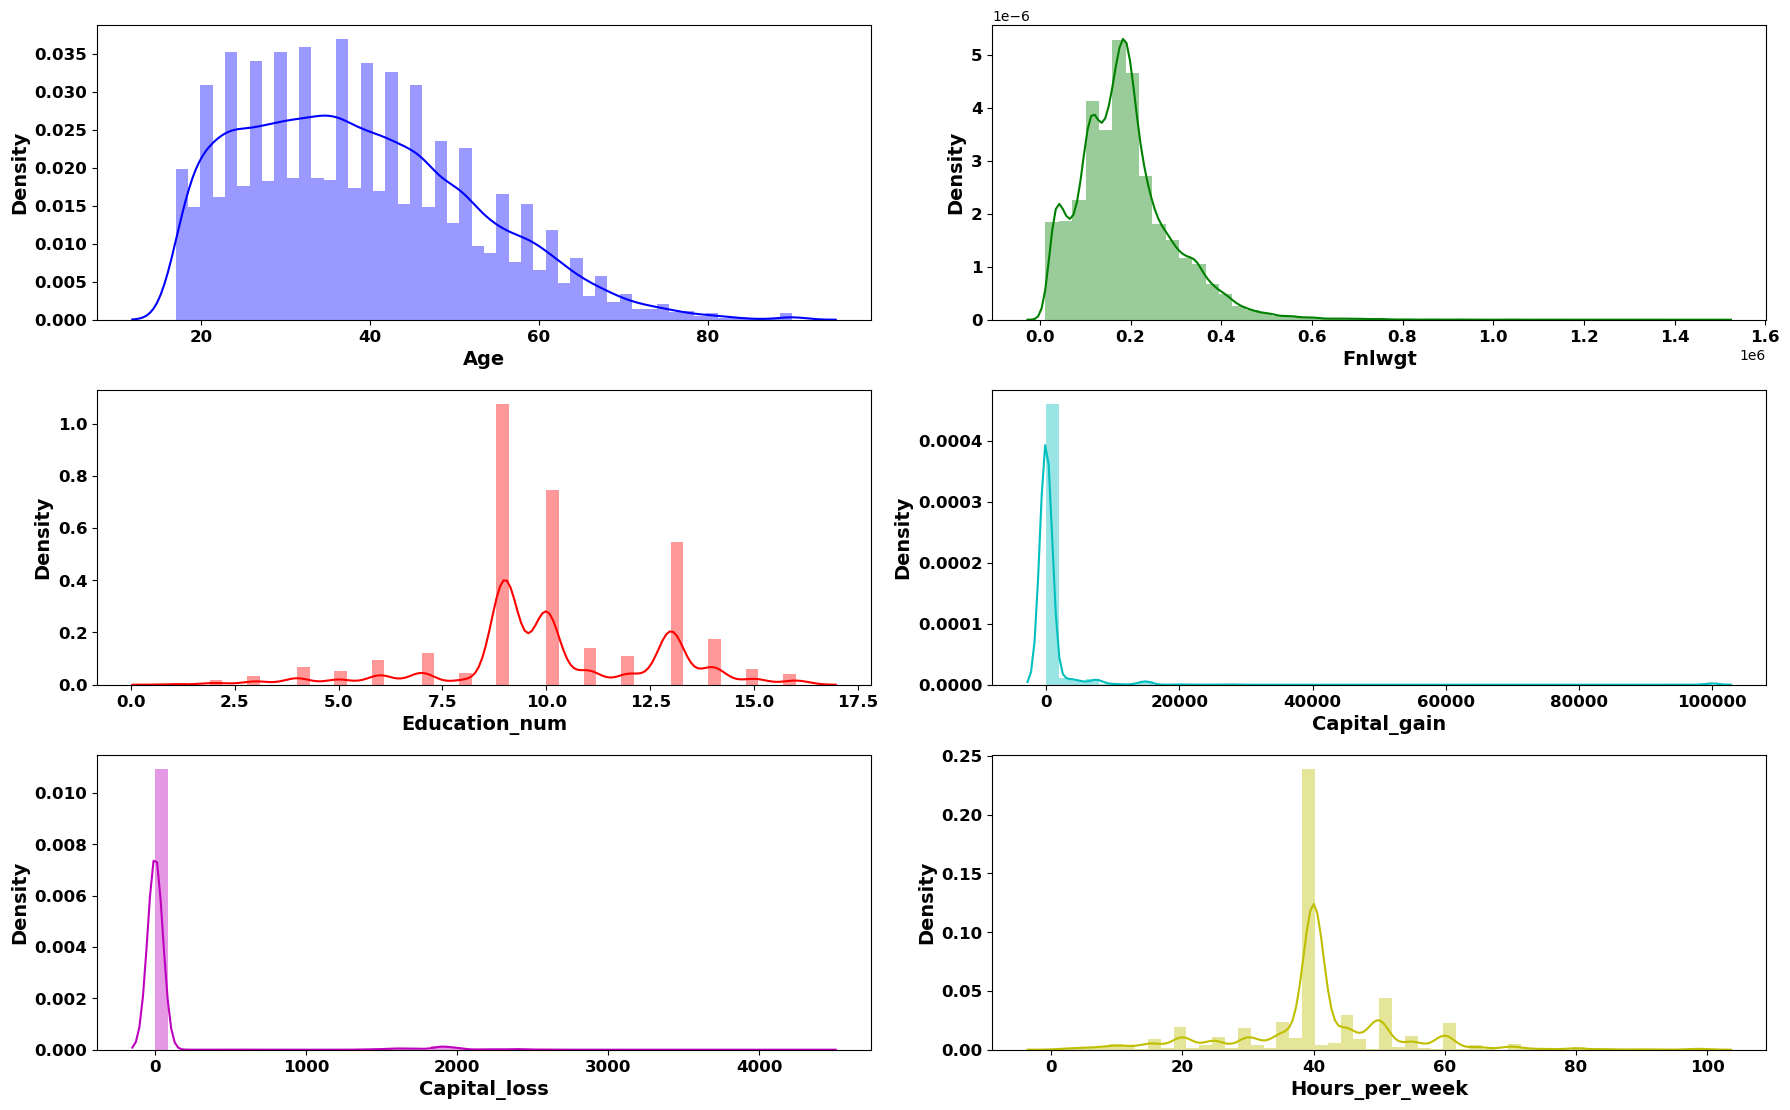

In [34]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(18,18),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_numerical.columns:
    if plotnum<=20:
        plt.subplot(5,2,plotnum)
        sns.distplot(df[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observation:
- **Most of the people work for 40 hours per week.very few work for more than 80 hours**
- **There is large variation in capital_gain and capital_loss.most of the people have zero capital gain and loss**
- **The number of years of education an individual has completed varies between 2.5 to 17.5.**
- **Most of the people are between 20 to 40 age group**

### Bivariate Graphical Analysis for categorical data

In [35]:
#df_categorical=['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
pd.crosstab(df['Workclass'],df["Income"], margins=True).style.background_gradient(cmap='summer_r')

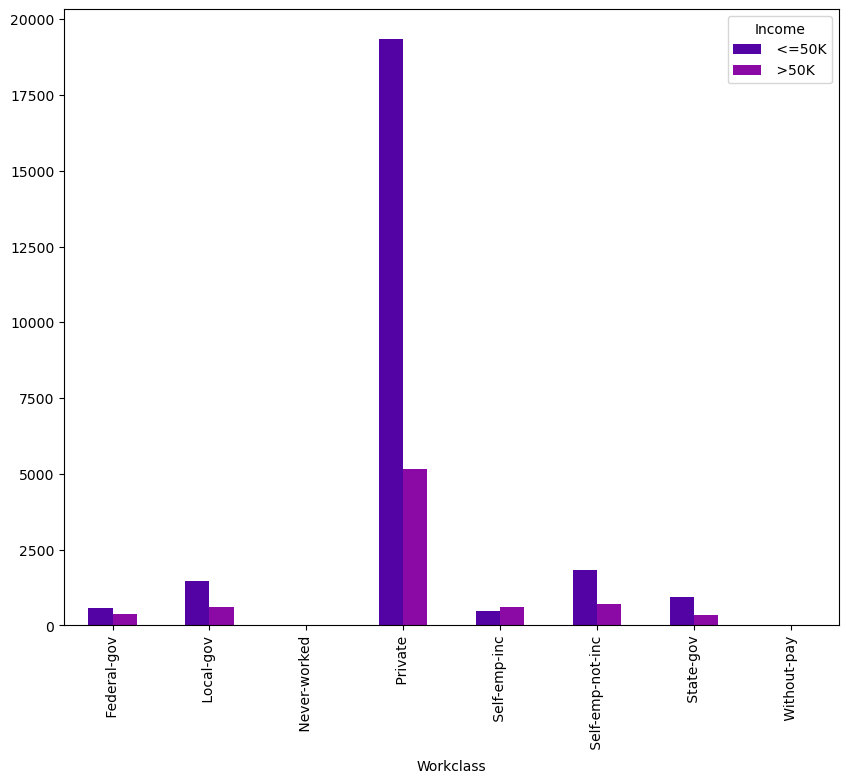

In [36]:
crosstab_table = pd.crosstab(df['Workclass'], df["Income"])

# Create a figure object with a larger size
fig, ax = plt.subplots(figsize=(10, 8))

# Create a bar plot
crosstab_table.plot(kind='bar', ax=ax)
plt.show()

#### Observation:
- **Most of the people belong to private workclass and many where having income <=50K**
- **In Self-Employed Incorporated category the number of people who earn more than 50K dollars are more**
- **75.3% people belongs to Private sector followed by Self Emplyoed not Incorporated with 7.8 %**
- **We can see very less difference between the number of people whose income is more or less than 50K dollars an year**

In [37]:
pd.crosstab(df['Education'],df["Income"], margins=True).style.background_gradient(cmap='summer_r')

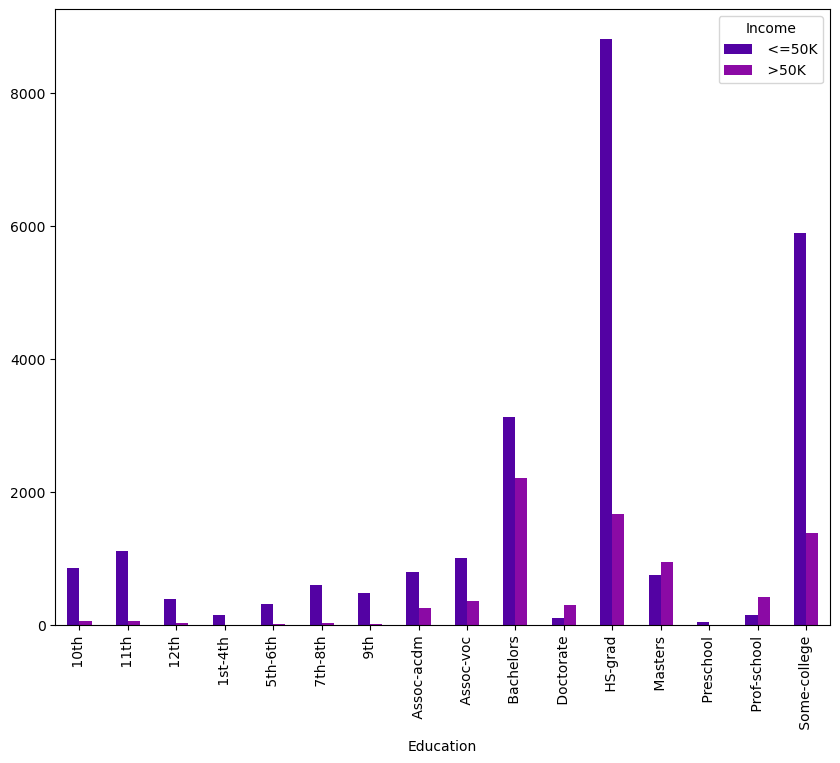

In [38]:
crosstab_table = pd.crosstab(df['Education'], df["Income"])

# Create a figure object with a larger size
fig, ax = plt.subplots(figsize=(10, 8))

# Create a bar plot
crosstab_table.plot(kind='bar', ax=ax)
plt.show()

#### Observation:
- **Most of the people from some college,HS-grad and Bachelors are earning more income than remaining qualification.
we can see more people with income greater than 50k belong to Bachelores**

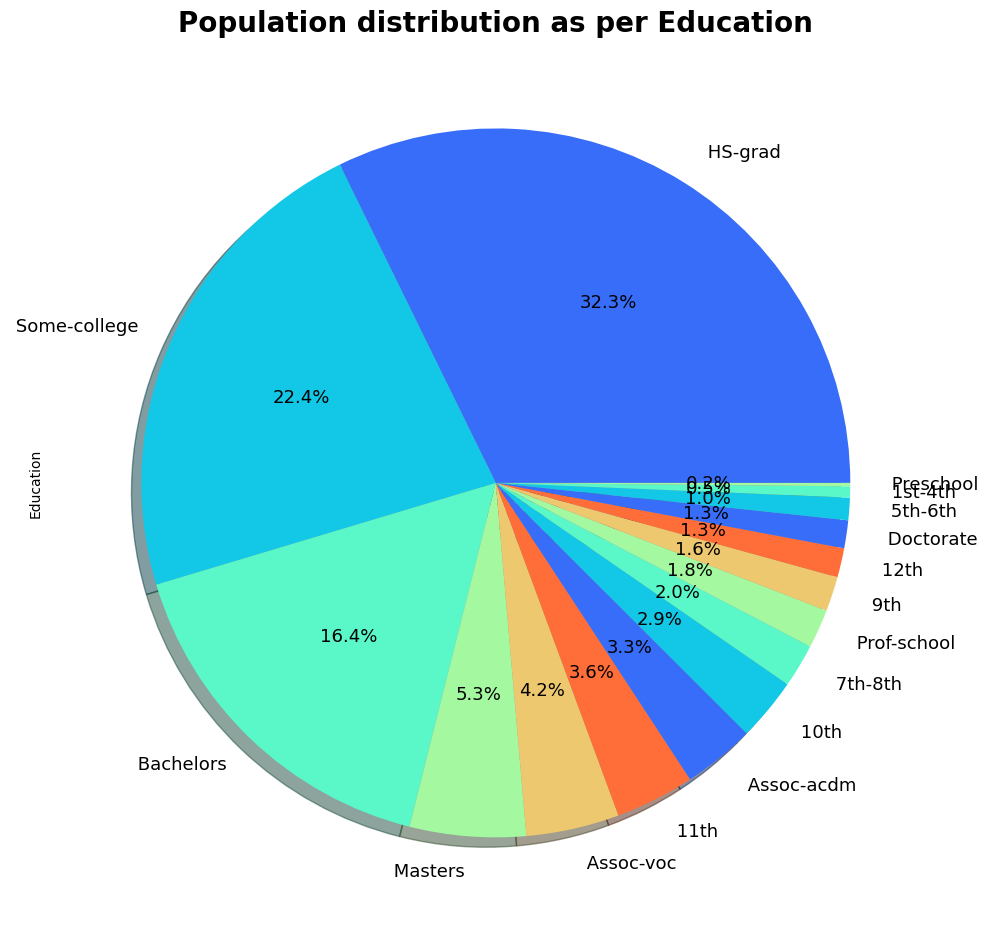

In [39]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
plt.figure(figsize=(10,10))
df['Education'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontsize':13}, shadow=True)
plt.title('Population distribution as per Education', fontsize=20,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **Most of the people education qualification is HS-grad**
- **5.3 % people with masters and 1.3 % population is Doctorate degree holder. Highly educated & intellactual people belongs to this category**
- **Maximum number of people who earn more than 50K dollars are Bachelors degree holder**
- **In case of Assoc-acad or Assoc-voc, there are a few people who earn more than 50K dollars an year**

In [40]:
pd.crosstab(df['Marital_status'],df["Income"], margins=True).style.background_gradient(cmap='summer_r')

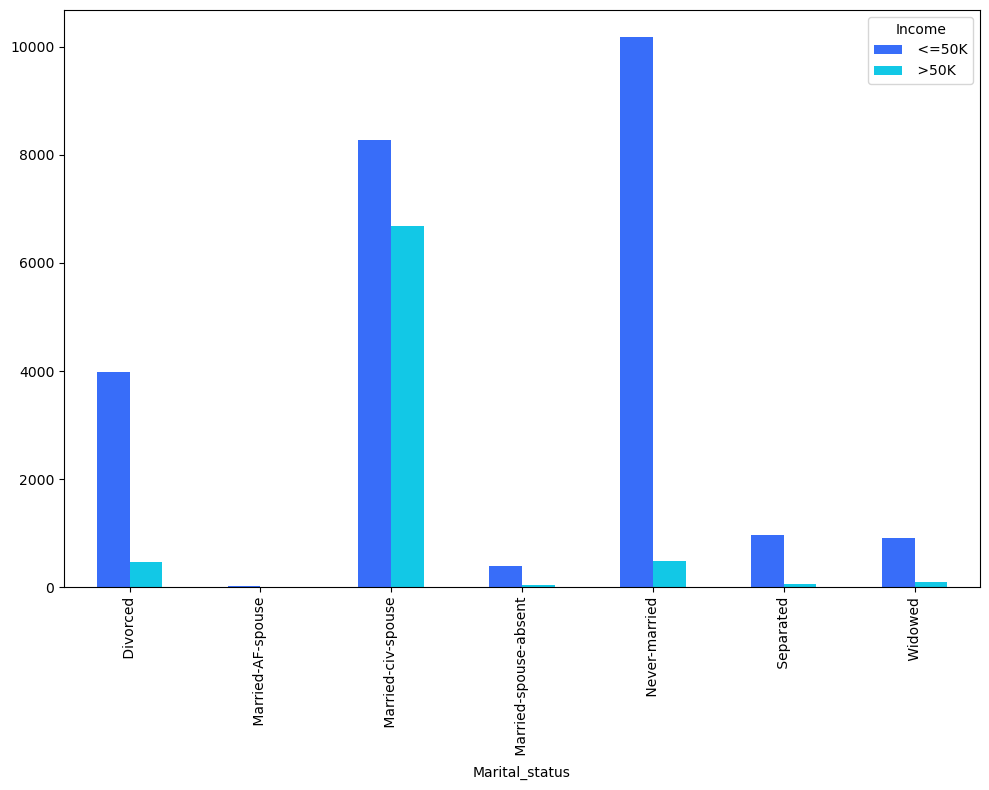

In [41]:
crosstab_table = pd.crosstab(df['Marital_status'], df["Income"])

# Create a figure object with a larger size
fig, ax = plt.subplots(figsize=(10, 8))

# Create a bar plot
crosstab_table.plot(kind='bar', ax=ax)
plt.show()

#### Observation:
- **Married people are most like to earn more than 50K dollars an year.**
- **Women under never-married category are more and they are earning less than 50k dollars**
- **Married-civ-spouse is the only category which has comparable number of people belonging to both categories**

In [42]:
pd.crosstab(df['Occupation'],df["Income"], margins=True).style.background_gradient(cmap='summer_r')

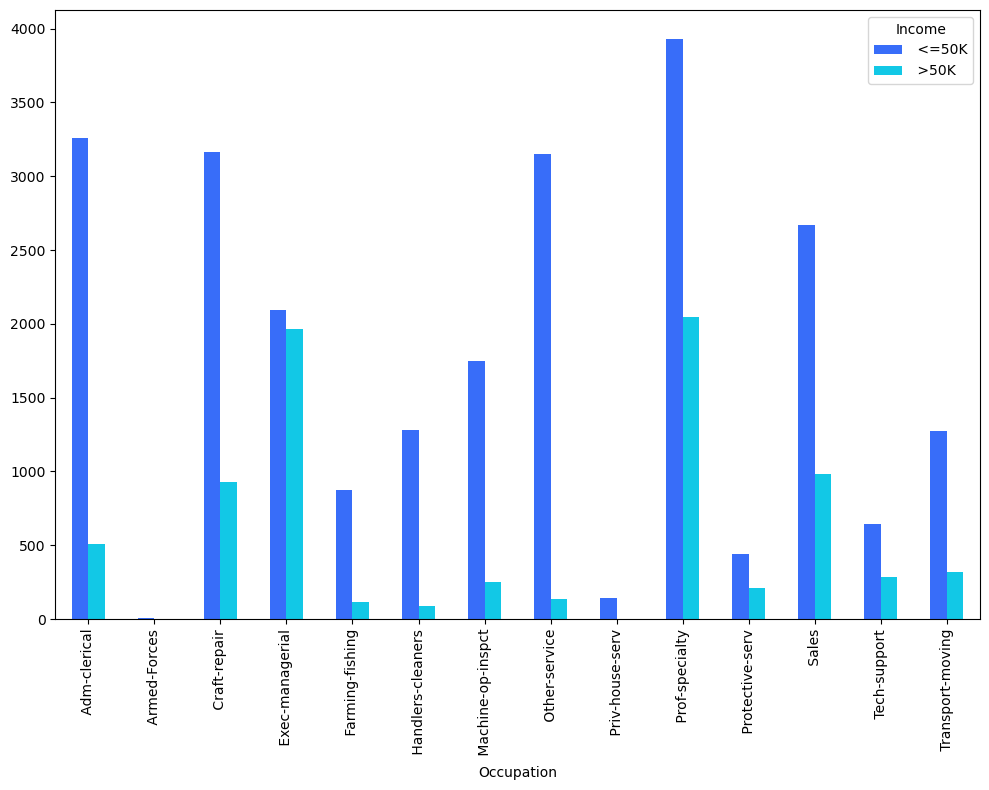

In [43]:
crosstab_table = pd.crosstab(df['Occupation'], df["Income"])

# Create a figure object with a larger size
fig, ax = plt.subplots(figsize=(10, 8))

# Create a bar plot
crosstab_table.plot(kind='bar', ax=ax)
plt.show()

#### Observation :
- **people with occupation prof-speciality are more.**
- **In most of the occupation,people who are earning less than 50k are more**
- **people in Exec-managerial role are equally likely to earn more than 50K dollars an year.**
- **Peoples working in Arm- Forces, Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Handlers-cleaners are very less likely to earn more than 50K dollars an year.**
- **Around 25% of the people working in Sales earn more than 50K dollars an year.**

In [44]:
pd.crosstab(df['Relationship'],df["Income"], margins=True).style.background_gradient(cmap='summer_r')

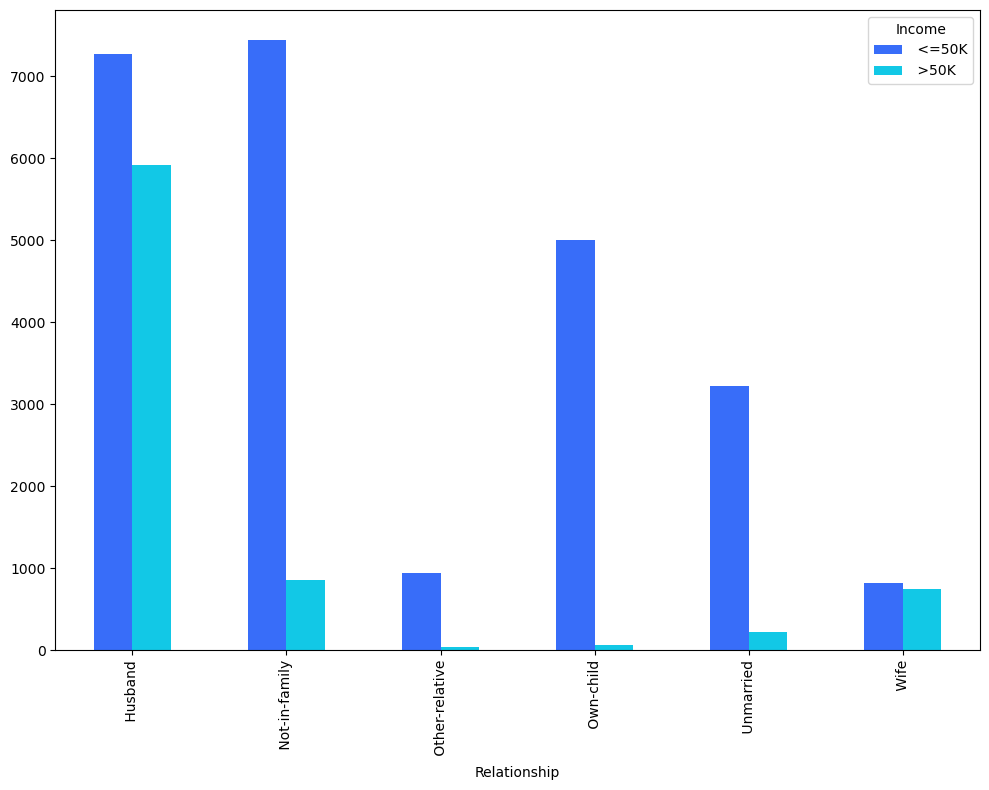

In [45]:
crosstab_table = pd.crosstab(df['Relationship'], df["Income"])

# Create a figure object with a larger size
fig, ax = plt.subplots(figsize=(10, 8))

# Create a bar plot
crosstab_table.plot(kind='bar', ax=ax)
plt.show()

#### Observation:
- **Wives are equally likely to earn more than 50K dollars an year**
- **people with no family are earning less than 50k**
- **For Husbands, although significant, there is less possibility of them to earn more than 50K dollars an year**
- **There are just a handful of Unmarried people earning more than 50K dollars an year.**

In [46]:
pd.crosstab(df['Race'],df["Income"], margins=True).style.background_gradient(cmap='summer_r')

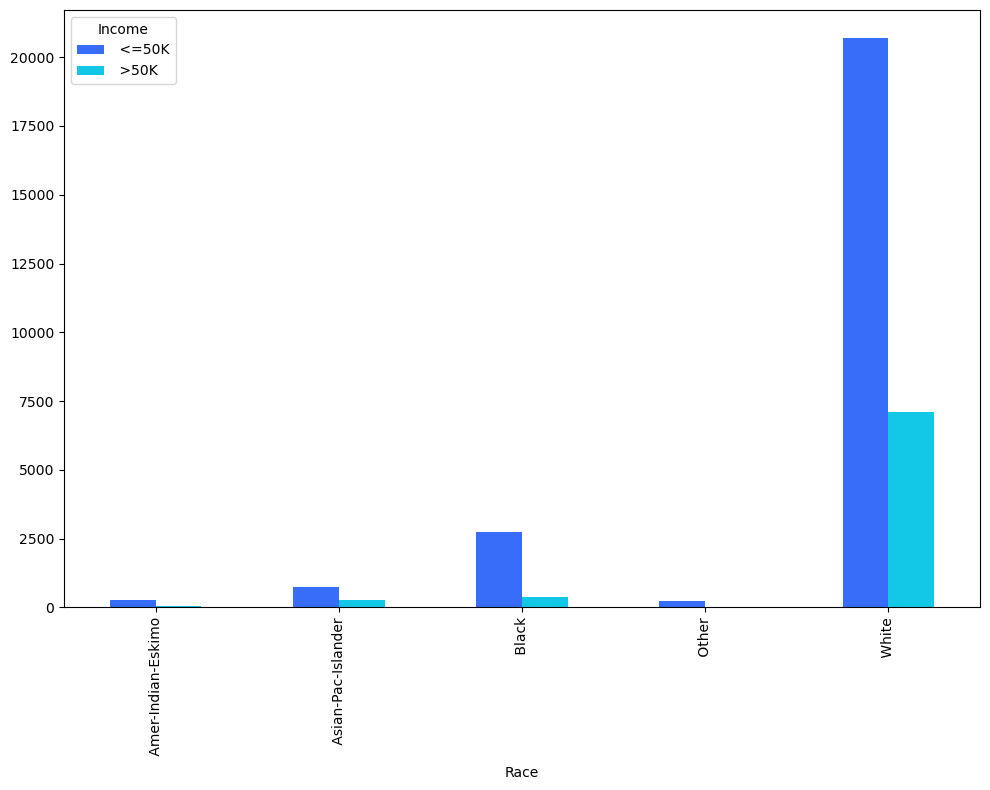

In [47]:
crosstab_table = pd.crosstab(df['Race'], df["Income"])

# Create a figure object with a larger size
fig, ax = plt.subplots(figsize=(10, 8))

# Create a bar plot
crosstab_table.plot(kind='bar', ax=ax)
plt.show()

#### Observation:
- **More people with white race.People earning more than 50k can be seen in this category**
- **people with other race are less in number**

In [48]:
pd.crosstab(df['Sex'],df["Income"], margins=True).style.background_gradient(cmap='summer_r')

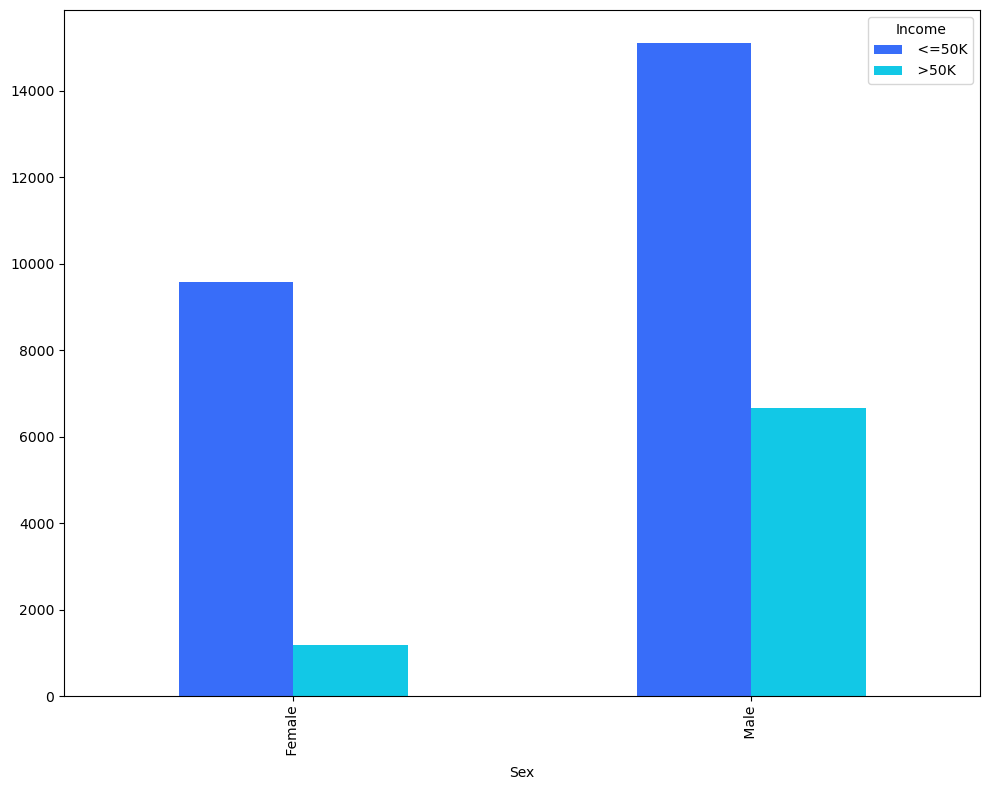

In [49]:
crosstab_table = pd.crosstab(df['Sex'], df["Income"])

# Create a figure object with a larger size
fig, ax = plt.subplots(figsize=(10, 8))

# Create a bar plot
crosstab_table.plot(kind='bar', ax=ax)
plt.show()

#### Observation:
- **Large gap between male and female earnings.**
- **male are earning more than female.Female earning more than 50k is less in count**

In [50]:
pd.crosstab(df['Native_country'],df["Income"], margins=True).style.background_gradient(cmap='summer_r')

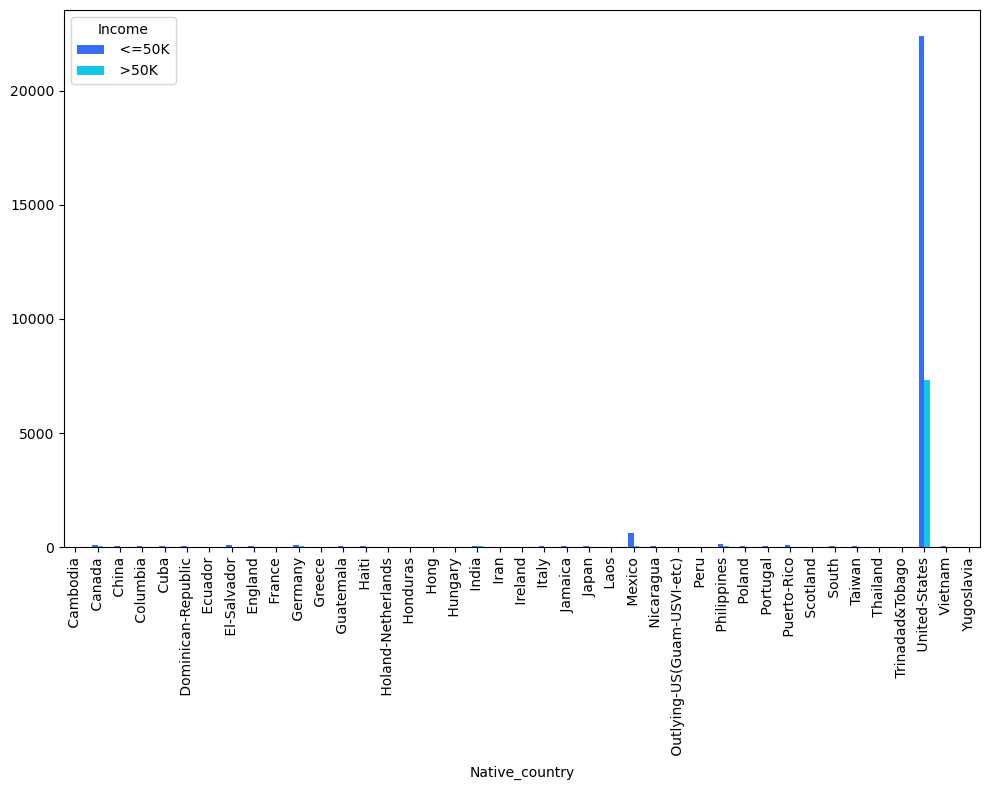

In [51]:
crosstab_table = pd.crosstab(df['Native_country'], df["Income"])

# Create a figure object with a larger size
fig, ax = plt.subplots(figsize=(10, 8))

# Create a bar plot
crosstab_table.plot(kind='bar', ax=ax)
plt.show()

#### Observation:
- **Most of the people who are earning are from United-States and  few in mexico**

### Bivariate Graphical Analysis for Numerical data

In [52]:
df_num=df_numerical.columns
df_num

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

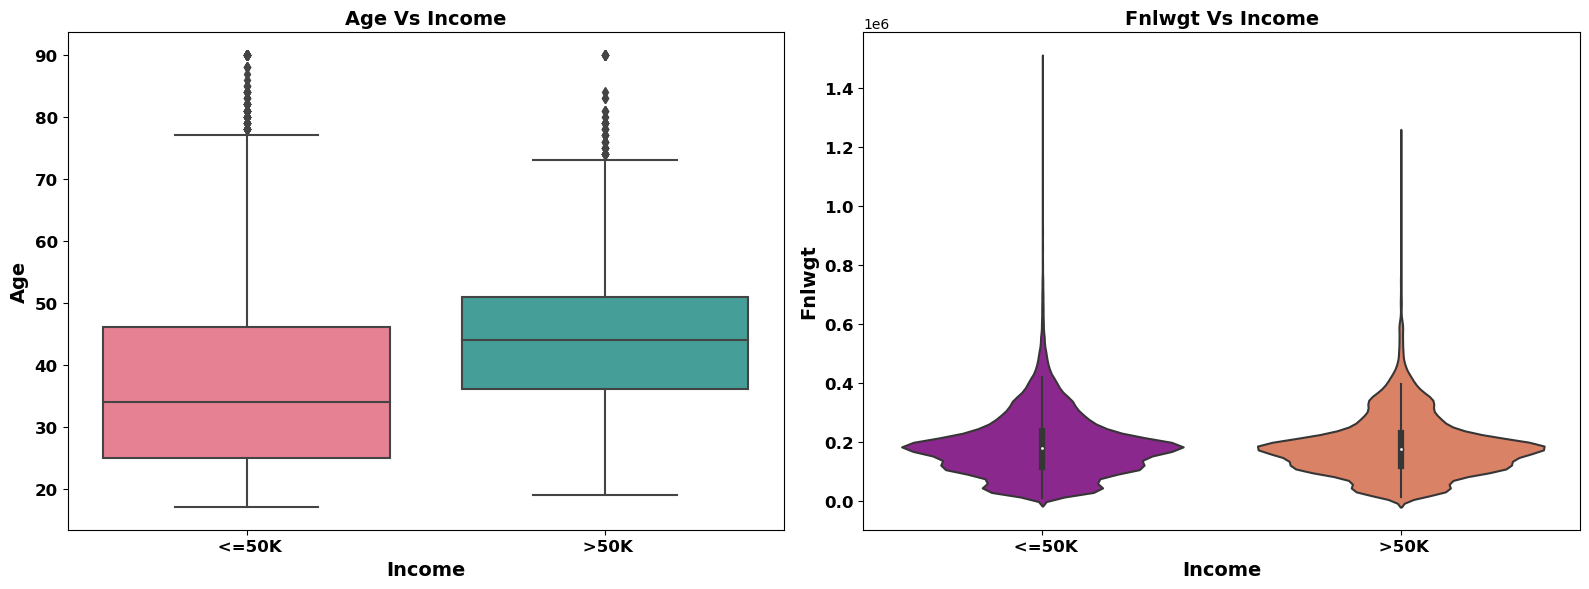

In [53]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df["Income"],df[df_num[0]], palette = 'husl')
plt.title('{} Vs Income'.format(df_num[0]),fontsize=14, fontweight='bold')
plt.xlabel("Income", fontsize=14,fontweight='bold')
plt.ylabel(df_num[0], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.violinplot(df["Income"],df[df_num[1]], palette = 'plasma')
plt.title('{} Vs Income'.format(df_num[1]),fontsize=14, fontweight='bold')
plt.xlabel("Income", fontsize=14,fontweight='bold')
plt.ylabel(df_num[1], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **We can find maximum people earning more than 50K dollors belong to age group 35 to 60**
- **some outliers show people with age 75 to 90 are earning more than 50k** 

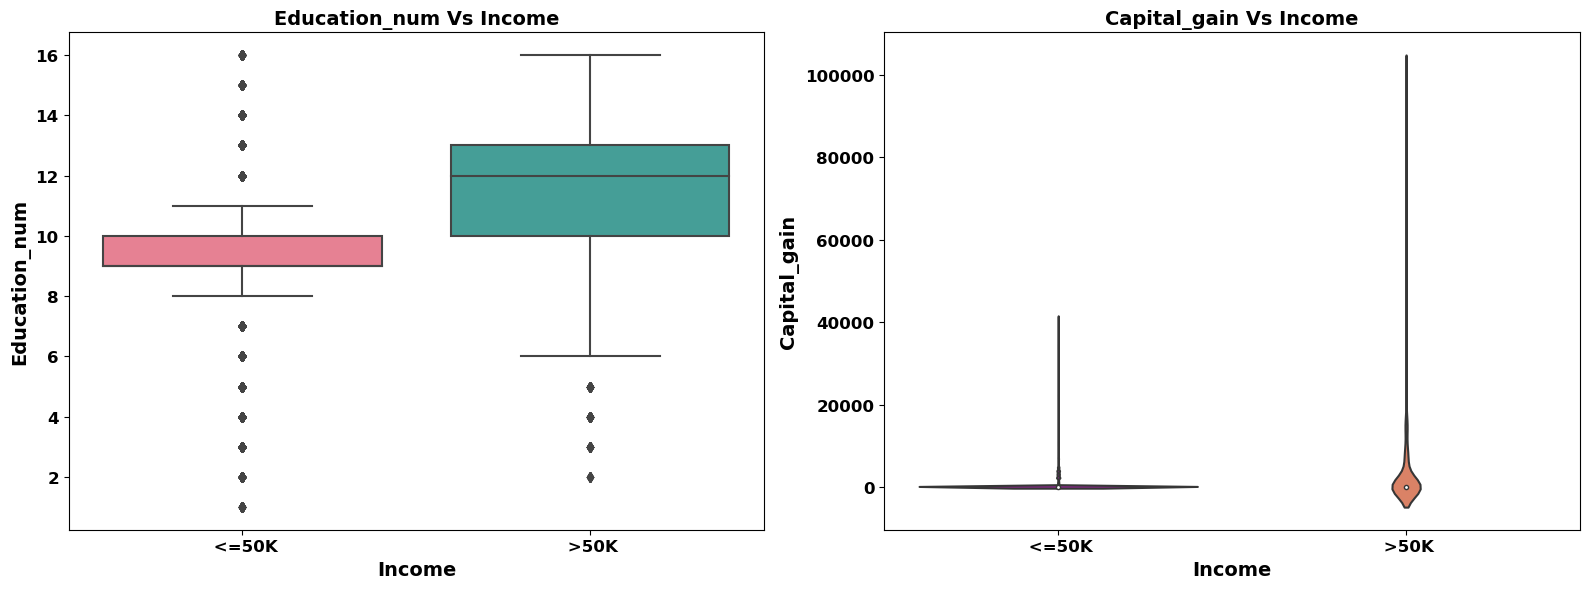

In [54]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df["Income"],df[df_num[2]], palette = 'husl')
plt.title('{} Vs Income'.format(df_num[2]),fontsize=14, fontweight='bold')
plt.xlabel("Income", fontsize=14,fontweight='bold')
plt.ylabel(df_num[2], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.violinplot(df["Income"],df[df_num[3]], palette = 'plasma')
plt.title('{} Vs Income'.format(df_num[3]),fontsize=14, fontweight='bold')
plt.xlabel("Income", fontsize=14,fontweight='bold')
plt.ylabel(df_num[3], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **people with more educational years of experience are earning more.Here people with more than 10 education_num are earning more than 50k**
- **High qualified are earning high income**

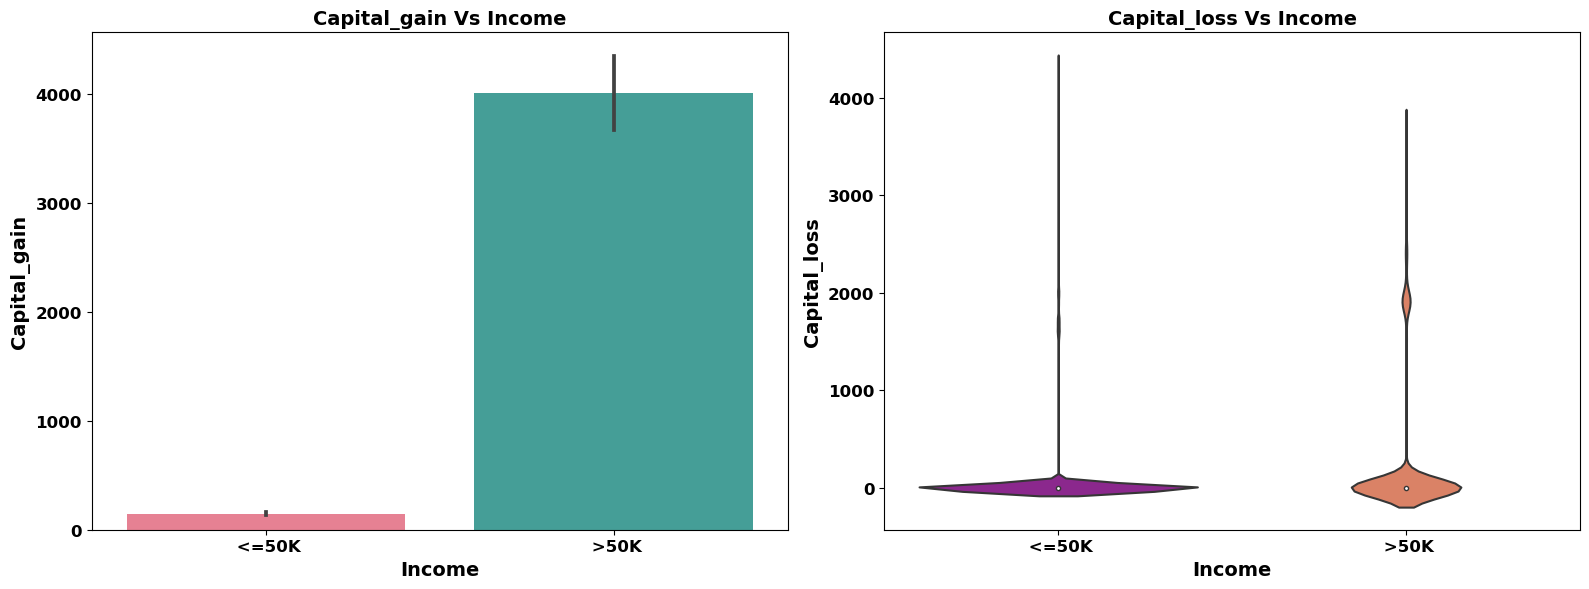

In [55]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(df["Income"],df[df_num[3]], palette = 'husl')
plt.title('{} Vs Income'.format(df_num[3]),fontsize=14, fontweight='bold')
plt.xlabel("Income", fontsize=14,fontweight='bold')
plt.ylabel(df_num[3], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.violinplot(df["Income"],df[df_num[4]], palette = 'plasma')
plt.title('{} Vs Income'.format(df_num[4]),fontsize=14, fontweight='bold')
plt.xlabel("Income", fontsize=14,fontweight='bold')
plt.ylabel(df_num[4], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **capital gain is more for people who are earning morethan 50k.As they might have done better investments**

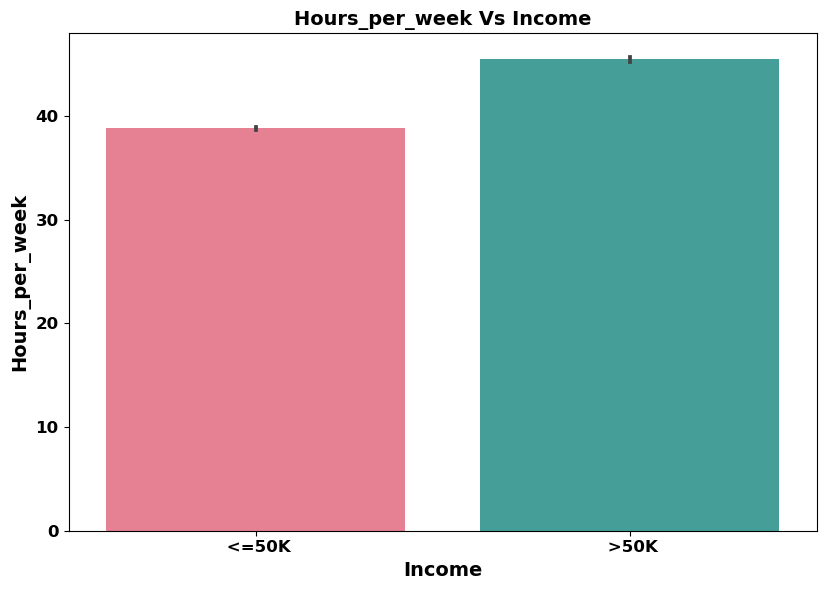

In [56]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(df["Income"],df[df_num[5]], palette = 'husl')
plt.title('{} Vs Income'.format(df_num[5]),fontsize=14, fontweight='bold')
plt.xlabel("Income", fontsize=14,fontweight='bold')
plt.ylabel(df_num[5], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()


#### Observation:
- **People with more than 50k income worked for more number of hours**

In [57]:
df_numerical.columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

In [58]:
df_categorical.columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Income', 'Native_country'],
      dtype='object')

### Multivariate Graphical Analysis

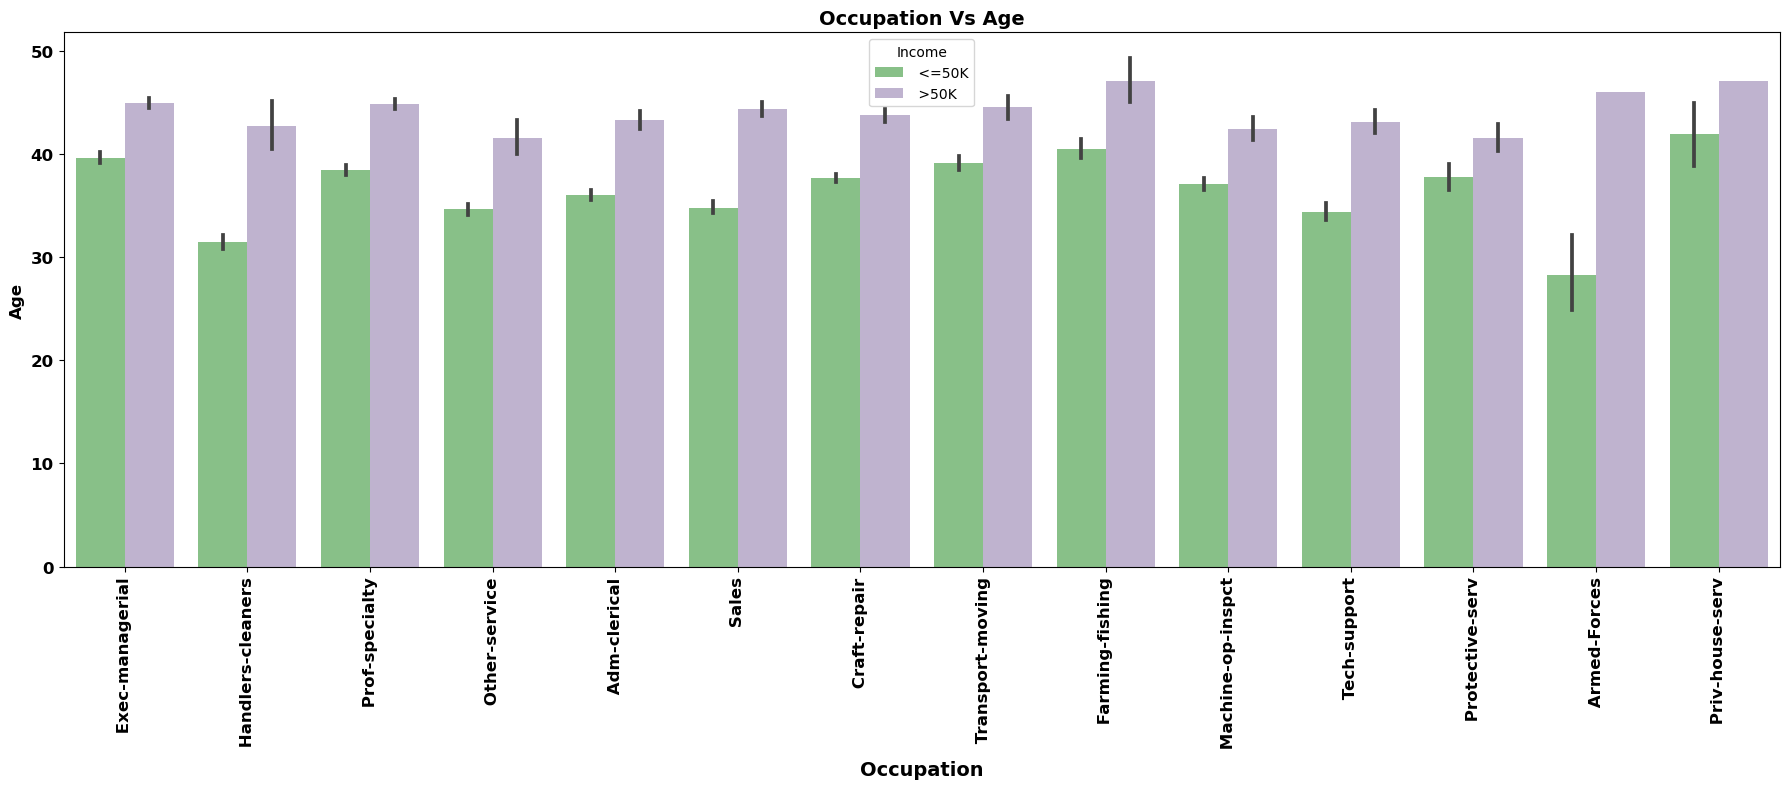

In [59]:
plt.figure(figsize=(18,8))
sns.barplot(x='Occupation',y='Age',data=df,hue='Income', palette='Accent')
plt.title('Occupation Vs Age',fontsize=14, fontweight='bold')
plt.xlabel('Occupation', fontsize=14,fontweight='bold')
plt.ylabel('Age', fontsize=12,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **we can see very few people below age 30 belong to Armed forces.And they are earning less than 50k.people age >30 are earning more**

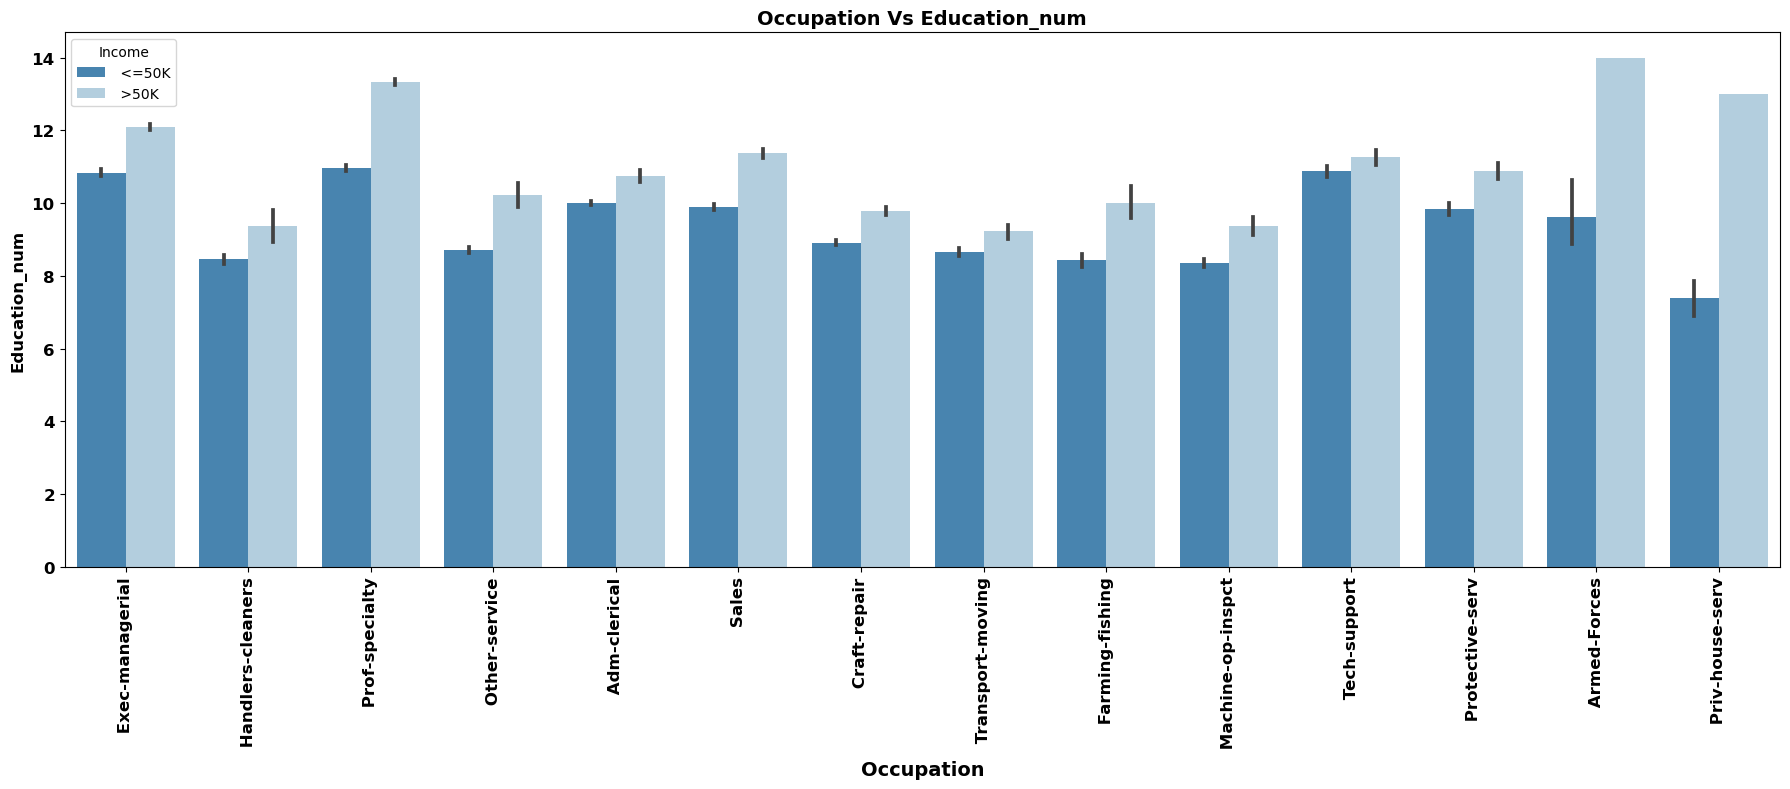

In [60]:
plt.figure(figsize=(18,8))
sns.barplot(x='Occupation',y='Education_num',data=df,hue='Income', palette='Blues_r')
plt.title('Occupation Vs Education_num',fontsize=14, fontweight='bold')
plt.xlabel('Occupation', fontsize=14,fontweight='bold')
plt.ylabel('Education_num', fontsize=12,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **people with more Education_num are with occupation Exec-managerial,prof-specialty and armed forces income is more than 50k**

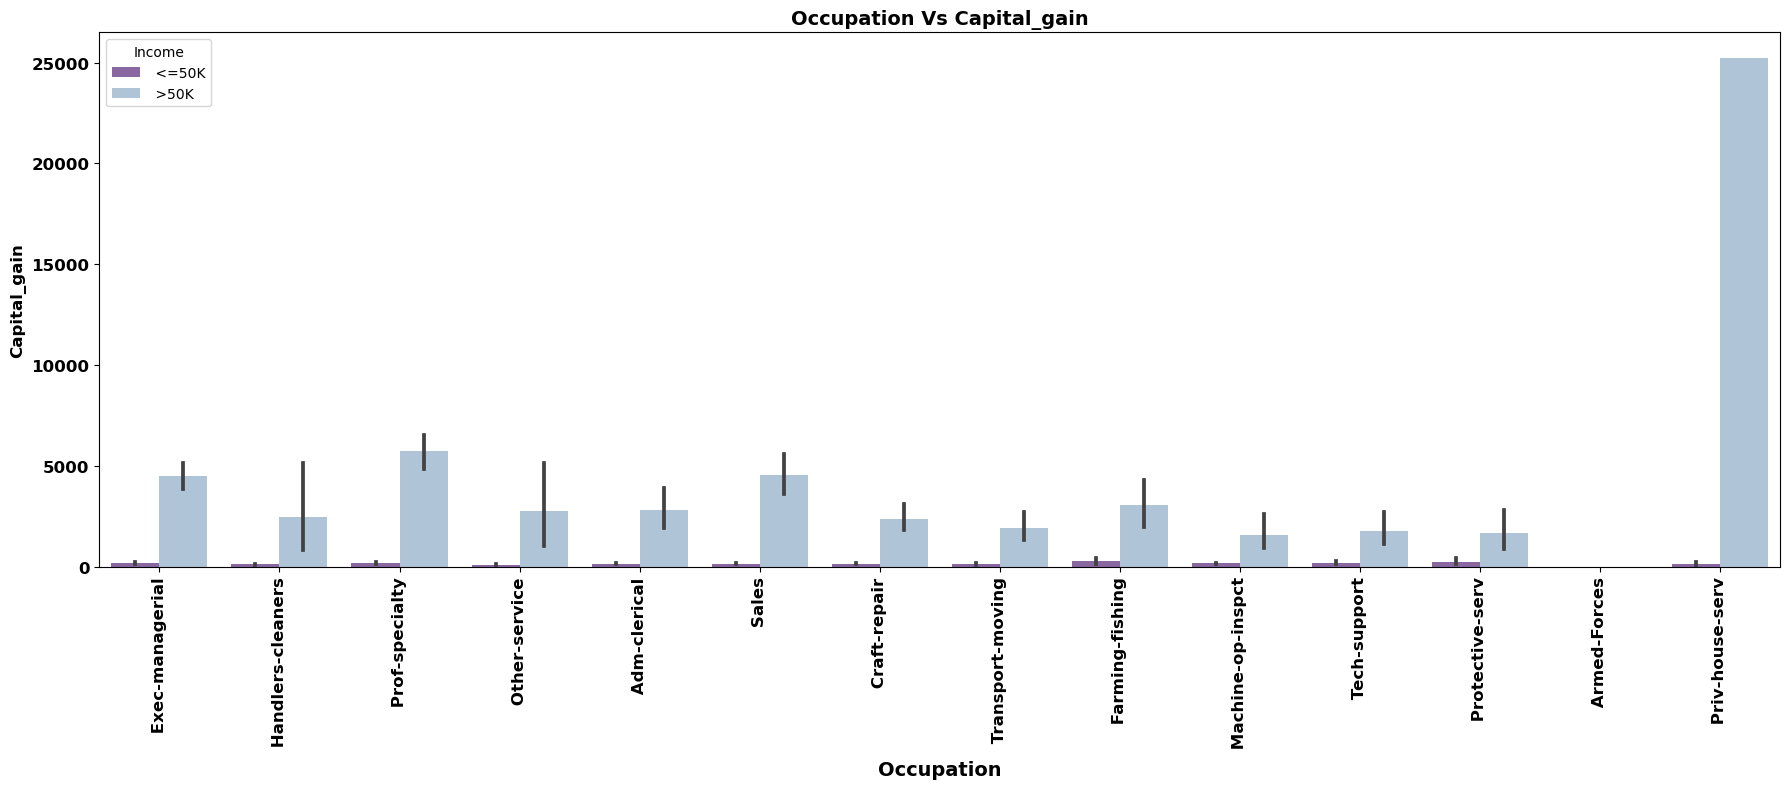

In [61]:
plt.figure(figsize=(18,8))
sns.barplot(x='Occupation',y='Capital_gain',data=df,hue='Income', palette='BuPu_r')
plt.title('Occupation Vs Capital_gain',fontsize=14, fontweight='bold')
plt.xlabel('Occupation', fontsize=14,fontweight='bold')
plt.ylabel('Capital_gain', fontsize=12,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **people with priv-hourse-serv occupation have more capital gain.People with armed forces have no investments and no capital gain**

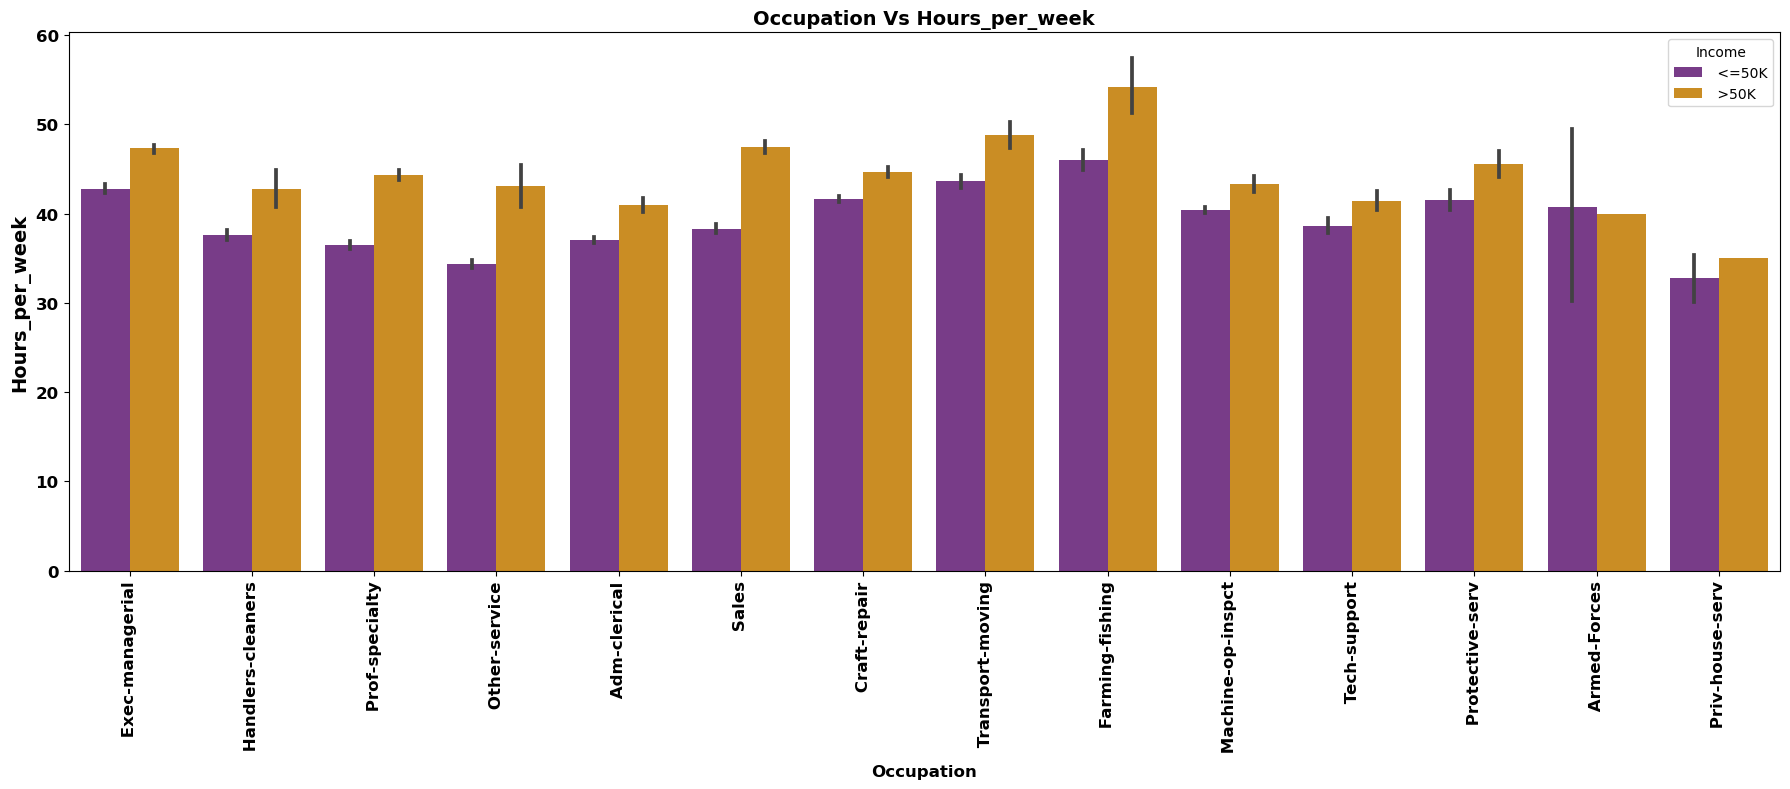

In [62]:
plt.figure(figsize=(18,8))
sns.barplot(y='Hours_per_week',x='Occupation',data=df,hue='Income', palette='CMRmap')
plt.title('Occupation Vs Hours_per_week',fontsize=14, fontweight='bold')
plt.ylabel('Hours_per_week', fontsize=14,fontweight='bold')
plt.xlabel('Occupation', fontsize=12,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **People with occupation farming fishing and transport moving are working for more number of hours per week**
- **private house serv people worked for less number of hours when compared to other occupatin**

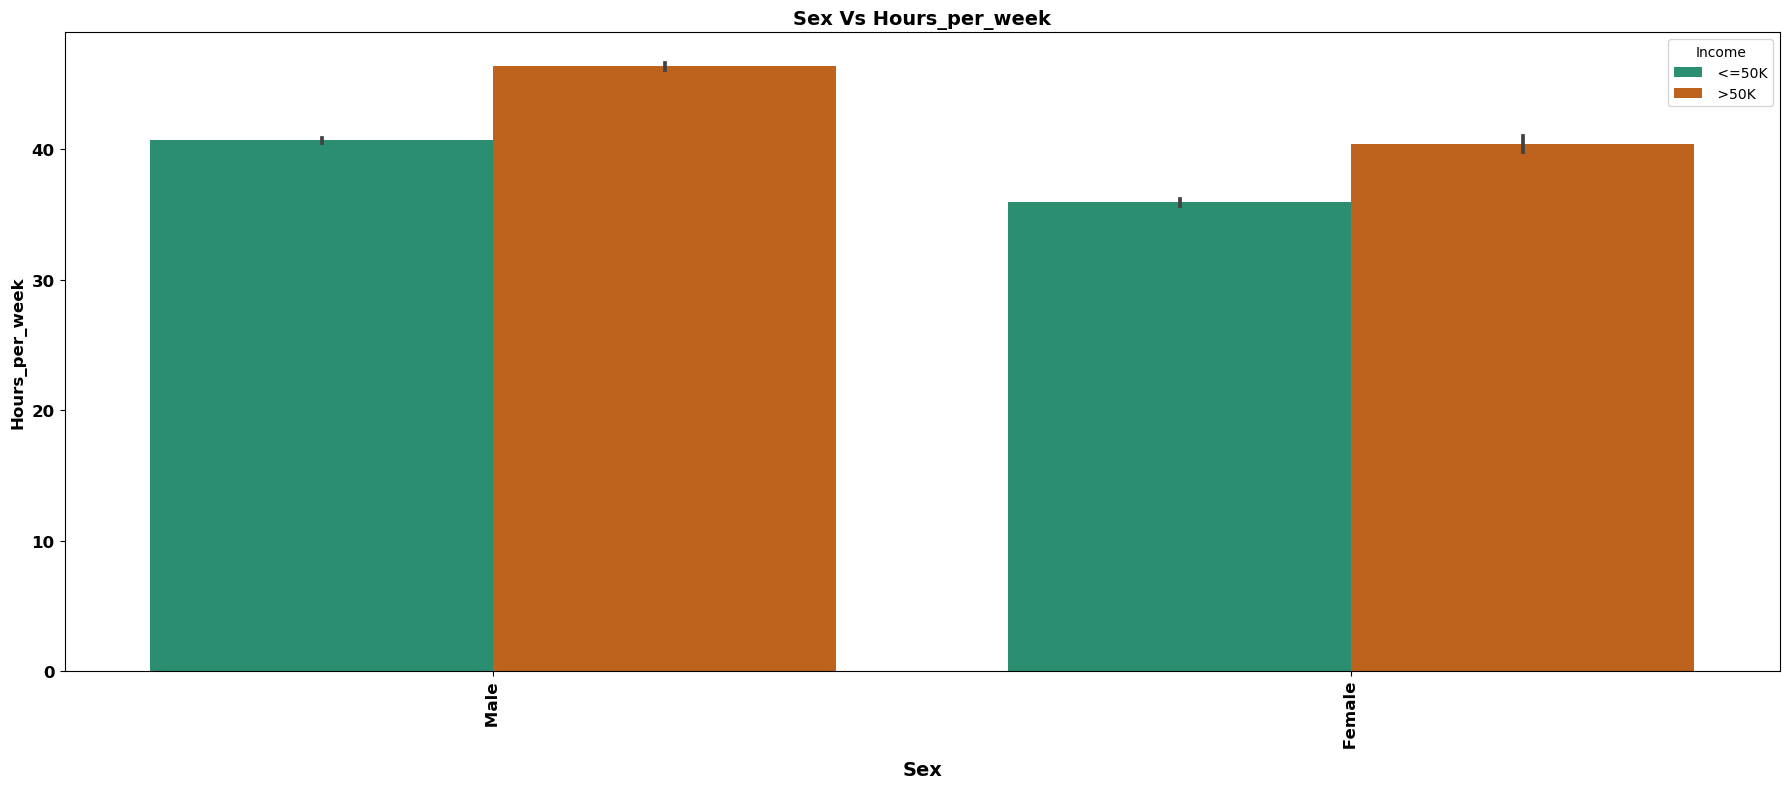

In [63]:
plt.figure(figsize=(18,8))
sns.barplot(x='Sex',y='Hours_per_week',data=df,hue='Income', palette='Dark2')
plt.title('Sex Vs Hours_per_week',fontsize=14, fontweight='bold')
plt.xlabel('Sex', fontsize=14,fontweight='bold')
plt.ylabel('Hours_per_week', fontsize=12,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **Male are earning more than female**

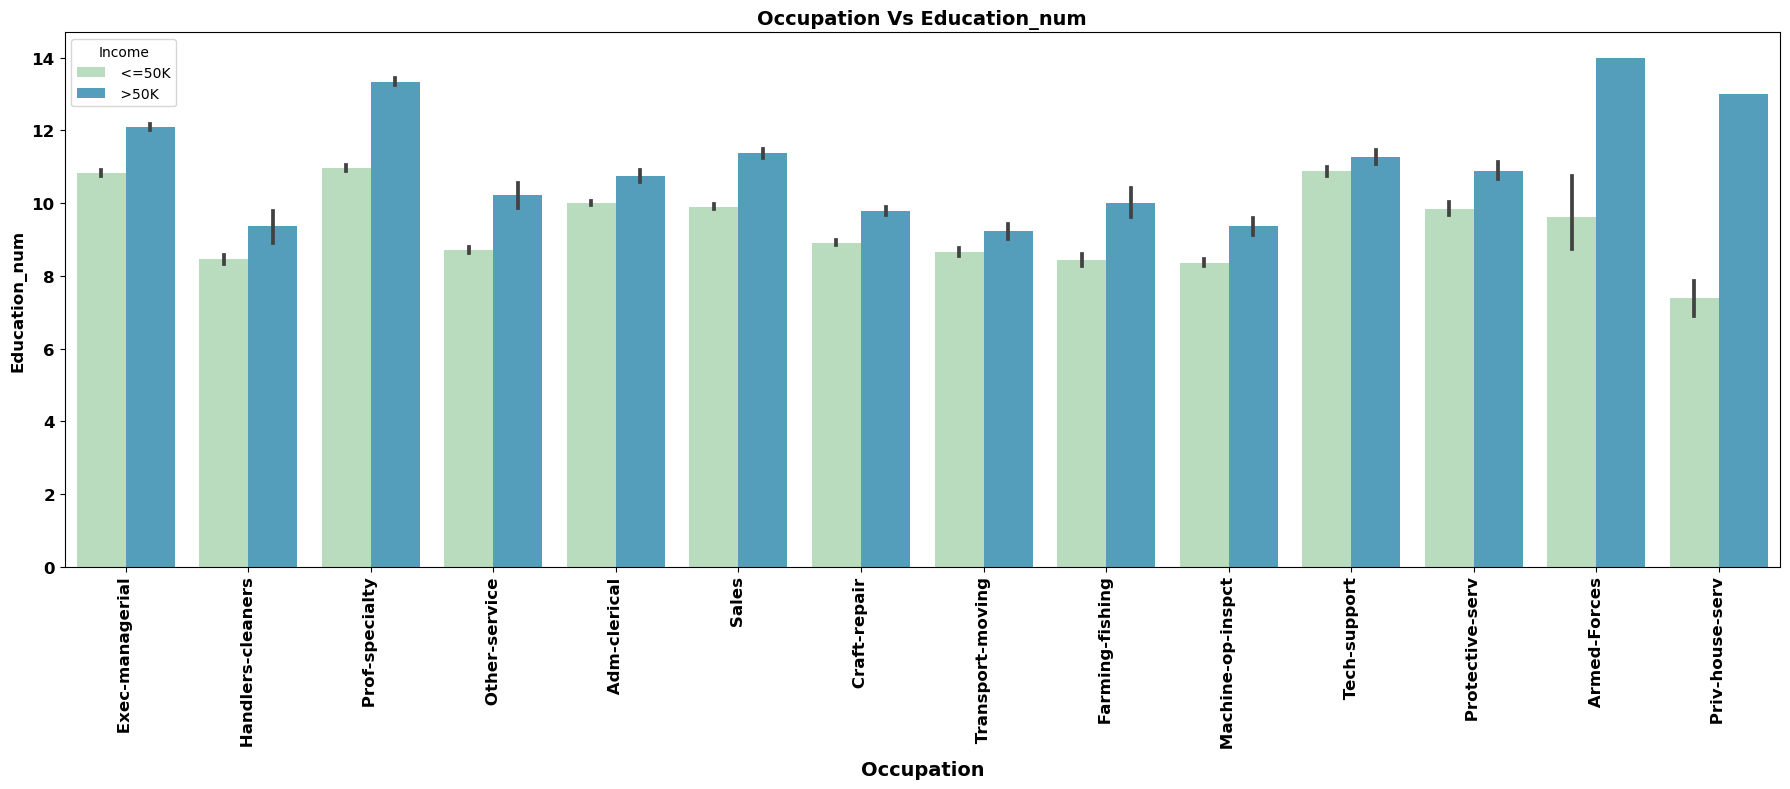

In [64]:
plt.figure(figsize=(18,8))
sns.barplot(x='Occupation',y='Education_num',data=df,hue='Income', palette='GnBu')
plt.title('Occupation Vs Education_num',fontsize=14, fontweight='bold')
plt.xlabel('Occupation', fontsize=14,fontweight='bold')
plt.ylabel('Education_num', fontsize=12,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **People with prof-speciality,armed-forces and priv house serv are earning more than 50k**
- **people with less education num are in occupations like craft repair,transport moving and farming fishing**

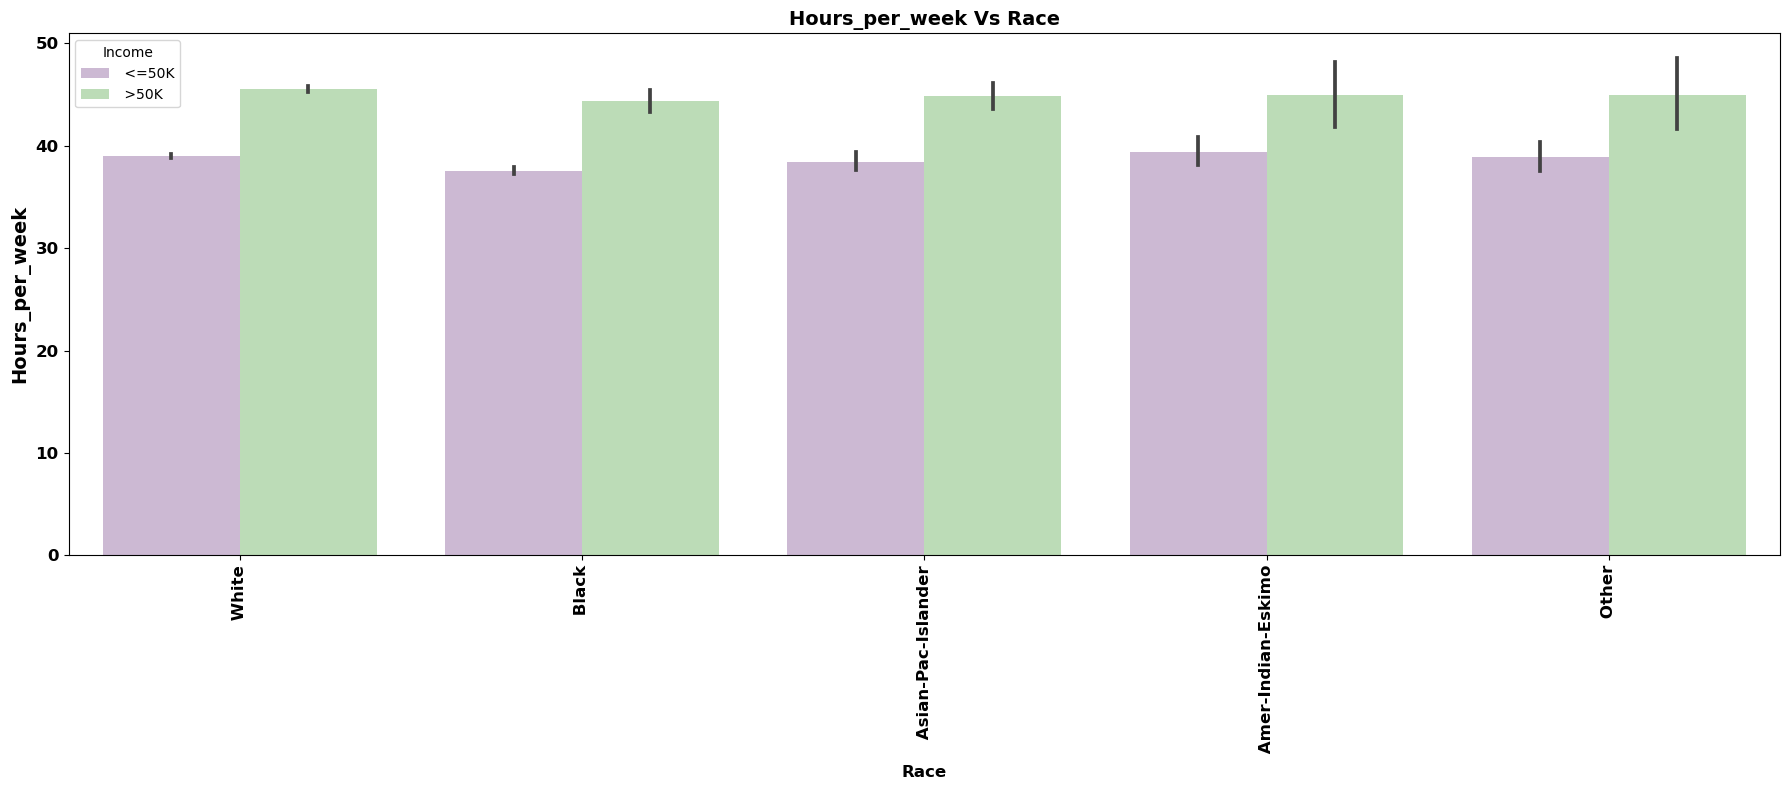

In [65]:
plt.figure(figsize=(18,8))
sns.barplot(y='Hours_per_week',x='Race',data=df,hue='Income', palette='PRGn')
plt.title('Hours_per_week Vs Race',fontsize=14, fontweight='bold')
plt.ylabel('Hours_per_week', fontsize=14,fontweight='bold')
plt.xlabel('Race', fontsize=12,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **people working for more number of hours are earning more income**

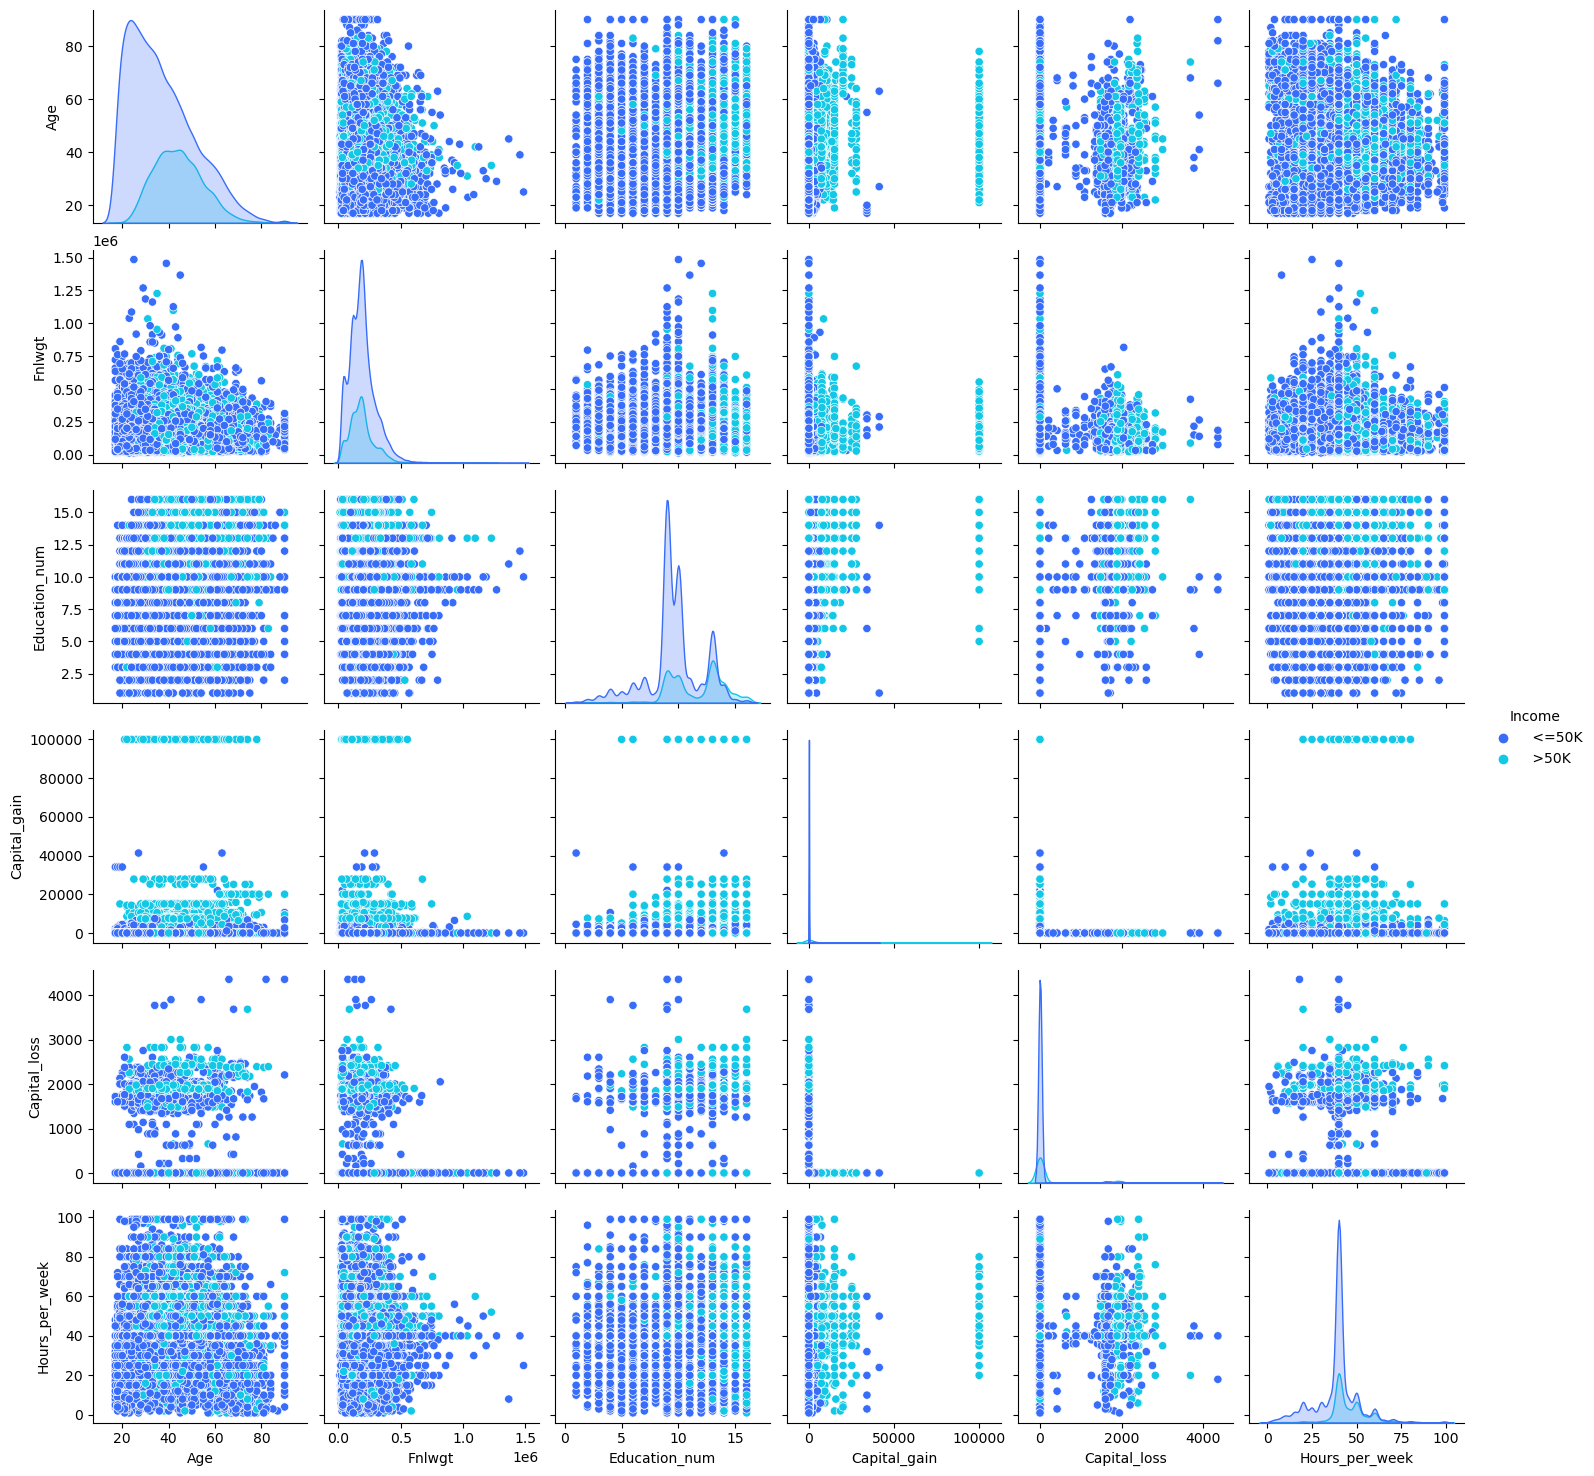

In [66]:
sns.pairplot(df, hue='Income')

# Encoding of categorical features:

In [67]:
df_categorical.columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Income', 'Native_country'],
      dtype='object')

In [68]:
# Using Ordinal Encoder on categorical variable
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()  # creating instance for OrdinalEncoder

for i in df_categorical:
    df[i]=enc.fit_transform(df[i].values.reshape(-1,1))  # Transforming the data using OrdingalEncoder
df.head(5)

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50        5.0   83311        9.0             13             2.0   
1   38        3.0  215646       11.0              9             0.0   
2   53        3.0  234721        1.0              7             2.0   
3   28        3.0  338409        9.0             13             2.0   
4   37        3.0  284582       12.0             14             2.0   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0         3.0           0.0   4.0  1.0             0             0   
1         5.0           1.0   4.0  1.0             0             0   
2         5.0           0.0   2.0  1.0             0             0   
3         9.0           5.0   2.0  0.0             0             0   
4         3.0           5.0   4.0  0.0             0             0   

   Hours_per_week  Native_country  Income  
0              13            38.0     0.0  
1              40            38.0     0.0  
2              40            38.0     0.0  
3              40             4.0     0.0  
4              40            38.0     0.0

# Checking coefficients of correlation (r)

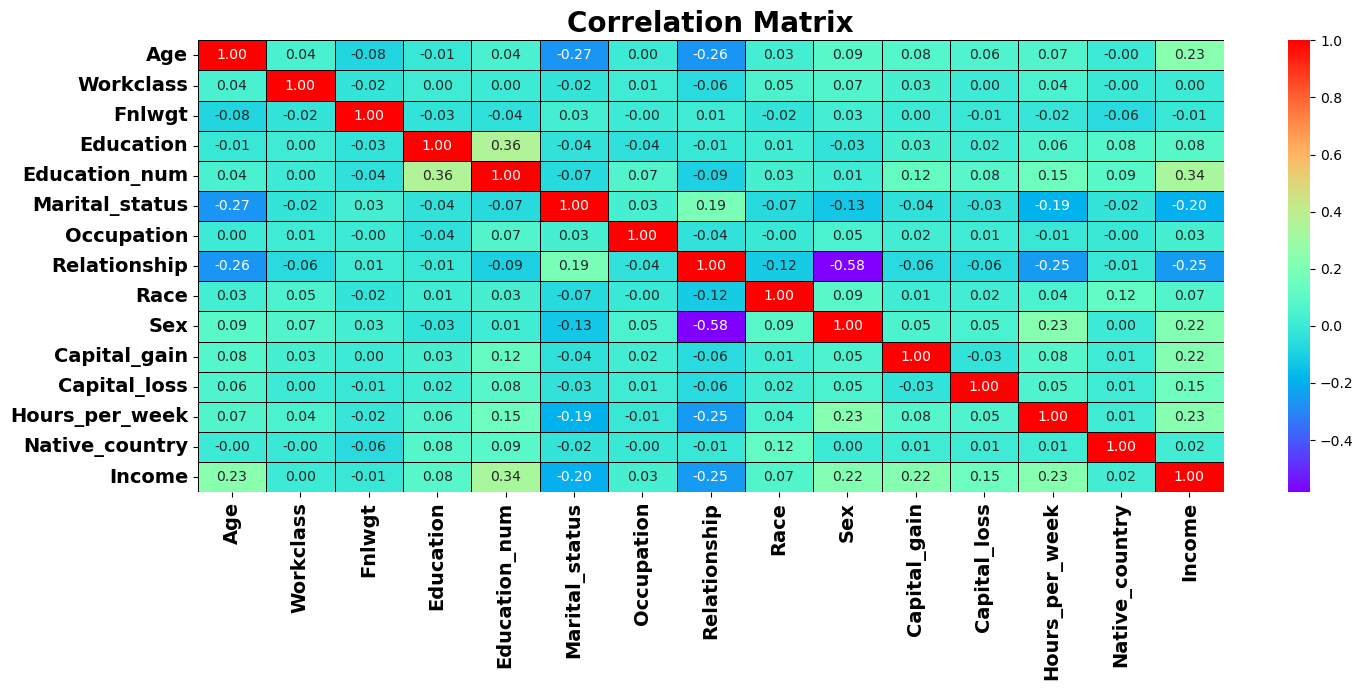

In [69]:
# Checking correlaiton coefficients to know the strength of relationship between variables
corr_r=df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr_r,annot=True,linewidths=0.5,linecolor='black',fmt=".2f",cmap="rainbow")
plt.title("Correlation Matrix",fontsize=20,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=90)
plt.yticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.savefig("correlation_matrix.jpg")
plt.show()

In [70]:
corr_r["Income"].sort_values(ascending=False) 

Income            1.000000
Education_num     0.335299
Age               0.234039
Hours_per_week    0.229659
Capital_gain      0.223340
Sex               0.215984
Capital_loss      0.150498
Education         0.079361
Race              0.071855
Occupation        0.034490
Native_country    0.022858
Workclass         0.002747
Fnlwgt           -0.009521
Marital_status   -0.199187
Relationship     -0.250955
Name: Income, dtype: float64

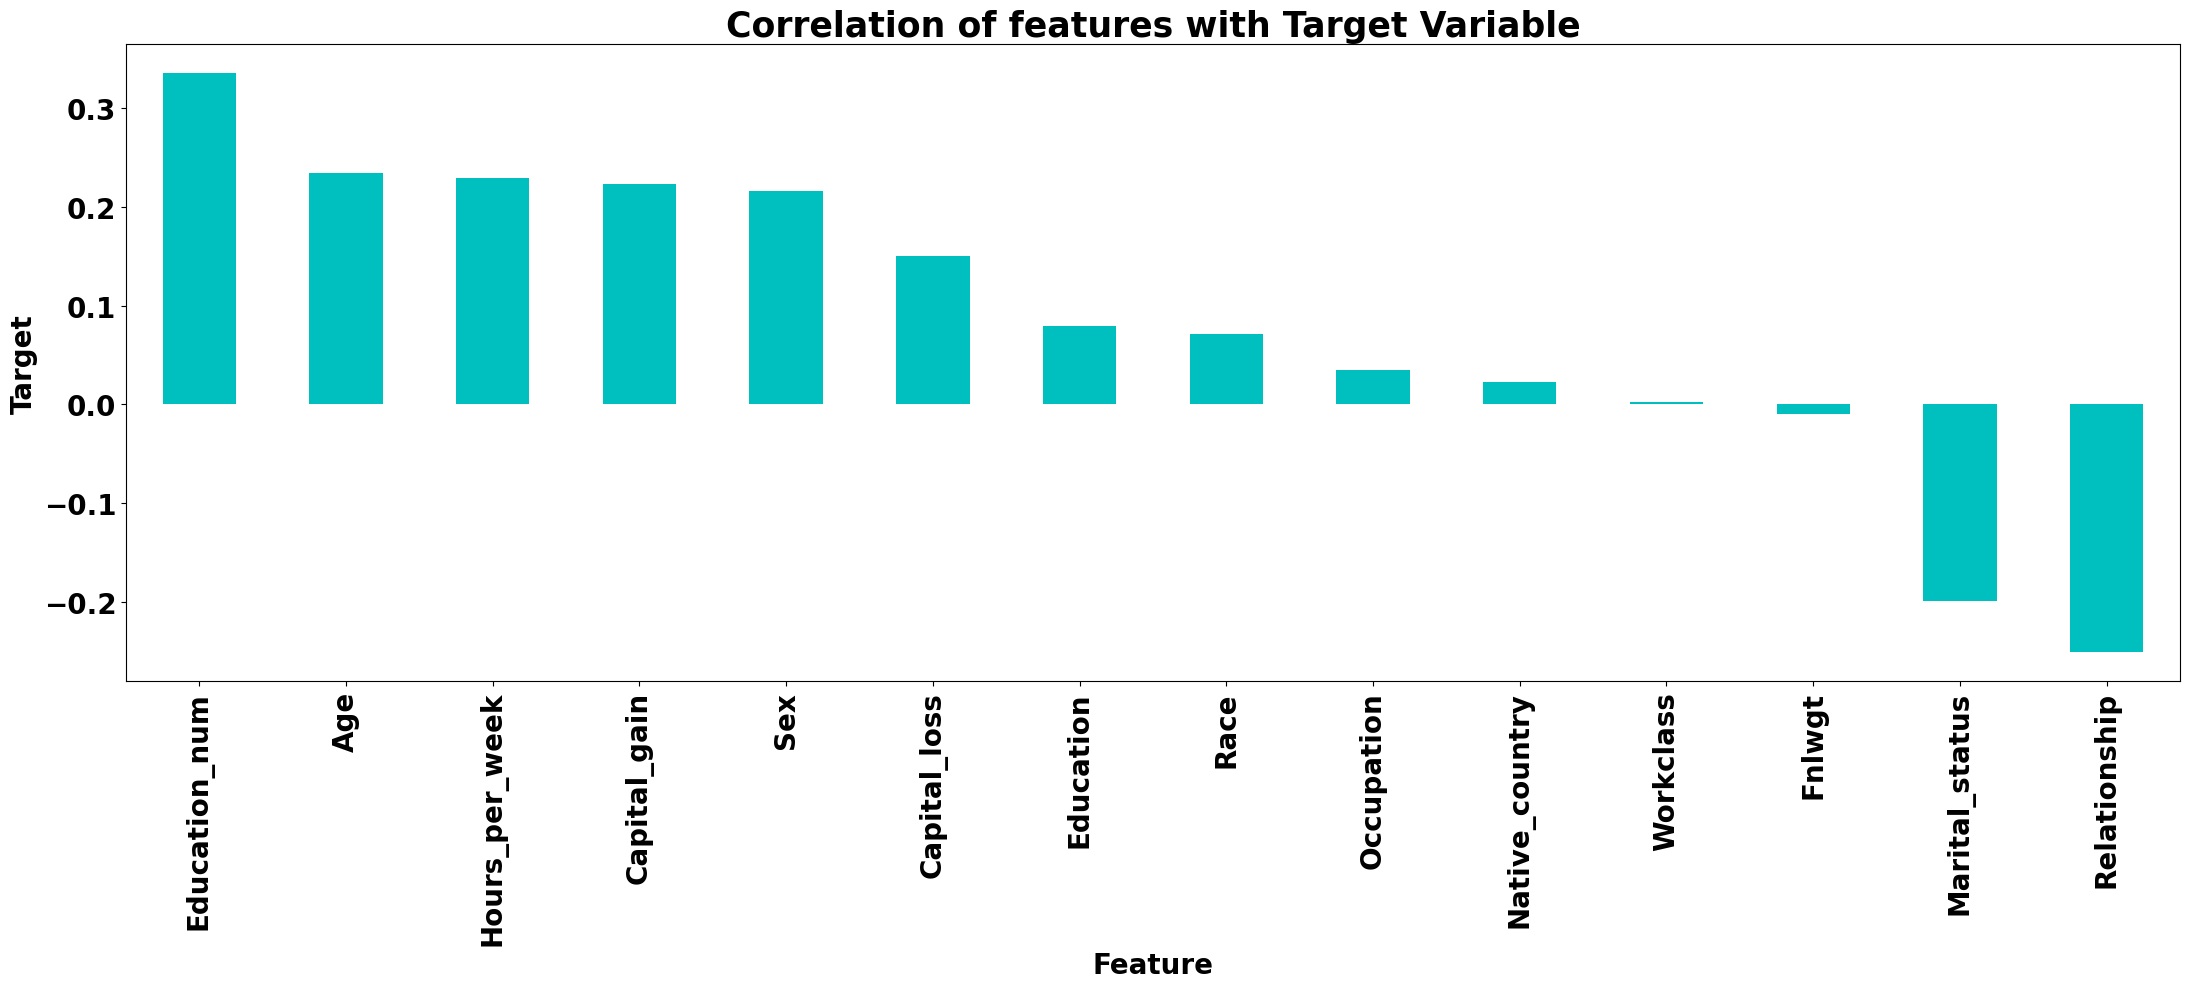

In [71]:
# Plotting the relationship of target variable with other variables in descending order
plt.figure(figsize=(22,10))
corr_r["Income"].sort_values(ascending=False).drop(["Income"]).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=20,fontweight='bold')
plt.ylabel('Target',fontsize=20,fontweight='bold')
plt.title('Correlation of features with Target Variable',fontsize=25,fontweight='bold')
plt.xticks(fontsize=20,fontweight ='bold',rotation=90)
plt.yticks(fontsize=20,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

#### Observations:
- **Workclass and Fnlwgt are very weakly correlated with the target variable**
- **Native_country is weakly correlated with the target variable**
- **most of the columns are having moderate correlation with target variable**
- **I will check feature scores from SelectKBest algorithm with ANOVA F-value and will check if any features have lower score to take futher decisions.**

# Checking top features using SelectKBest algorithm

In [72]:
#sklearn.feature_selection.f_classif
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif            # SelectKBest algorithm with ANOVA F-value

x=df.drop("Income",axis=1)  #independent columns
y=df["Income"]  # Output variable

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
SelectKBest_scores=featureScores.nlargest(100,'Score')  #Top 100 features
SelectKBest_scores.reset_index(drop=True)  # displyaing top 100 features and scores

Specs        Score
0    Education_num  4120.959861
1     Relationship  2186.644675
2              Age  1885.286977
3   Hours_per_week  1811.486632
4     Capital_gain  1708.021444
5              Sex  1591.944711
6   Marital_status  1344.129315
7     Capital_loss   753.959104
8        Education   206.203986
9             Race   168.848540
10      Occupation    38.747732
11  Native_country    17.007549
12          Fnlwgt     2.949442
13       Workclass     0.245588

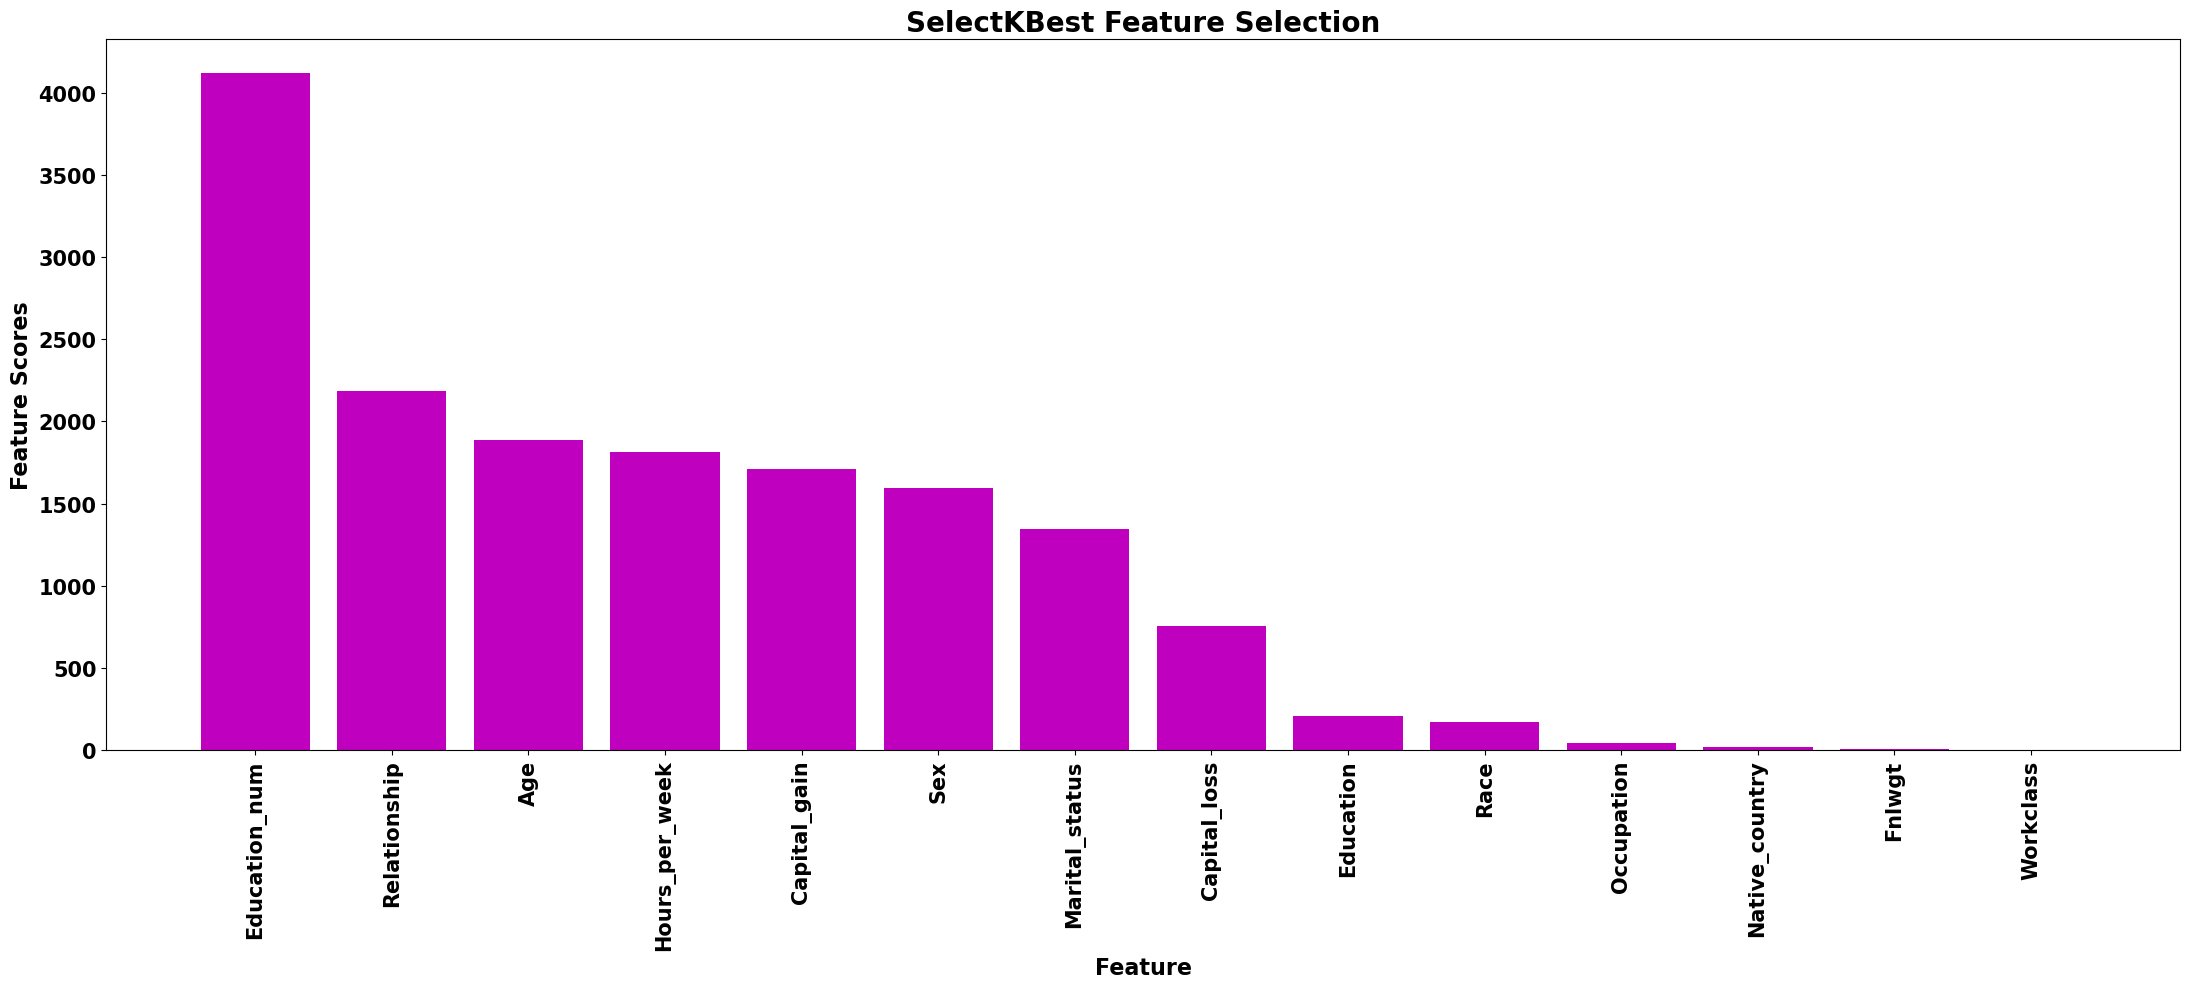

In [73]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Feature Scores",fontsize=16,fontweight='bold')
plt.title("SelectKBest Feature Selection",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

#### Observations:
- **4 Features with least score based on selectKbest algorithm are 'occupation', 'Native_country' ,'Fnlwgt' and 'Workclass**

# Checking top features using Feature Importance - Extra Tree Classifier

In [74]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
dfscores = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
SelectKBest_scores=featureScores.nlargest(100,'Score')  #Top 100 features
SelectKBest_scores.reset_index(drop=True)  # displyaing top 100 features and scores

Specs     Score
0           Fnlwgt  0.167065
1              Age  0.155737
2   Hours_per_week  0.094625
3     Capital_gain  0.089987
4    Education_num  0.088474
5     Relationship  0.087305
6   Marital_status  0.078827
7       Occupation  0.073552
8        Workclass  0.041542
9        Education  0.036264
10    Capital_loss  0.028327
11             Sex  0.028312
12  Native_country  0.015027
13            Race  0.014956

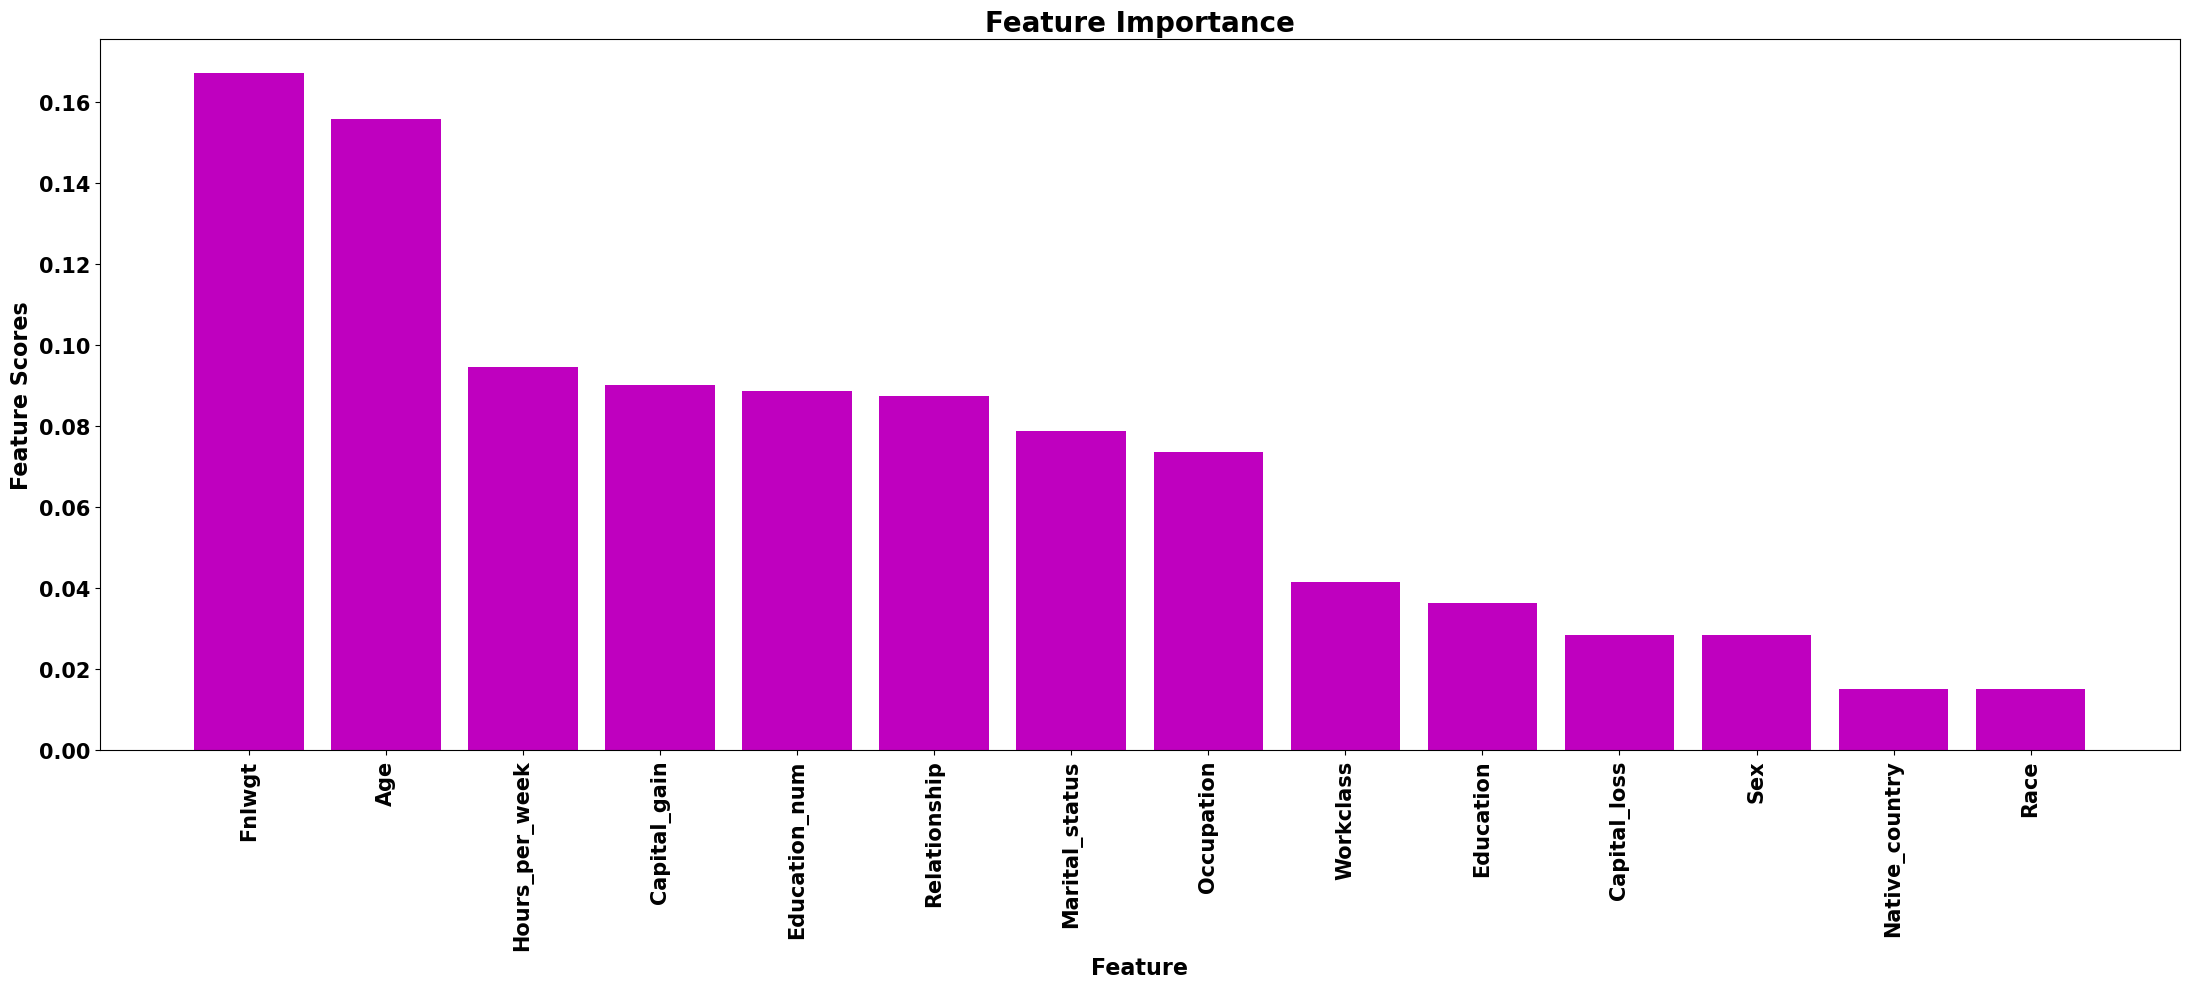

In [75]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Feature Scores",fontsize=16,fontweight='bold')
plt.title("Feature Importance",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

#### Observations:
- **2 Features with least score based on Feature Importance with Extra Tree Classifier are 'Native_country'and 'Race'**
- **As 'Native_country'and 'Race' are the features with lowest scores coming in all checked feature selection techniques, hence dropping these two columns from the dataset**

In [76]:
df.drop(['Native_country','Race'],axis=1, inplace=True)
df.head(3)

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50        5.0   83311        9.0             13             2.0   
1   38        3.0  215646       11.0              9             0.0   
2   53        3.0  234721        1.0              7             2.0   

   Occupation  Relationship  Sex  Capital_gain  Capital_loss  Hours_per_week  \
0         3.0           0.0  1.0             0             0              13   
1         5.0           1.0  1.0             0             0              40   
2         5.0           0.0  1.0             0             0              40   

   Income  
0     0.0  
1     0.0  
2     0.0

In [77]:
df.shape

(32536, 13)

# Checking Outliers

In [78]:
# We check outliers on numerical data
df_outliers=df_numerical.copy()
df_outliers.head(5)

Age  Fnlwgt  Education_num  Capital_gain  Capital_loss  Hours_per_week
0   50   83311             13             0             0              13
1   38  215646              9             0             0              40
2   53  234721              7             0             0              40
3   28  338409             13             0             0              40
4   37  284582             14             0             0              40

In [79]:
df_outliers.shape

(32536, 6)

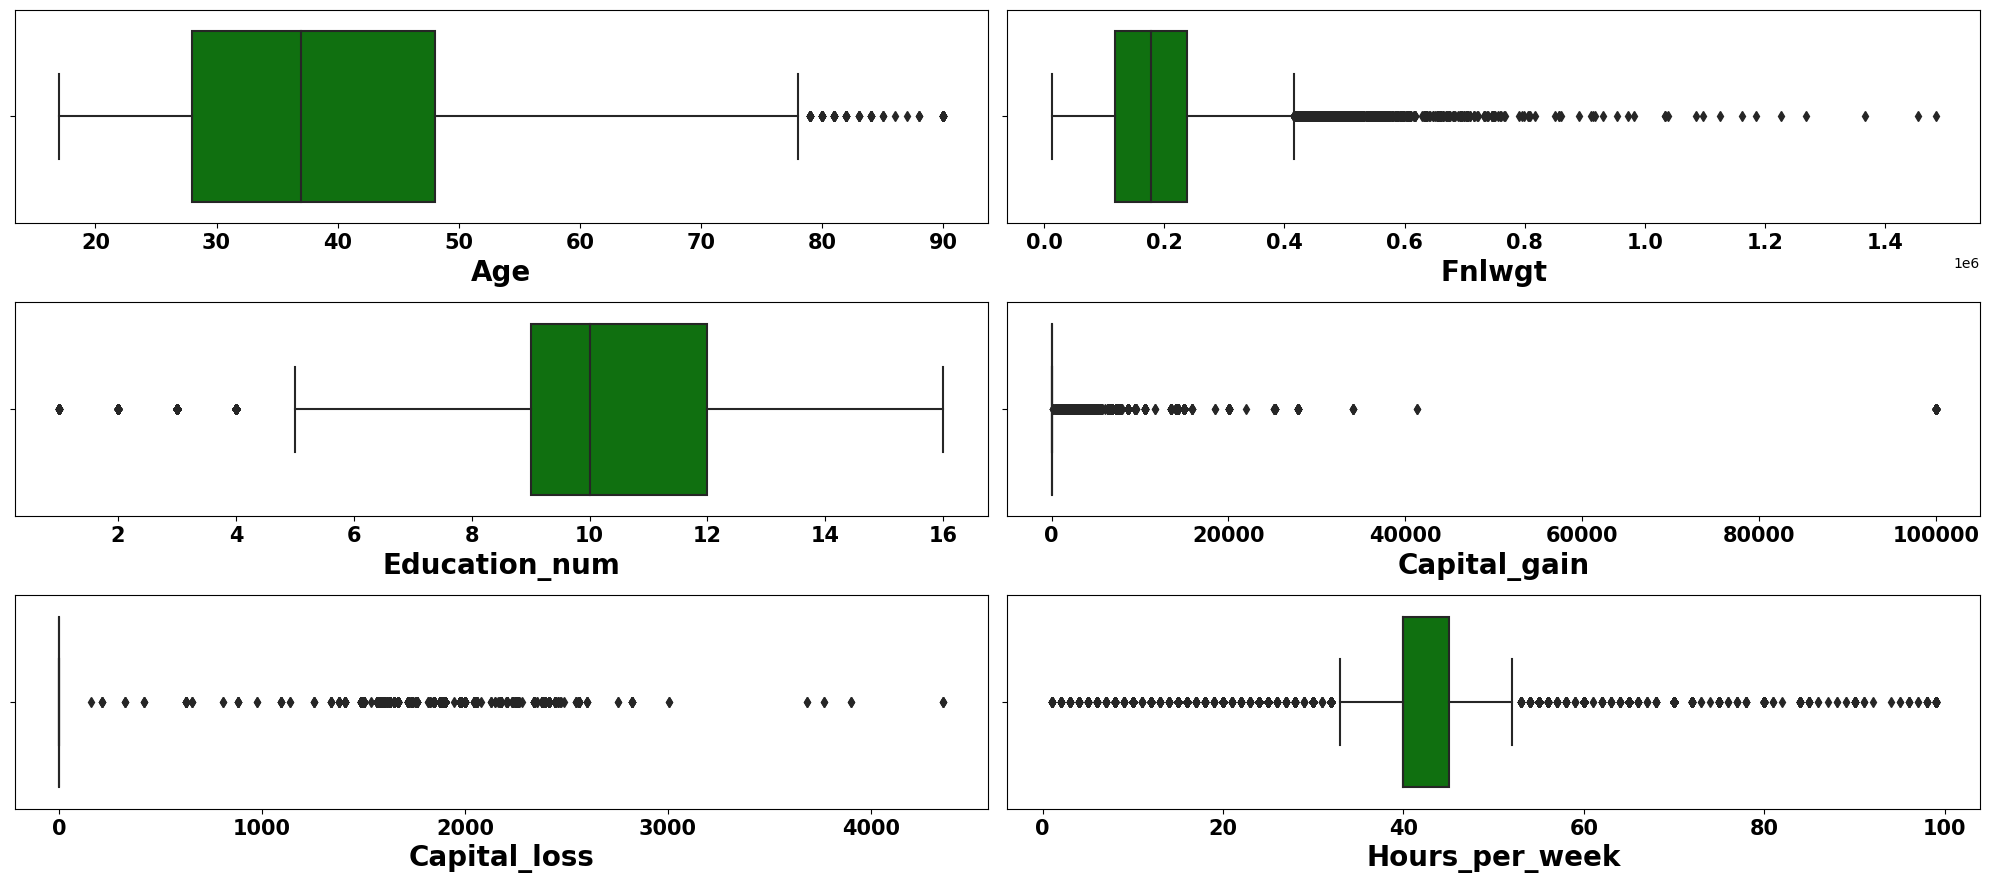

In [80]:
# Checking outliers visually
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers.columns:
    if plotnumber<=20:
        ax=plt.subplot(7,2,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations:
- **Outliers are present in many columns**

# Removing Outliers using z-score method

In [81]:
df_outliers.shape

(32536, 6)

In [82]:
df.shape

(32536, 13)

In [83]:
# Calculating z score & identifying the rows and columns where absolute z score > 3

from scipy.stats import zscore
z=np.abs(zscore(df_outliers))
threshold=3
np.where(z>3)

(array([    9,    22,    27, ..., 32500, 32500, 32506], dtype=int64),
 array([5, 4, 5, ..., 0, 5, 5], dtype=int64))

In [84]:
# Removing the rows in the dataframe where the outliers are present in x features with numerical data
df_1=df[(z<3).all(axis=1)]
df_outliers_del=df_outliers[(z<3).all(axis=1)]

In [85]:
df_1.head(3)

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50        5.0   83311        9.0             13             2.0   
1   38        3.0  215646       11.0              9             0.0   
2   53        3.0  234721        1.0              7             2.0   

   Occupation  Relationship  Sex  Capital_gain  Capital_loss  Hours_per_week  \
0         3.0           0.0  1.0             0             0              13   
1         5.0           1.0  1.0             0             0              40   
2         5.0           0.0  1.0             0             0              40   

   Income  
0     0.0  
1     0.0  
2     0.0

In [86]:
df_outliers_del.head(3)

Age  Fnlwgt  Education_num  Capital_gain  Capital_loss  Hours_per_week
0   50   83311             13             0             0              13
1   38  215646              9             0             0              40
2   53  234721              7             0             0              40

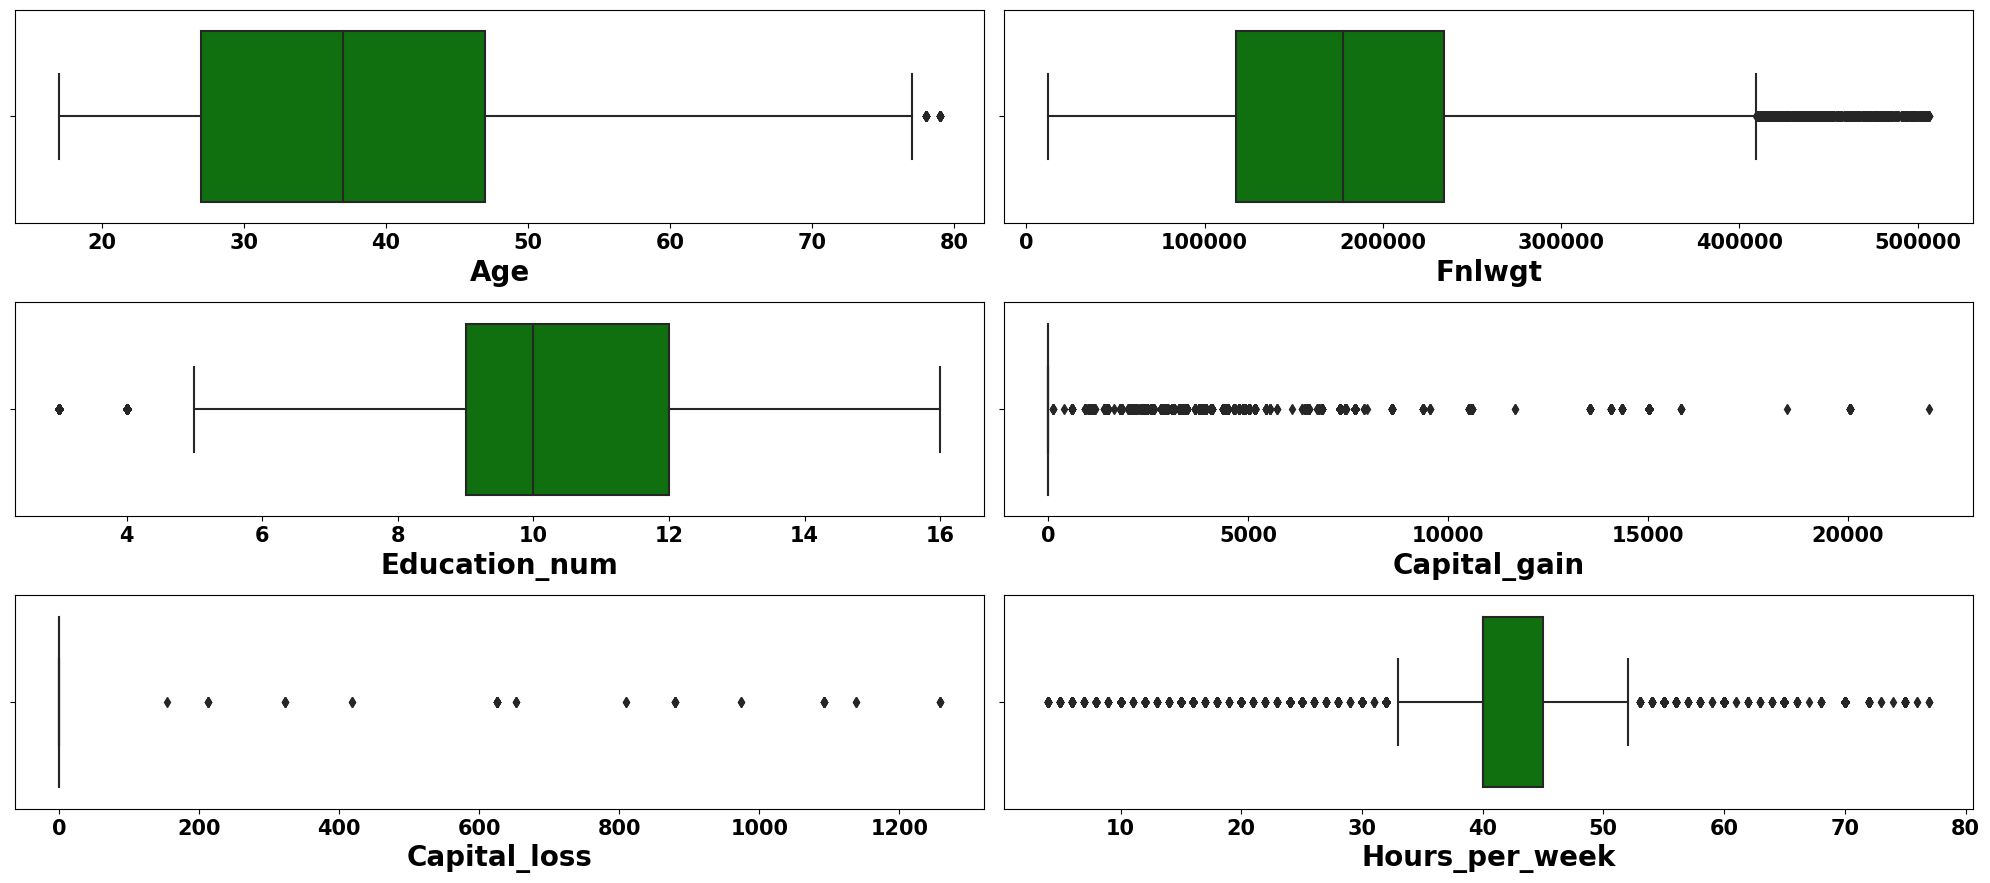

In [87]:
# Checking outliers visually
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers_del.columns:
    if plotnumber<=20:
        ax=plt.subplot(7,2,plotnumber)
        sns.boxplot(df_1[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from the features per z-score threshold**

In [88]:
df_1.shape

(29808, 13)

In [89]:
df.shape

(32536, 13)

In [90]:
# Data loss calculation with z-score method
loss_percent_zscore=round((df.shape[0]-df_1.shape[0])/df.shape[0]*100,1)
loss_percent_zscore

8.4

#### Observations:
- **Data loss with z-score method is 8.4%. Now I will check the dataloss using IQR method as well and will take a call accordingly**

# Removing Outliers using IQR method

In [91]:
# Calculate interquartile range (IQR) for x continuous data
Q1=df_outliers.quantile(0.25)
Q3=df_outliers.quantile(0.75)
IQR=Q3-Q1

# Dataframe with continuous X data after removing outliers
df_outliers_upd = df_outliers[((df_outliers>=(Q1-1.5*IQR)) & (df_outliers<=(Q3+1.5*IQR))).all(axis=1)]

# Removing the rows in both x and y where the outliers are present in x features with continuous data
df_2 = df[((df_outliers>=(Q1-1.5*IQR)) & (df_outliers<=(Q3+1.5*IQR))).all(axis=1)]

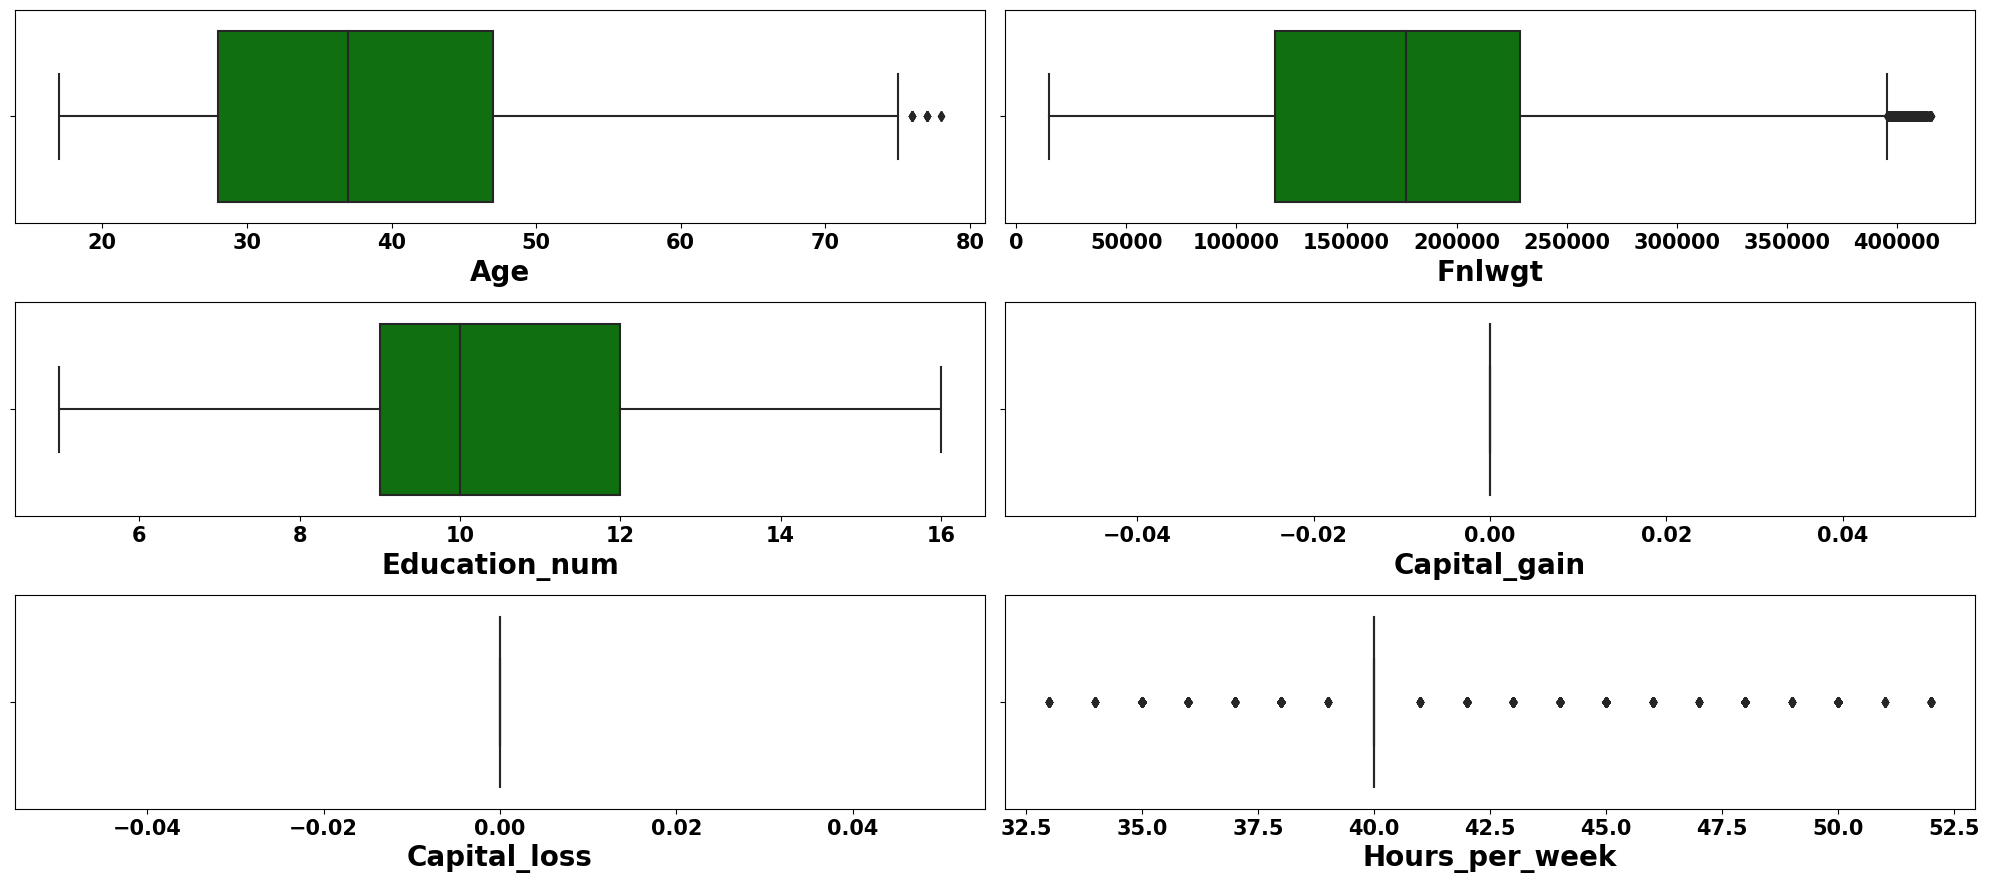

In [92]:
# Checking outliers visually after removing outliers using IQR method
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers_upd.columns:
    if plotnumber<=20:
        ax=plt.subplot(7,2,plotnumber)
        sns.boxplot(df_2[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from all features based on IQR range**

In [93]:
df_2.shape

(18983, 13)

In [94]:
# Data Loss Calculation with IQR
loss_percent_IQR=round((df.shape[0]-df_2.shape[0])/df.shape[0]*100,1)
display(loss_percent_IQR)

41.7

#### Observations: 
- **Data loss with IQR is 41.7% which is higher than data loss with z-score (8.4%). Data loss with z-score method is < 10% which is acceptable hence considering x & y data after removing outliers using zscore method for model building**

In [95]:
x=df_1.drop(['Income'],axis=1)
y=df_1['Income'].copy()
df=df_1

In [96]:
df=df_1.copy()

In [97]:
df.head(3)

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50        5.0   83311        9.0             13             2.0   
1   38        3.0  215646       11.0              9             0.0   
2   53        3.0  234721        1.0              7             2.0   

   Occupation  Relationship  Sex  Capital_gain  Capital_loss  Hours_per_week  \
0         3.0           0.0  1.0             0             0              13   
1         5.0           1.0  1.0             0             0              40   
2         5.0           0.0  1.0             0             0              40   

   Income  
0     0.0  
1     0.0  
2     0.0

# Checking Multicollinearity between features using variance_inflation_factor (VIF)

In [98]:
# We calculate VIF only for numerical data as the variance is applicable only for numerical data

In [99]:
# Identifying the columns with numerical data after dropping the columns identified in previous steps
df_numerical.shape

(32536, 6)

In [100]:
# Looping to get the list of numerical variables left in the dataset after dropping columns based on previous steps
df_num_filter=[]
for i in df_numerical.columns:
    for j in df.columns:
        if i==j:
            df_num_filter.append(i)
print(len(df_num_filter))
display(df_num_filter)

6


['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [101]:
df_vif=df[df_num_filter]
df_vif.head(5)

Age  Fnlwgt  Education_num  Capital_gain  Capital_loss  Hours_per_week
0   50   83311             13             0             0              13
1   38  215646              9             0             0              40
2   53  234721              7             0             0              40
3   28  338409             13             0             0              40
4   37  284582             14             0             0              40

In [102]:
# Checking multicollinearity using VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_vif[list(df_vif.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF          Column
2  12.106980   Education_num
5  11.374005  Hours_per_week
0   7.680061             Age
1   4.188762          Fnlwgt
3   1.082613    Capital_gain
4   1.002008    Capital_loss

#### Observations: 
- **Typically we remove columns with VIF values > 10 which indicates strong multicollinearity of the features***
- **Multicollinearity can be addressed with either removing columns with VIF > 10 or using PCA**
- **As there is one feature with VIF values > 10, I will drop Education_num feature**

In [103]:
df_vif.drop(['Education_num'],axis=1,inplace=True)

In [104]:
df.drop(['Education_num'],axis=1,inplace=True)

In [105]:
# Rechecking VIF after dropping the column

X = df_vif[list(df_vif.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF          Column
4  7.723530  Hours_per_week
0  6.665786             Age
1  3.926293          Fnlwgt
2  1.078362    Capital_gain
3  1.001962    Capital_loss

### Observations:
- **VIF score is reduced (<10) after dropping "Education_num" column**
- **As VIF<10, multi-collinearity is addressed**

# Skewness Check

In [106]:
df_outliers_del.drop(['Education_num'],axis=1,inplace=True)

In [107]:
df_outliers_del.shape

(29808, 5)

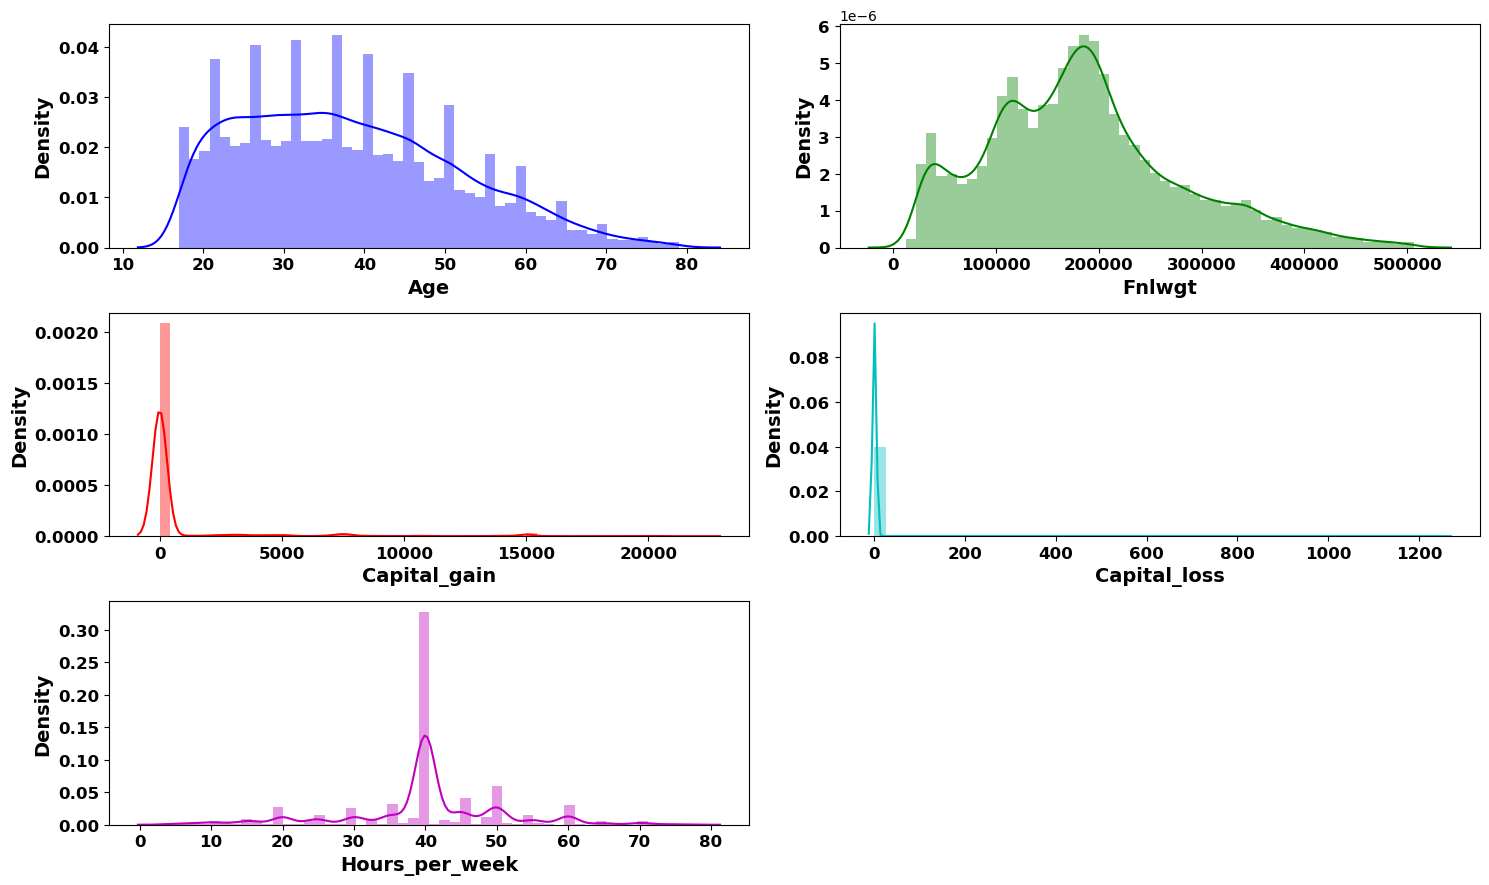

In [108]:
# Skewness of features with numerical data. We don't check skewness on categorical data and in target variable.
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_outliers_del.columns:
    if plotnum<=20:
        plt.subplot(7,2,plotnum)
        sns.distplot(df[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observatins:
- **All the features are having skewed data hence I need to reduce the skewness of all these features to get better model performance**

In [109]:
df_outliers_del.skew().sort_values(ascending=False) 

Capital_loss      29.651762
Capital_gain       4.941892
Fnlwgt             0.635160
Age                0.491125
Hours_per_week    -0.353124
dtype: float64

#### Observations: 
- **Typically "-0.5 to 0.5" range is fairly symmetrical. In this case, there are multiple variables beyond this range**
- **I will apply various methods to reduce skewness and will consider the one with lowest skewness**

# Transforming data to reduce skewness

In [110]:
# Method 1: Using PowerTransformer
#checking skewness on X features with continuous data 
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_pwr=pt.fit_transform(df_outliers_del)
x_tra=pd.DataFrame(data=x_pwr,columns=df_outliers_del.columns)
# Checking skeweness and arranging the values in descending order
x_tra.skew().sort_values(ascending=False)

Capital_loss      24.860889
Capital_gain       3.072803
Hours_per_week     0.107978
Age               -0.017077
Fnlwgt            -0.034773
dtype: float64

#### Observations:
- **Skewness is reduced using powerTransformer method**
- **Capital_gain and Capital_loss are numeric variable with lot of zero and high number. So skewness exist in them.we can adress this by using scaling**

In [111]:
# Method2: Using Quantile transformer
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
x_qt=qt.fit_transform(df_outliers_del)
x_qtr=pd.DataFrame(data=x_qt,columns=df_outliers_del.columns)
x_qtr.skew().sort_values(ascending=False)

Capital_loss      24.860899
Capital_gain       3.076342
Hours_per_week     0.022141
Fnlwgt             0.000018
Age               -0.001669
dtype: float64

#### Observation:
- **skewness is reduced with both the transformation techniques.Considering quantile transformer as it gives low skewness compared to power transformer** 

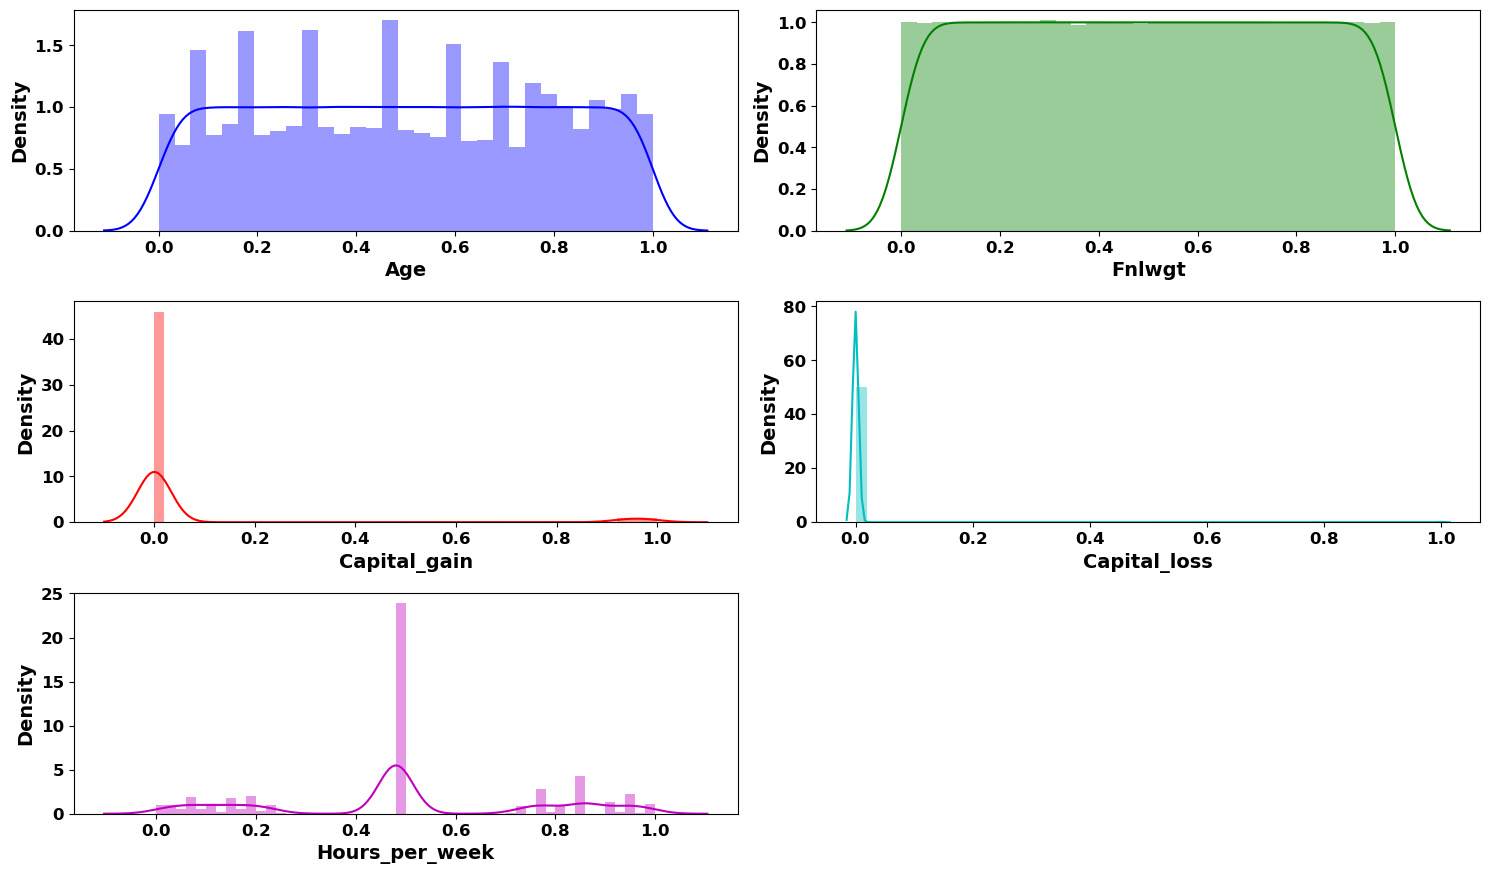

In [112]:
# Checking skewness of the data after transformation
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('Dark2')
plotnum=1
for col in x_qtr:
    if plotnum<=20:
        plt.subplot(7,2,plotnum)
        sns.distplot(x_qtr[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observations:
- **As the skewness is least using "Quantile transformer" for most of the features, I am using transformed x data from "Quantile transformer" for model building**   

### Grouping both transformed numerical and categorical data 

In [113]:
x=df.drop(['Income'],axis=1)
y=df['Income'].copy()

In [114]:
x.shape

(29808, 11)

In [115]:
x.head(3)

Age  Workclass  Fnlwgt  Education  Marital_status  Occupation  \
0   50        5.0   83311        9.0             2.0         3.0   
1   38        3.0  215646       11.0             0.0         5.0   
2   53        3.0  234721        1.0             2.0         5.0   

   Relationship  Sex  Capital_gain  Capital_loss  Hours_per_week  
0           0.0  1.0             0             0              13  
1           1.0  1.0             0             0              40  
2           0.0  1.0             0             0              40

In [116]:
new_x=x.reset_index(drop=True)  # reset the index of x data

In [117]:
new_x.head() # entire x data including both numerical and categorical features after resetting the index

Age  Workclass  Fnlwgt  Education  Marital_status  Occupation  \
0   50        5.0   83311        9.0             2.0         3.0   
1   38        3.0  215646       11.0             0.0         5.0   
2   53        3.0  234721        1.0             2.0         5.0   
3   28        3.0  338409        9.0             2.0         9.0   
4   37        3.0  284582       12.0             2.0         3.0   

   Relationship  Sex  Capital_gain  Capital_loss  Hours_per_week  
0           0.0  1.0             0             0              13  
1           1.0  1.0             0             0              40  
2           0.0  1.0             0             0              40  
3           5.0  0.0             0             0              40  
4           5.0  0.0             0             0              40

In [118]:
x_qtr.head() # Transformed numerical data

Age    Fnlwgt  Capital_gain  Capital_loss  Hours_per_week
0  0.799800  0.133355           0.0           0.0        0.026026
1  0.535536  0.693050           0.0           0.0        0.480480
2  0.848348  0.751302           0.0           0.0        0.480480
3  0.269269  0.920537           0.0           0.0        0.480480
4  0.510010  0.851591           0.0           0.0        0.480480

In [119]:
#here transformed numerical data is assigned to original data set
for i in x_qtr.columns:
    new_x[i]=x_qtr[i]

In [120]:
new_x.head()  # Grouped x data with tranformed numerical data and categorical data

Age  Workclass    Fnlwgt  Education  Marital_status  Occupation  \
0  0.799800        5.0  0.133355        9.0             2.0         3.0   
1  0.535536        3.0  0.693050       11.0             0.0         5.0   
2  0.848348        3.0  0.751302        1.0             2.0         5.0   
3  0.269269        3.0  0.920537        9.0             2.0         9.0   
4  0.510010        3.0  0.851591       12.0             2.0         3.0   

   Relationship  Sex  Capital_gain  Capital_loss  Hours_per_week  
0           0.0  1.0           0.0           0.0        0.026026  
1           1.0  1.0           0.0           0.0        0.480480  
2           0.0  1.0           0.0           0.0        0.480480  
3           5.0  0.0           0.0           0.0        0.480480  
4           5.0  0.0           0.0           0.0        0.480480

In [121]:
new_x.shape

(29808, 11)

In [122]:
new_x.isnull().sum().sum()  # checking for null values if any due to transformation and grouping

0

# Scaling data

In [123]:
# Applied standard scaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_scaled=sc.fit_transform(new_x)
x=pd.DataFrame(data=x_scaled,columns=new_x.columns)
x.head(5)

Age  Workclass    Fnlwgt  Education  Marital_status  Occupation  \
0  1.038509   1.732583 -1.270053  -0.340099       -0.410260   -0.780453   
1  0.123303  -0.078182  0.668746   0.176444       -1.730676   -0.278831   
2  1.206644  -0.078182  0.870531  -2.406268       -0.410260   -0.278831   
3 -0.798837  -0.078182  1.456768  -0.340099       -0.410260    0.724414   
4  0.034902  -0.078182  1.217936   0.434715       -0.410260   -0.780453   

   Relationship       Sex  Capital_gain  Capital_loss  Hours_per_week  
0     -0.919032  0.716254      -0.29669     -0.040161       -1.740595  
1     -0.297940  0.716254      -0.29669     -0.040161       -0.072018  
2     -0.919032  0.716254      -0.29669     -0.040161       -0.072018  
3      2.186429 -1.396153      -0.29669     -0.040161       -0.072018  
4      2.186429 -1.396153      -0.29669     -0.040161       -0.072018

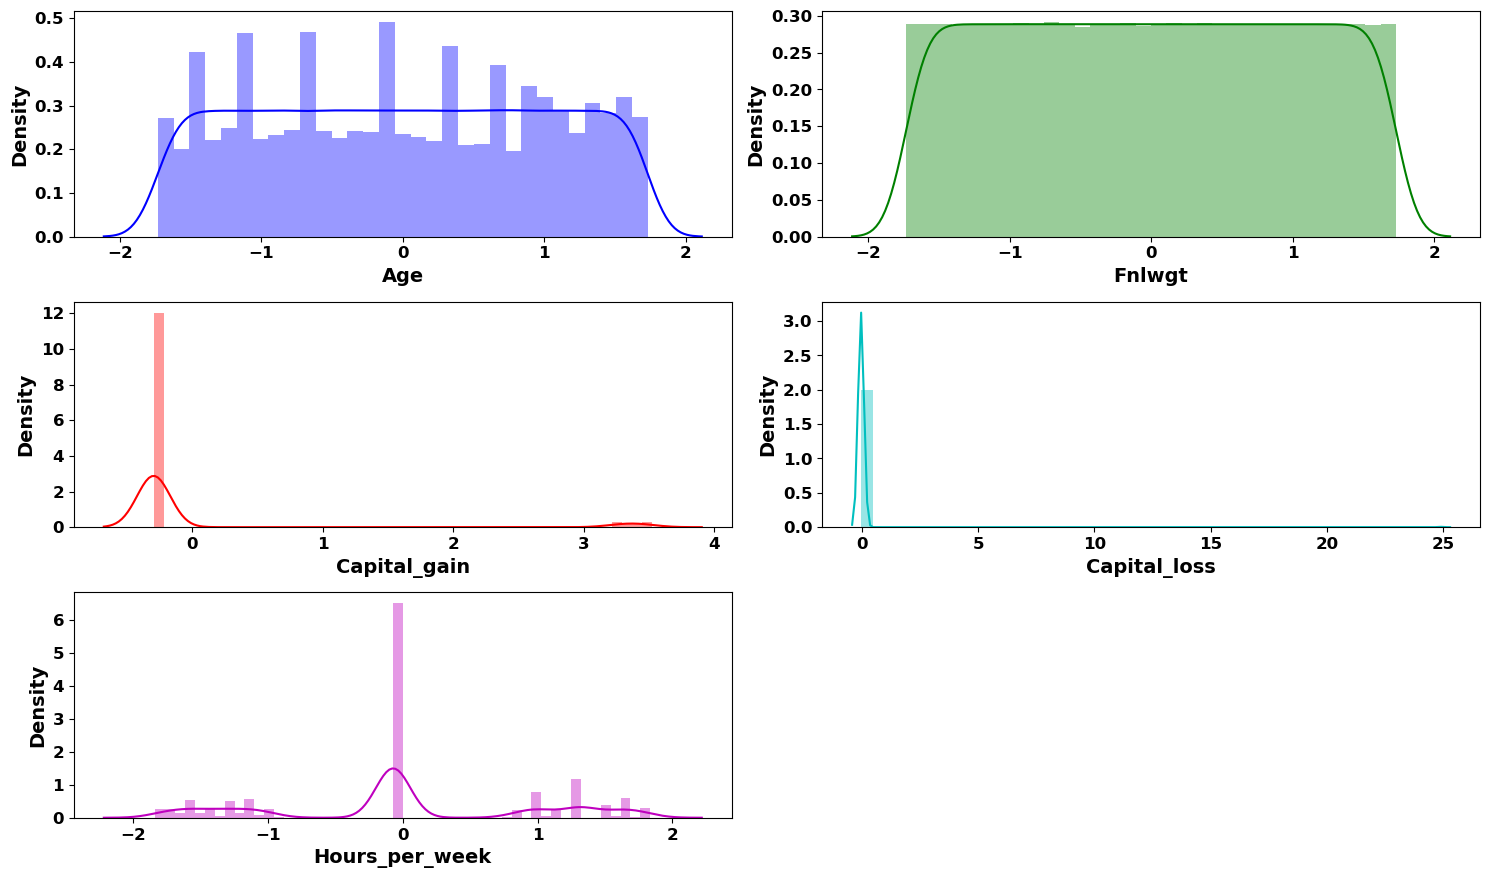

In [124]:
# Visually checking the distribution plots after scaling the data
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('rainbow_r')
plotnum=1
for col in x_qtr:
    if plotnum<=20:
        plt.subplot(7,2,plotnum)
        sns.distplot(x[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

# SMOTE for classfication

- **As the target variable classes are imbalanced, used the random oversampling technique "SMOTE" for balancing the classes in target variable**

In [125]:
# Checking the value count of target column
y.value_counts()

0.0    23156
1.0     6652
Name: Income, dtype: int64

In [126]:
x.shape

(29808, 11)

In [127]:
y.shape

(29808,)

In [128]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [129]:
# Checking the value count of target column
y.value_counts()

0.0    23156
1.0    23156
Name: Income, dtype: int64

0.0    23156
1.0    23156
Name: Income, dtype: int64


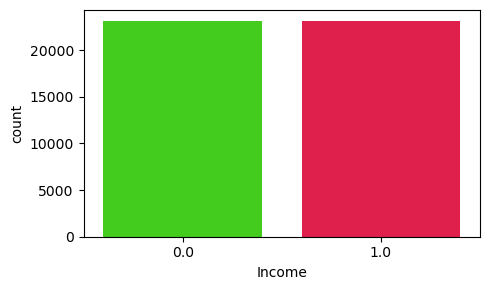

In [130]:
# Visualization of Target Variable
plt.figure(figsize=(5,3))
print(y.value_counts())
sns.countplot(y,palette='prism')
plt.show()

#### Observations: 
- **Classes are balanced in the target column**

#### EDA part is completed and I will proceed with Model Building

# Model Building - Binary Classification

In [131]:
# As target variable has two classes, I will use binary classification model and starts with LogisticRegression

### Finding Best Random State

Best random state: 429, Best accuracy: 74.19


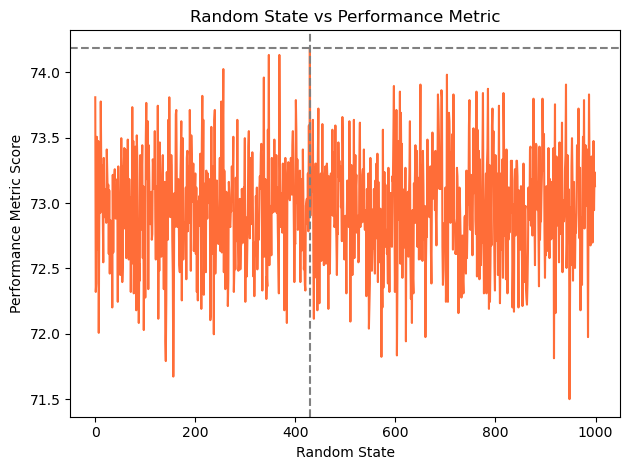

In [132]:
# Defining the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix, classification_report, roc_curve


lr=LogisticRegression()  # Defining instance for logisticregression

# Initialize empty lists for storing the random state values and the performance metric scores
random_states = []
scores = []

# Split the data into train and test sets for different random states
best_score = 0
best_random_state = 0

for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i,stratify=y)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    score = accuracy_score(y_test, y_pred)

    # Append the random state value and the performance metric score to the lists
    random_states.append(i)
    scores.append(score*100)
    if score > best_score:
        best_score = score
        best_random_state = i

print(f"Best random state: {best_random_state}, Best accuracy: {round((best_score*100),2)}")

# Plot the line chart
plt.plot(random_states, scores)
plt.xlabel('Random State')
plt.ylabel('Performance Metric Score')
plt.title('Random State vs Performance Metric')
# Add dashed lines
plt.axhline(y=max(scores), linestyle='--', color='gray')
plt.axvline(best_random_state, linestyle='--', color='gray')
plt.show()

In [133]:
# Best Random State
BRS=best_random_state
BRS

429

#### Observations: 
- **From the above plot, best random state is 429 where testing accuracy is high. This random state will be used for buidling all classification models**

In [134]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=BRS,stratify=y)

In [135]:
# Training the model and checking  accuracy score with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
y_prob = lr.predict_proba(x_test)

accu_score=accuracy_score(y_test,pred_test)
print("Accuracy Score:",round(accuracy_score(y_test,pred_test)*100,1))
f1_Score_sel=f1_score(y_test,pred_test, average='weighted')
print("F1 Score:",round(f1_score(y_test,pred_test, average='weighted')*100,1))
precision_score_sel=precision_score(y_test,pred_test, average='weighted')
print("Precision Score:",round(precision_score(y_test,pred_test, average='weighted')*100,1))
recall_score_sel=recall_score(y_test,pred_test, average='weighted')
print("Recall Score:",round(recall_score(y_test,pred_test, average='weighted')*100,1))
roc_auc_score_sel=roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')
print("ROC AUC Score:",round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1))
pr_auc = average_precision_score(y_test, y_prob[:, 1], average='weighted')
print("AUC PR Score:",round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1))

Accuracy Score: 73.1
F1 Score: 73.1
Precision Score: 73.2
Recall Score: 73.1
ROC AUC Score: 80.8
AUC PR Score: 78.3


In [136]:
print(classification_report(y_test,pred_test))  # Printing classificatin report

              precision    recall  f1-score   support

         0.0       0.75      0.70      0.72      4631
         1.0       0.72      0.76      0.74      4632

    accuracy                           0.73      9263
   macro avg       0.73      0.73      0.73      9263
weighted avg       0.73      0.73      0.73      9263



In [137]:
print(confusion_matrix(y_test,pred_test))  # printing confusion matrix

[[3248 1383]
 [1105 3527]]


# Cross Validation for Logistic Regression

- **Finding the best no. folds where the delta is least between cross validation and model scores.**

Model score: 73.1405
CV score with 2 folds: 72.9595
CV score with 3 folds: 72.9638
CV score with 4 folds: 72.9573
CV score with 5 folds: 72.9811
CV score with 6 folds: 72.9725
CV score with 7 folds: 72.9984
CV score with 8 folds: 72.9984
CV score with 9 folds: 72.9682
CV score with 10 folds: 72.9876
Best number of folds: 8


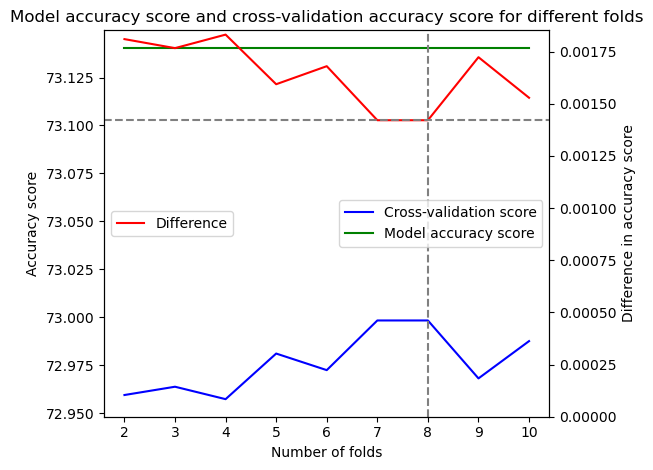

In [138]:
from sklearn.model_selection  import cross_val_score

pred_lr=lr.predict(x_test)
lss=accuracy_score(y_test,pred_lr)

# Finding the optimized folds from Logistic Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

folds_range = range(2, 11)

for j in folds_range:
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))

# Find the best number of folds based on smallest difference between cross-validation score and model score

best_n_folds = folds_range[np.argmin(Difference)]

# Print the results
print("Model score: {:.4f}".format(lss*100))
for n_folds, cv_score in zip(folds_range, CV_Score):
    print("CV score with {} folds: {:.4f}".format(n_folds, cv_score))
print("Best number of folds: {}".format(best_n_folds))

# plot cross-validation scores and model scores for each number of folds
fig, ax1 = plt.subplots()
ax1.plot(No_of_Folds, CV_Score, label='Cross-validation score', color='blue')
ax1.plot(No_of_Folds, Model_Score, label='Model accuracy score', color='green')
ax1.set_xlabel('Number of folds')
ax1.set_ylabel('Accuracy score')

ax2 = ax1.twinx()
ax2.plot(No_of_Folds, Difference, label='Difference', color='red')
ax2.set_ylabel('Difference in accuracy score')
ax2.set_ylim(bottom=0)

# Add dashed lines
ax1.axvline(best_n_folds, linestyle='--', color='gray')
ax2.axhline(min(Difference), linestyle='--', color='gray')

plt.title('Model accuracy score and cross-validation accuracy score for different folds')
ax1.legend(loc='center right')
ax2.legend(loc='center')
plt.legend(['Difference'], loc='center left')
plt.show()

In [139]:
# Getting the best no. of folds where the least difference between cross validation score and model score
BCV=best_n_folds
BCV

8

#### Observations: 
- **Considered the no. folds where the delta is least between cross validation and model scores. In this case, selected CV=8**

In [140]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore = cross_val_score(lr, x, y, cv=BCV)
lsscore_selected = lsscore.mean()

print("CV accuracy scores for each fold are: ", lsscore*100)
print("Mean CV accuracy score:", round(lsscore_selected*100,1))
print("Model accuracy score:", round(lss*100,1))
print("Difference in Accuracy Scores:", round(lss-lsscore_selected,5))

f1_Score_sel=f1_score(y_test,pred_test, average='weighted')
print("F1 Score:",round(f1_score(y_test,pred_test, average='weighted')*100,1))
precision_score_sel=precision_score(y_test,pred_test, average='weighted')
print("Precision Score:",round(precision_score(y_test,pred_test, average='weighted')*100,1))
recall_score_sel=recall_score(y_test,pred_test, average='weighted')
print("Recall Score:",round(recall_score(y_test,pred_test, average='weighted')*100,1))
roc_auc_score_sel=roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')
print("ROC AUC Score:",round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1))
pr_auc = average_precision_score(y_test, y_prob[:, 1], average='weighted')
print("AUC PR Score:",round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1))

CV accuracy scores for each fold are:  [71.99861807 73.17325963 72.63776127 72.53411643 73.48419416 73.12143721
 73.5014683  73.53601658]
Mean CV accuracy score: 73.0
Model accuracy score: 73.1
Difference in Accuracy Scores: 0.00142
F1 Score: 73.1
Precision Score: 73.2
Recall Score: 73.1
ROC AUC Score: 80.8
AUC PR Score: 78.3


# Other Classification Algorithms

In [141]:
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier

# Defining the list with all Algorithms

models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier(loss='log')),
        ('SVC()',SVC(probability=True)),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier())]

# Defining empty lists
Model=[lr]
CV_Score=[round(lsscore_selected*100,1)]
Model_Score=[round(lss*100,1)]
Difference=[abs(lss-lsscore_selected)]
F1_Scores=[round(f1_Score_sel*100,1)]
precision_scores=[round(precision_score_sel*100,1)]
recall_scores=[round(recall_score_sel*100,1)]
roc_auc_scores=[round(roc_auc_score_sel*100,1)]
pr_auc_scores=[round(pr_auc*100,1)]

# Loop for all algorithms to train the model and for the cross validation
for model in models:    
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(round(accuracy_score(y_test,pred_test)*100,1))  # Appending "Accuracy score" to the list
    F1_Scores.append(round(f1_score(y_test,pred_test, average='weighted')*100,1))  # Appending "F1 score" to the list
    precision_scores.append(round(precision_score(y_test,pred_test, average='weighted')*100,1))  # Appending "precision score" to the list
    recall_scores.append(round(recall_score(y_test,pred_test, average='weighted')*100,1))  # Appending "recall score" to the list
    
    y_prob = model[1].predict_proba(x_test)
    roc_auc_scores.append(round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1))  # Appending "roc auc score" to the list
    pr_auc_scores.append(round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1))  # Appending "auc pr score" to the list
    
    print('\n')
    print('\033[1m'+'Metrics for Model:', model[0], ':'+'\033[0m\n')
    print("Accuracy Score:", round(accuracy_score(y_test,pred_test)*100,1))               # Printing "accuracy_score"
    print("F1 Score:",round(f1_score(y_test,pred_test, average='weighted')*100,1))        # Printing "f1_score"
    print("Precision Score:",round(precision_score(y_test,pred_test, average='weighted')*100,1)) # Printing "precision_score"
    print("Recall Score:",round(recall_score(y_test,pred_test, average='weighted')*100,1))  # Printing "recall_score"
    print("ROC AUC Score:",round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1)) # Printing "roc auc_score"
    print("AUC PR Score:",round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1)) # Printing "auc_pr_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # Printing "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            # Printing "classification_report"
    print('-'*80)    

    cvscore=cross_val_score(model[1],x,y,cv=BCV)               # Cross Validation score calculation for all folds
    score = cvscore.mean()                                     # Cross Validation mean score calculation      
    
    print('\033[1m'+'Cross Validation Score for Model:', model[0], ':'+'\033[0m\n')
    print("CV accuracy scores for each fold are: ", cvscore*100)
    print("Mean CV accuracy score:", round(score*100,1))
    print('\n')
    print('='*80)
    
    CV_Score.append(round(score*100,1))                                # Appending "cross validation score" to the list
    Difference.append(abs(accuracy_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences

# Create a Pandas DataFrame to display the scores for each model
scores_df = pd.DataFrame({'Model': Model,
                          'Accuracy': Model_Score,
                          'CV score': CV_Score,
                          'F1-score': F1_Scores,
                          'Precision': precision_scores,
                          'Recall': recall_scores,
                          'AUC-ROC': roc_auc_scores,
                          'AUC-PR': pr_auc_scores,
                          'Difference in Accuracy Scores':Difference})

print("Table with performance of the models")
scores_df.sort_values(by=["Accuracy"],ascending=False)  # sorting the score table using the model score



Metrics for Model: GaussianNB() :

Accuracy Score: 77.6
F1 Score: 77.5
Precision Score: 78.2
Recall Score: 77.6
ROC AUC Score: 85.1
AUC PR Score: 82.8
Confusion Matrix:
[[3258 1373]
 [ 700 3932]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.70      0.76      4631
         1.0       0.74      0.85      0.79      4632

    accuracy                           0.78      9263
   macro avg       0.78      0.78      0.78      9263
weighted avg       0.78      0.78      0.78      9263

--------------------------------------------------------------------------------
Cross Validation Score for Model: GaussianNB() :

CV accuracy scores for each fold are:  [76.19623424 76.74900674 76.23078252 75.86802557 77.40542408 76.50716877
 76.31715322 76.86992572]
Mean CV accuracy score: 76.5




Metrics for Model: Decision Tree Classifier() :

Accuracy Score: 85.4
F1 Score: 85.4
Precision Score: 85.4
Recall Score: 85.4
ROC AUC Score: 85.4
AUC 

Cross Validation Score for Model: AdaBoostClassifier() :

CV accuracy scores for each fold are:  [80.63568837 81.74123337 85.35152876 86.05976853 86.62981517 86.64708931
 87.47624806 85.69701157]
Mean CV accuracy score: 85.0




Metrics for Model: XGBClassifier() :

Accuracy Score: 91.0
F1 Score: 91.0
Precision Score: 91.0
Recall Score: 91.0
ROC AUC Score: 97.3
AUC PR Score: 97.6
Confusion Matrix:
[[4216  415]
 [ 417 4215]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      4631
         1.0       0.91      0.91      0.91      4632

    accuracy                           0.91      9263
   macro avg       0.91      0.91      0.91      9263
weighted avg       0.91      0.91      0.91      9263

--------------------------------------------------------------------------------
Cross Validation Score for Model: XGBClassifier() :

CV accuracy scores for each fold are:  [76.36897564 78.30367939 90.72378649 94.54137157 

Model  Accuracy  CV score  F1-score  Precision  \
10               XGBClassifier()      91.0      89.8      91.0       91.0   
7         ExtraTreesClassifier()      90.9      91.2      90.9       91.0   
6       RandomForestClassifier()      90.2      90.5      90.2       90.2   
8   GradientBoostingClassifier()      87.1      86.7      87.1       87.2   
2     Decision Tree Classifier()      85.4      86.2      85.4       85.4   
9           AdaBoostClassifier()      85.4      85.0      85.4       85.5   
3         KNeighborsClassifier()      85.2      85.4      85.1       86.4   
5                          SVC()      81.3      80.9      81.2       82.1   
1                   GaussianNB()      77.6      76.5      77.5       78.2   
0           LogisticRegression()      73.1      73.0      73.1       73.2   
4                SGDClassifier()      72.7      72.9      72.7       72.8   

    Recall  AUC-ROC  AUC-PR  Difference in Accuracy Scores  
10    91.0     97.3    97.6                       0.011817  
7     90.9     96.9    96.7                       0.003449  
6     90.2     96.6    96.5                       0.002757  
8     87.1     94.8    94.8                       0.004305  
2     85.4     85.4    80.1                       0.008563  
9     85.4     93.6    93.3                       0.003853  
3     85.2     91.9    87.3                       0.001912  
5     81.3     89.0    87.2                       0.003985  
1     77.6     85.1    82.8                       0.011027  
0     73.1     80.8    78.3                       0.001421  
4     72.7     80.5    78.1                       0.002120

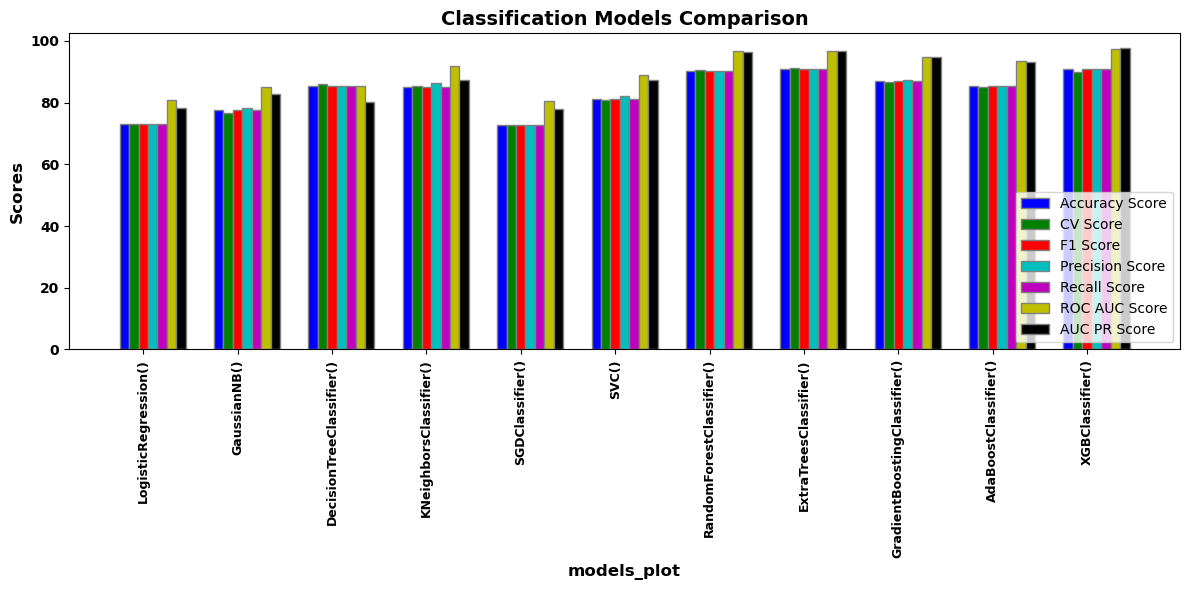

In [142]:
# Plotting all models_plot metrics
models_plot = ['LogisticRegression()','GaussianNB()','DecisionTreeClassifier()','KNeighborsClassifier()','SGDClassifier()',
               'SVC()','RandomForestClassifier()','ExtraTreesClassifier()','GradientBoostingClassifier()','AdaBoostClassifier()',
               'XGBClassifier()']

barWidth = 0.1 # set width of bars

# set heights of bars
accu_bar = Model_Score
cv_bar = CV_Score
f1_bar = F1_Scores
precision_bar = precision_scores
recall_bar = recall_scores
roc_auc_bar = roc_auc_scores
pr_auc_bar = pr_auc_scores

# set positions of bars on x-axis
pos1 = np.arange(len(Model_Score))
pos2 = [x + barWidth for x in pos1]
pos3 = [x + barWidth for x in pos2]
pos4 = [x + barWidth for x in pos3]
pos5 = [x + barWidth for x in pos4]
pos6 = [x + barWidth for x in pos5]
pos7 = [x + barWidth for x in pos6]

# define colors for each bar
#colors = ['crimson','blue','green', 'yellow', 'magenta']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']

# create subplots with figsize parameter to control figure size
fig, ax = plt.subplots(figsize=(12,6))

# create bar plots with defined colors
ax.bar(pos1, accu_bar, color=colors[0], width=barWidth, edgecolor='grey', label='Accuracy Score')
ax.bar(pos2, cv_bar, color=colors[1], width=barWidth, edgecolor='grey', label='CV Score')
ax.bar(pos3, f1_bar, color=colors[2], width=barWidth, edgecolor='grey', label='F1 Score')
ax.bar(pos4, precision_bar, color=colors[3], width=barWidth, edgecolor='grey', label='Precision Score')
ax.bar(pos5, recall_bar, color=colors[4], width=barWidth, edgecolor='grey', label='Recall Score')
ax.bar(pos6, roc_auc_bar, color=colors[5], width=barWidth, edgecolor='grey', label='ROC AUC Score')
ax.bar(pos7, pr_auc_bar, color=colors[6], width=barWidth, edgecolor='grey', label='AUC PR Score')


# add labels and title
plt.title('Classification Models Comparison',fontsize=14, fontweight='bold')
plt.xticks([r + barWidth*2 for r in range(len(Model_Score))], models_plot,fontsize=9,fontweight ='bold',rotation=90)
plt.yticks(fontsize=10,fontweight ='bold')
plt.xlabel('models_plot',fontsize=12,fontweight ='bold')
plt.ylabel('Scores',fontsize=12,fontweight ='bold')
# plt.legend()
plt.legend(fontsize='10', title_fontsize='10',loc="lower right", frameon=True)
plt.tight_layout()
plt.show()

### Observations: 
- **We can see that ExtraTreesClassifier(), RandomForestClassifier(), XGBClassifier() gives us maximum Accuracy score, max f1 score and max scores for remaining metrics along with max cross-validation score compared to remaining models.**
- **I have chosen ExtraTreesClassifier() over RandomForestClassifier() and XGBClassifier() due to slight increase of CV score but RandomForestClassifier() and XGBClassifier() are also good models**
- **Hyper parameter tuning will be pefromed for "ExtraTreesClassifier()**

## Hyper Parameter Tuning

In [143]:
from sklearn.model_selection import GridSearchCV

# Defining parameters for ExtraTreesClassifier

# Number of trees in Extra Tree
n_estimators = [50,100,200]
# Scoring criterion
criterion=["gini", "entropy", "log_loss"]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [2,4,7]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]

# Create the random grid
parameters = {'n_estimators': n_estimators,
              'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [144]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5,n_jobs=-1)  # Defining instance for GridSearchCV
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters
GCV.best_params_   # printing the best parameters

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [145]:
# Training the model using best parameters from GridSearchCV and checking the metrics
ht_model=ExtraTreesClassifier(n_estimators=GCV.best_params_['n_estimators'],criterion=GCV.best_params_['criterion'],
                                    max_features=GCV.best_params_['max_features'],max_depth=GCV.best_params_['max_depth'],
                                    min_samples_split=GCV.best_params_['min_samples_split'],min_samples_leaf=GCV.best_params_['min_samples_leaf'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Model Accuracy Score:")
print(round(acc*100,1))
print("Confusion Matrix:")
print(confusion_matrix(y_test,pred))
print("Classification Report:")
print(classification_report(y_test,pred))

Model Accuracy Score:
81.1
Confusion Matrix:
[[3333 1298]
 [ 451 4181]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.72      0.79      4631
         1.0       0.76      0.90      0.83      4632

    accuracy                           0.81      9263
   macro avg       0.82      0.81      0.81      9263
weighted avg       0.82      0.81      0.81      9263



In [146]:
# Using best CV value and checking the cross validation score again to compare with model score
cvscores = cross_val_score(ht_model, x, y, cv=BCV)
score = cvscores.mean()
ms=accuracy_score(y_test,pred)
y_prob = ht_model.predict_proba(x_test)

print("CV accuracy scores for each fold are: ", cvscores*100)
print("Mean CV accuracy score:", round(score*100,1))
print("Model accuracy score:", round(ms*100,1))
print("Difference in Accuracy Scores:", round(ms-score,5))
print("F1 Score:",round(f1_score(y_test,pred, average='weighted')*100,1))
print("Precision Score:",round(precision_score(y_test,pred, average='weighted')*100,1))
print("Recall Score:",round(recall_score(y_test,pred, average='weighted')*100,1))
print("ROC AUC Score:",round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1))
print("AUC PR Score:",round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1))

CV accuracy scores for each fold are:  [80.20383486 79.72015892 80.37657627 80.56659181 81.4130247  81.11936431
 81.49939541 80.65296252]
Mean CV accuracy score: 80.7
Model accuracy score: 81.1
Difference in Accuracy Scores: 0.00424
F1 Score: 81.0
Precision Score: 82.2
Recall Score: 81.1
ROC AUC Score: 89.6
AUC PR Score: 88.4


### Observations for Hyper Parameter Tuning: 
- **Accuracy Score, F1 score and remainig metrics and Cross-validation score for the model with default parameters is better than the model with Hyper Parameter Tuning for ExtraTreesClassifier, hence considered the final model with default parameters for saving**
- **I wanted to try again hyper parameer tuning with increased search space of parameters but it took more than 5 hrs to run for first try due to large dataset, hence couldn't run again due to computational issues**
- **If I try with increased search space of parameters, then I can expect improved accuracy compared to the model with default parameters, however, in this project, I am saving the model with default parameters due to high accuracy compared to the hyper parameter tuned model**

# AUC ROC Curve

AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings.

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1

Plotting AUC ROC Curve helps in comparing the performance among multiple models. The model with higher AUC is the best model.

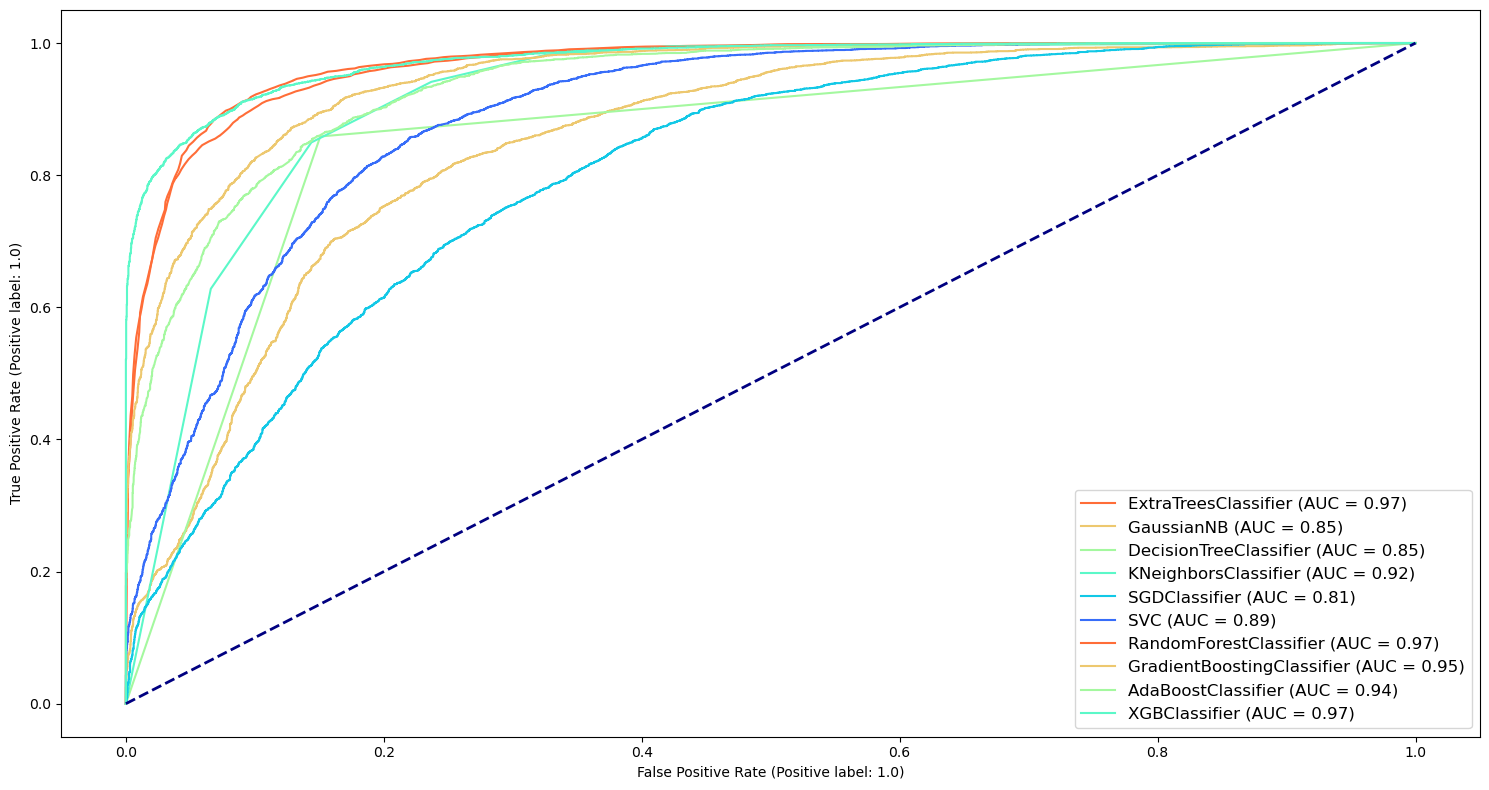

In [152]:
# Checking AUC ROC Curve to compare the multiple models

# from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15, 8)) # Set the figure size to 10 inches by 10 inches

# models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
#        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
#        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
#        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
#        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier()),
#        ('VotingClassifier()',VotingClassifier(estimators=estimator,voting="soft"))]

# Initially Plotting the AUC ROC curve for Extra Trees Classifier which is best model identified so far
disp = plot_roc_curve(models[6][1], x_test, y_test, ax=ax)

# Plotting the AUC ROC curve for remaining models with same axis of Extra Trees Classifier
plot_roc_curve(models[0][1], x_test, y_test, ax=ax)
plot_roc_curve(models[1][1], x_test, y_test, ax=ax)
plot_roc_curve(models[2][1], x_test, y_test, ax=ax)
plot_roc_curve(models[3][1], x_test, y_test, ax=ax)
plot_roc_curve(models[4][1], x_test, y_test, ax=ax)
plot_roc_curve(models[5][1], x_test, y_test, ax=ax)
# plot_roc_curve(models[6][1], x_test, y_test, ax=ax)
plot_roc_curve(models[7][1], x_test, y_test, ax=ax)
plot_roc_curve(models[8][1], x_test, y_test, ax=ax)
plot_roc_curve(models[9][1], x_test, y_test, ax=ax)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(prop={'size': 12}, loc='lower right')
plt.show()

#### Observations:
- **Many models are performing well.**
- **ExtraTreesClassifier, RandomForestClassifier and XGBClassifier are the best one among all models from this plot based on AUC ROC score** 
- **ExtraTreesClassifier is selected as the final model for deployment based on checking of all the metrics (Model Accuracy Score, cross validation score, F1 Score, Recall Score, Precision Score and ROC AUC Score)**

# Model Saving

In [153]:
import pickle
filename='Census_Income-Prediction.pkl'
pickle.dump(models[6][1], open(filename,'wb'))  # saving the Extra Trees Classifier model

# Conclusion

In [154]:
loaded_model=pickle.load(open('Census_Income-Prediction.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print("Model Score:",result*100)

conclusion=pd.DataFrame([loaded_model.predict(x_test),y_test.squeeze()],index=["Predicted","Original"])
conclusion.T.head()

Model Score: 90.8776854150923


Predicted  Original
0        1.0       1.0
1        0.0       0.0
2        0.0       0.0
3        1.0       0.0
4        0.0       0.0

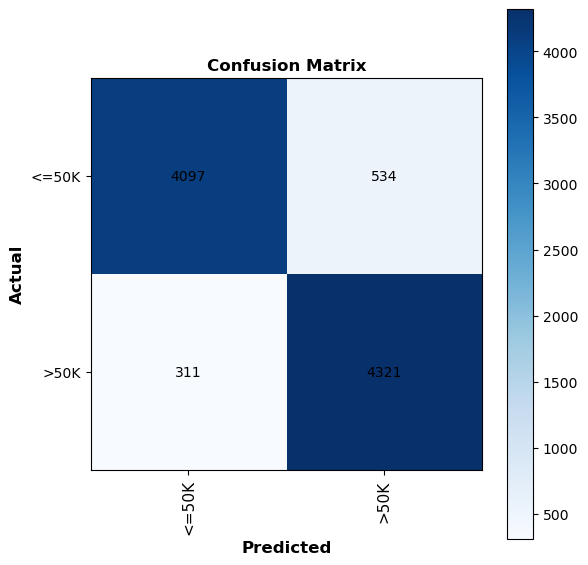

In [155]:
# Confusion Matrix for final saved model
pred=loaded_model.predict(x_test)
cm=confusion_matrix(y_test,pred)

# Target variable labels in the order
classes = ['<=50K', '>50K']

fig, ax = plt.subplots(figsize=(6, 6)) # create a figure and axis object
im = ax.imshow(cm, cmap='Blues')  # create a heatmap of the confusion matrix

# set axis labels
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
plt.xticks(fontsize=11,rotation=90)

# set labels for each cell
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="black")
ax.set_title("Confusion Matrix",fontsize=12,fontweight ='bold')
ax.set_xlabel('Predicted',fontsize=12,fontweight ='bold')
ax.set_ylabel('Actual',fontsize=12,fontweight ='bold')
cbar = ax.figure.colorbar(im, ax=ax)
plt.show()

#### Overall Summary:

- **First I had loaded the dataset and completed the Data Visualization based on the target variable (Loan Status).**

- **Then, I proceeded further with Exploratory Data Analysis and prepared the model for training and testing**

- **Tested multiple classification algorithms including ensemble techniques and based on the values of different metrics, I have considered  ExtraTreesClassifier as the best performing model among all algorithms**

- **After finding out the best model, I tried to increase the score by using Hyperparameter Tuning technique and but the score is not improved with the given search space and I couldn't run further due to computational issues and hence finally considered the model with default paratmeters for saving**

- **The final model is saved as pickle file**